# Week 13 -- Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
import warnings
warnings.simplefilter('ignore')

In [2]:
from sklearn.preprocessing import StandardScaler

In [3]:
scaler = StandardScaler()

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

### Update the number of weeks

In [5]:
no_games = 13

## Functions

In [6]:
def per_week_stats(dataframe, column1, column2):
    """
    This function creates a column for per week average stats.
    
    Parameters:
        dataframe: the dataframe you want to add to
        column1: the statistic you want to average over the number of games
        column2: the games column to average with
        
    Returns:
        new column with averaged stats across the number of games an individual has played
    
    """
    dataframe[column1 + '_pG'] = dataframe[column1]/dataframe[column2]

In [7]:
def print_metric(dataframe, metric, player_inx):
    """
    This function prints a stat for a player and the average for the stat across all the players listed.
    
    Parameters:
        dataframe: the dataframe you are working with
        metric: the stat you want to assess
        player_idx: the index number for the player in the dataframe
        
    Returns:
        printed stats for the average and a given player for comparison
    """
    average = round(dataframe[metric].mean(), 2)
    player_name = dataframe['Player'][player_inx]
    player = round(dataframe[metric][player_inx], 2)
    print('Avg ' + metric + ': ' + str(average))
    print(player_name + ' ' + metric + ': ' + str(player))
    print('-' * 50)
    return average, player_name, player

In [8]:
def print_metric_team(dataframe, metric, team_inx):
    """
    This function prints a stat for a team and the average for the stat across all teams listed.
    
    Parameters:
        dataframe: the dataframe you are working with
        metric: the stat you want to assess
        team_idx: the index number for the team in the dataframe
        
    Returns:
        printed stats for the average and a team for comparison
    """
    average = round(dataframe[metric].mean(), 2)
    team_name = dataframe['Team'][team_inx]
    team = round(dataframe[metric][team_inx], 2)
    print('Avg ' + metric + ': ' + str(average))
    print(team_name + ' ' + metric + ': ' + str(team))
    print('-' * 50)
    return average, team_name, team

In [9]:
def bar_plot(x, y, metric, x_label, y_label):
    """
    This function plots a stat on a bar graph for a group of players or teams determined in the x & y.
    
    Parameters:
        x: list of players/teams
        y: values of a given metric
        metric: the stat in question
        x_label: label for the x axis
        y_label: label for the y axis
        
    Returns:
        bar graph
    """
    
    plt.figure(figsize = (8, 4))
    
    plt.bar(x, y)
    
    plt.title(metric)
    plt.xlabel(x_label)
    plt.xticks(rotation=45)
    plt.ylabel(y_label)
    plt.show()

In [10]:
def scale_data(dataframe, column_list):
    """
    This function scales data so they can be easily compared.
    
    Parameters:
        dataframe: dataframe you want to scale
        column_list: list of columns that will be passed through and scaled
        
    Returns:
        scaled columns in the dataframe
    """
    for column in column_list:
        dataframe[column] = scaler.fit_transform(dataframe[[column]])

## Read in DataFrames

In [11]:
offense = pd.read_pickle('players')
defense = pd.read_pickle('defense')
kicking_df = pd.read_pickle('kicking')

In [12]:
print(offense.shape)
offense.head()

(594, 42)


,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,Week_10,Week_11,Week_12,Week_13
0,Dalvin Cook,MIN,RB,25,11,11,0,0,0,0,0,251,1250,13.80,13,43,35,314,17.70,1,4,3,14,3,0,257.90,1,1,240.40,20.80,15.10,23.90,26.60,14.90,0.00,0.00,46.60,37.20,11.20,20.00,6.20,17.90
1,Derrick Henry,TEN,RB,26,12,12,0,0,0,0,0,271,1317,12.60,12,27,15,102,14.00,0,1,1,12,0,0,219.40,2,2,211.90,13.10,8.40,25.00,0.00,18.30,38.40,13.20,17.20,6.80,10.90,19.20,36.50,4.90
2,Alvin Kamara,NOR,RB,25,12,7,0,0,0,0,0,143,673,11.10,9,86,70,655,12.60,4,1,0,13,0,0,245.80,3,3,210.80,18.70,29.40,31.70,17.90,11.90,0.00,14.80,16.30,10.90,27.80,10.50,5.20,15.70
3,Tyreek Hill,KAN,WR,26,12,12,0,0,0,0,0,11,90,9.80,1,111,74,1079,19.80,13,1,0,14,0,0,237.90,1,4,200.90,10.60,16.80,16.20,12.40,15.30,2.50,11.50,21.80,24.10,0.00,16.00,44.90,8.80
4,Patrick Mahomes,KAN,QB,25,12,12,316,463,3815,31,2,47,241,6.30,2,1,0,0,0.00,0,2,1,2,0,2,312.70,1,5,312.60,20.40,27.50,40.00,20.20,30.70,20.60,12.00,36.60,30.90,0.00,22.50,31.30,19.30


In [13]:
print(defense.shape)
defense.head()

(32, 37)


,Team,GP,Ttl_Pts_Allowed,Ttl_Offense_Plays_Allowed,Yds_p_Play,Ttl_Yds,Rushing_Att,Rushing_Yds,Rushing_Yds_p_Att,Rushing_TDs,Passing_Att,Passing_Yds_p_Att,Completions,Yds_p_Completion,Passing_Yds,Passing_TDs,RZ_Att,RZ_TD,RZ_Percent,Ttl_Turnovers,Interceptions,Fumbles,Sacks,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,Week_10,Week_11,Week_12,Week_13
0,Pittsburgh Steelers,12,211,740,4.90,3606,287,1208,4.20,7,409,5.30,229,11.80,2398,17,30,17,56.70,23,16,7,44,127.00,8.00,13.00,7.00,10.00,8.00,18.00,2.00,18.00,7.00,12.00,17.00,14.00,3.00
1,Miami Dolphins,12,212,760,5.60,4262,317,1469,4.60,13,412,6.30,257,11.90,2793,14,36,21,58.30,21,13,8,31,116.00,2.00,2.00,12.00,3.00,12.00,15.00,0.00,17.00,8.00,4.00,5.00,14.00,14.00
2,Baltimore Ravens,12,231,786,5.20,4052,301,1339,4.40,8,457,5.60,299,9.80,2713,17,34,21,61.80,18,7,11,28,110.00,15.00,15.00,1.00,6.00,26.00,7.00,0.00,4.00,14.00,1.00,3.00,8.00,4.00
3,New Orleans Saints,12,241,714,4.90,3466,276,913,3.30,5,402,5.80,245,11.30,2553,21,33,22,66.70,19,13,6,36,97.00,15.00,4.00,-3.00,4.00,3.00,0.00,1.00,7.00,16.00,14.00,16.00,14.00,6.00
4,Los Angeles Rams,12,243,757,4.60,3496,286,1117,3.90,10,435,5.10,272,9.70,2379,14,33,22,66.70,20,12,8,36,102.00,4.00,7.00,4.00,11.00,12.00,0.00,15.00,5.00,0.00,13.00,5.00,15.00,11.00


In [14]:
defense['Ttl_Turnovers'] = defense['Interceptions'] + defense['Fumbles']
per_week_stats(defense, 'Ttl_Pts_Allowed', 'GP')
per_week_stats(defense, 'Ttl_Yds', 'GP')
per_week_stats(defense, 'Rushing_Att', 'GP')
per_week_stats(defense, 'Rushing_Yds', 'GP')
per_week_stats(defense, 'Rushing_TDs', 'GP')
per_week_stats(defense, 'Passing_Att', 'GP')
per_week_stats(defense, 'Completions', 'GP')
defense['Completion_Percent_Allowed'] = defense['Completions']/defense['Passing_Att']
per_week_stats(defense, 'Passing_Yds', 'GP')
per_week_stats(defense, 'Passing_TDs', 'GP')
defense['Ttl_TDs_pG'] = defense['Rushing_TDs_pG'] + defense['Passing_TDs_pG']
per_week_stats(defense, 'Ttl_Turnovers', 'GP')
per_week_stats(defense, 'Fumbles', 'GP')
per_week_stats(defense, 'Sacks', 'GP')
per_week_stats(defense, 'TTL', 'GP')

In [15]:
defense.head()

,Team,GP,Ttl_Pts_Allowed,Ttl_Offense_Plays_Allowed,Yds_p_Play,Ttl_Yds,Rushing_Att,Rushing_Yds,Rushing_Yds_p_Att,Rushing_TDs,Passing_Att,Passing_Yds_p_Att,Completions,Yds_p_Completion,Passing_Yds,Passing_TDs,RZ_Att,RZ_TD,RZ_Percent,Ttl_Turnovers,Interceptions,Fumbles,Sacks,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,Week_10,Week_11,Week_12,Week_13,Ttl_Pts_Allowed_pG,Ttl_Yds_pG,Rushing_Att_pG,Rushing_Yds_pG,Rushing_TDs_pG,Passing_Att_pG,Completions_pG,Completion_Percent_Allowed,Passing_Yds_pG,Passing_TDs_pG,Ttl_TDs_pG,Ttl_Turnovers_pG,Fumbles_pG,Sacks_pG,TTL_pG
0,Pittsburgh Steelers,12,211,740,4.90,3606,287,1208,4.20,7,409,5.30,229,11.80,2398,17,30,17,56.70,23,16,7,44,127.00,8.00,13.00,7.00,10.00,8.00,18.00,2.00,18.00,7.00,12.00,17.00,14.00,3.00,17.58,300.50,23.92,100.67,0.58,34.08,19.08,0.56,199.83,1.42,2.00,1.92,0.58,3.67,10.58
1,Miami Dolphins,12,212,760,5.60,4262,317,1469,4.60,13,412,6.30,257,11.90,2793,14,36,21,58.30,21,13,8,31,116.00,2.00,2.00,12.00,3.00,12.00,15.00,0.00,17.00,8.00,4.00,5.00,14.00,14.00,17.67,355.17,26.42,122.42,1.08,34.33,21.42,0.62,232.75,1.17,2.25,1.75,0.67,2.58,9.67
2,Baltimore Ravens,12,231,786,5.20,4052,301,1339,4.40,8,457,5.60,299,9.80,2713,17,34,21,61.80,18,7,11,28,110.00,15.00,15.00,1.00,6.00,26.00,7.00,0.00,4.00,14.00,1.00,3.00,8.00,4.00,19.25,337.67,25.08,111.58,0.67,38.08,24.92,0.65,226.08,1.42,2.08,1.50,0.92,2.33,9.17
3,New Orleans Saints,12,241,714,4.90,3466,276,913,3.30,5,402,5.80,245,11.30,2553,21,33,22,66.70,19,13,6,36,97.00,15.00,4.00,-3.00,4.00,3.00,0.00,1.00,7.00,16.00,14.00,16.00,14.00,6.00,20.08,288.83,23.00,76.08,0.42,33.50,20.42,0.61,212.75,1.75,2.17,1.58,0.50,3.00,8.08
4,Los Angeles Rams,12,243,757,4.60,3496,286,1117,3.90,10,435,5.10,272,9.70,2379,14,33,22,66.70,20,12,8,36,102.00,4.00,7.00,4.00,11.00,12.00,0.00,15.00,5.00,0.00,13.00,5.00,15.00,11.00,20.25,291.33,23.83,93.08,0.83,36.25,22.67,0.63,198.25,1.17,2.00,1.67,0.67,3.00,8.50


In [16]:
offense[offense['Player'] == "J.K. Dobbins"]

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,Week_10,Week_11,Week_12,Week_13
118,J.K. Dobbins,BAL,RB,22,11,0,0,0,0,0,0,83,451,9.30,4,22,17,103,6.60,0,0,0,4,1,0,89.90,33,,81.40,14.20,6.10,4.40,1.70,5.50,2.90,0.00,12.10,3.50,1.40,16.50,0.00,13.10


In [67]:
taken_wrt = ['Davante Adams', 'Keenan Allen', 'Mark Andrews', 'Odell Beckham Jr.', 
             'A.J. Brown', 'John Brown', 'DJ Chark', 'Nick Chubb', 
             'James Conner', 'Dalvin Cook', 'Jared Cook', 'Amari Cooper', 'Mike Davis', 'Stefon Diggs',
             'J.K. Dobbins', 'Kenyan Drake', 'Eric Ebron', 'Chase Edmonds', 'Clyde Edwards-Helaire',
             'Austin Ekeler', 'Ezekiel Elliott', 'Evan Engram',  'Zach Ertz', 'Mike Evans', 'Noah Fant',
             'Leonard Fournette', 'Will Fuller', 'Wayne Gallman', 'Myles Gaskin', 'Mike Gesicki', 
             'Antonio Gibson', 'Chris Godwin', 'Dallas Goedert', 'Kenny Golladay', 'Melvin Gordon', 
             'Todd Gurley', 'Damien Harris', 'Hunter Henry', 'Tyreek Hill', 'T.Y. Hilton', 'T.J. Hockenson', 
             'Jordan Howard', 'Kareem Hunt', 'Josh Jacobs', 'Justin Jefferson', 
             'David Johnson', 'Diontae Johnson', 'Aaron Jones', 'Ronald Jones II', 'Alvin Kamara', 
             'Travis Kelce', 'George Kittle', 'Cooper Kupp', 'Phillip Lindsay', 'Tyler Lockett', 
             'Christian McCaffrey', 'Terry McLaurin', 'D.K. Metcalf', 'Joe Mixon',
             'David Montgomery', 'D.J. Moore', 'Zack Moss', 'Raheem Mostert', 'DeVante Parker',
             'Calvin Ridley', 'James Robinson', 'Allen Robinson', 'Curtis Samuel', 'Miles Sanders', 
             'Darius Slayton', 'JuJu Smith-Schuster', 'Adam Thielen', 'Michael Thomas', 
             'Darren Waller', 'Robert Woods']


In [18]:
taken_qbs = ['Josh Allen', 'Tom Brady', 'Drew Brees', 'Jared Goff', 'Lamar Jackson', 'Daniel Jones', 
             'Patrick Mahomes', 'Kyler Murray', 'Cam Newton', 'Ben Roethlisberger', 'Matt Ryan', 
             'Deshaun Watson', 'Russell Wilson']

In [19]:
taken_k = ['Rodrigo Blankenship', 'Harrison Butker', 'Jake Elliot', "Ka'imi Fairbairn",  
           'Wil Lutz', 'Jason Meyers', 'Joey Slye', 'Justin Tucker', 'Greg Zuerlein']

In [19]:
myteam_wrt = ['Robby Anderson', 'Tyler Boyd', 'Trey Burton', 'Chris Carson', 'Brandin Cooks',
              'Corey Davis', 'Rob Gronkowski', 'Derrick Henry', 'DeAndre Hopkins',
              'Julio Jones', "D'Andre Swift"]


## QB Analysis

In [20]:
quarterbacks = offense[offense['Position'] == 'QB']
quarterbacks.head()

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,Week_10,Week_11,Week_12,Week_13
4,Patrick Mahomes,KAN,QB,25,12,12,316,463,3815,31,2,47,241,6.30,2,1,0,0,0.00,0,2,1,2,0,2,312.70,1,5,312.60,20.40,27.50,40.00,20.20,30.70,20.60,12.00,36.60,30.90,0.00,22.50,31.30,19.30
5,Kyler Murray,ARI,QB,23,12,12,285,426,2987,22,10,102,665,11.20,10,0,0,0,0.00,0,6,3,10,0,0,318.00,2,6,317.90,27.30,33.10,24.70,23.10,27.30,28.90,38.10,0.00,37.90,30.90,20.30,8.90,17.40
9,Russell Wilson,SEA,QB,32,12,12,305,436,3479,32,11,68,424,8.40,1,0,0,0,0.00,0,7,4,1,0,1,298.60,3,10,298.50,31.80,34.40,36.80,21.90,25.50,0.00,32.90,28.70,24.10,11.90,20.10,14.40,16.00
10,Josh Allen,BUF,QB,24,12,12,299,428,3403,26,8,87,322,10.00,6,1,1,12,12.00,1,7,6,7,0,0,296.00,4,11,295.60,28.20,34.50,32.20,25.40,18.30,16.10,16.40,13.50,36.00,28.40,0.00,16.50,30.10
11,Aaron Rodgers,GNB,QB,37,12,12,286,415,3395,36,4,23,87,10.80,1,1,1,-6,-6.00,0,3,2,1,0,0,286.40,5,12,285.80,30.80,18.20,24.50,29.60,0.00,5.80,27.30,22.50,28.90,26.40,22.70,25.60,23.50


In [21]:
per_week_stats(quarterbacks, 'CompletedPasses', 'Games')
per_week_stats(quarterbacks, 'PassesAttempted', 'Games')
quarterbacks['Completion_Percent'] = quarterbacks['CompletedPasses_pG']/quarterbacks['PassesAttempted_pG']
per_week_stats(quarterbacks, 'PassingYds', 'Games')
per_week_stats(quarterbacks, 'PassingTDs', 'Games')
quarterbacks['Yds_pAtt'] = quarterbacks['PassingYds_pG']/quarterbacks['PassesAttempted_pG']
per_week_stats(quarterbacks, 'Interceptions', 'Games')
per_week_stats(quarterbacks, 'LostFumbles', 'Games')
quarterbacks['Ttl_Turnovers_pG'] = quarterbacks['Interceptions_pG'] + quarterbacks['LostFumbles_pG']
per_week_stats(quarterbacks, 'RushingYds', 'Games')
per_week_stats(quarterbacks, 'TTL', 'Games')

In [22]:
quarterbacks.head()

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,Week_10,Week_11,Week_12,Week_13,CompletedPasses_pG,PassesAttempted_pG,Completion_Percent,PassingYds_pG,PassingTDs_pG,Yds_pAtt,Interceptions_pG,LostFumbles_pG,Ttl_Turnovers_pG,RushingYds_pG,TTL_pG
4,Patrick Mahomes,KAN,QB,25,12,12,316,463,3815,31,2,47,241,6.30,2,1,0,0,0.00,0,2,1,2,0,2,312.70,1,5,312.60,20.40,27.50,40.00,20.20,30.70,20.60,12.00,36.60,30.90,0.00,22.50,31.30,19.30,26.33,38.58,0.68,317.92,2.58,8.24,0.17,0.08,0.25,20.08,26.05
5,Kyler Murray,ARI,QB,23,12,12,285,426,2987,22,10,102,665,11.20,10,0,0,0,0.00,0,6,3,10,0,0,318.00,2,6,317.90,27.30,33.10,24.70,23.10,27.30,28.90,38.10,0.00,37.90,30.90,20.30,8.90,17.40,23.75,35.50,0.67,248.92,1.83,7.01,0.83,0.25,1.08,55.42,26.49
9,Russell Wilson,SEA,QB,32,12,12,305,436,3479,32,11,68,424,8.40,1,0,0,0,0.00,0,7,4,1,0,1,298.60,3,10,298.50,31.80,34.40,36.80,21.90,25.50,0.00,32.90,28.70,24.10,11.90,20.10,14.40,16.00,25.42,36.33,0.70,289.92,2.67,7.98,0.92,0.33,1.25,35.33,24.88
10,Josh Allen,BUF,QB,24,12,12,299,428,3403,26,8,87,322,10.00,6,1,1,12,12.00,1,7,6,7,0,0,296.00,4,11,295.60,28.20,34.50,32.20,25.40,18.30,16.10,16.40,13.50,36.00,28.40,0.00,16.50,30.10,24.92,35.67,0.70,283.58,2.17,7.95,0.67,0.50,1.17,26.83,24.63
11,Aaron Rodgers,GNB,QB,37,12,12,286,415,3395,36,4,23,87,10.80,1,1,1,-6,-6.00,0,3,2,1,0,0,286.40,5,12,285.80,30.80,18.20,24.50,29.60,0.00,5.80,27.30,22.50,28.90,26.40,22.70,25.60,23.50,23.83,34.58,0.69,282.92,3.00,8.18,0.33,0.17,0.50,7.25,23.82


In [23]:
quarterbacks.describe()

,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,Week_10,Week_11,Week_12,Week_13,CompletedPasses_pG,PassesAttempted_pG,Completion_Percent,PassingYds_pG,PassingTDs_pG,Yds_pAtt,Interceptions_pG,LostFumbles_pG,Ttl_Turnovers_pG,RushingYds_pG,TTL_pG
count,73.00,73.00,73.00,73.00,73.00,73.00,73.00,73.00,73.00,73.00,73.00,73.00,73.00,73.00,73.00,73.00,73.00,73.00,73.00,73.00,73.00,73.00,73.00,73.00,73.00,73.00,73.00,73.00,73.00,73.00,73.00,73.00,73.00,73.00,73.00,73.00,73.00,73.00,73.00,69.00,73.00,73.00,69.00,73.00,73.00,73.00,73.00,73.00
mean,28.67,6.66,5.30,121.19,185.21,1339.21,8.88,4.16,21.45,91.71,6.53,1.21,0.30,0.22,1.55,0.74,0.04,2.62,1.22,1.25,0.05,0.45,100.45,100.33,8.54,8.95,8.71,8.31,7.22,7.18,7.94,6.74,8.41,6.51,6.71,6.98,8.18,14.43,22.56,0.62,157.80,0.98,6.54,0.56,0.16,0.72,10.12,11.33
std,5.13,4.19,4.98,116.39,174.21,1311.09,10.10,4.00,26.11,148.11,4.21,2.12,1.00,0.77,9.06,3.34,0.20,2.79,1.64,2.20,0.28,0.88,102.83,102.76,10.45,11.76,10.93,10.76,10.07,10.29,11.72,9.28,11.35,9.39,9.44,9.12,10.48,9.64,14.45,0.14,107.77,0.83,1.82,0.45,0.21,0.54,13.01,8.29
min,22.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-7.00,-2.00,0.00,0.00,0.00,-6.00,-6.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.80,-0.70,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-4.00,0.00
25%,25.00,3.00,0.00,8.00,15.00,94.00,0.00,0.00,5.00,3.00,3.30,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,7.30,7.30,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.33,6.75,0.58,52.42,0.00,5.95,0.00,0.00,0.17,0.50,3.00
50%,27.00,6.00,4.00,86.00,136.00,898.00,4.00,3.00,12.00,22.00,6.30,0.00,0.00,0.00,0.00,0.00,0.00,2.00,1.00,0.00,0.00,0.00,65.60,65.60,0.00,0.00,0.00,0.60,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.40,0.00,17.08,26.80,0.64,178.50,1.00,6.82,0.67,0.08,0.75,6.33,11.54
75%,32.00,11.00,11.00,246.00,363.00,2620.00,17.00,8.00,26.00,106.00,10.00,2.00,0.00,0.00,0.00,0.00,0.00,4.00,2.00,2.00,0.00,1.00,199.60,199.50,17.60,17.20,15.70,16.50,14.10,14.90,16.90,13.50,18.60,11.90,14.60,14.40,17.40,23.00,35.50,0.68,252.25,1.55,7.52,0.83,0.27,1.08,16.82,18.04
max,43.00,12.00,12.00,324.00,484.00,3815.00,36.00,15.00,116.00,669.00,19.00,11.00,8.00,6.00,74.00,16.00,1.00,11.00,8.00,11.00,2.00,5.00,318.00,317.90,31.80,39.80,40.00,38.30,30.70,32.00,38.50,36.60,37.90,31.80,31.40,33.10,32.70,30.20,44.40,1.00,371.20,3.00,12.83,2.00,1.00,2.00,60.82,27.72


In [24]:
quarterbacks[quarterbacks['Player'].isin(['Aaron Rodgers', 'Justin Herbert'])]

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,Week_10,Week_11,Week_12,Week_13,CompletedPasses_pG,PassesAttempted_pG,Completion_Percent,PassingYds_pG,PassingTDs_pG,Yds_pAtt,Interceptions_pG,LostFumbles_pG,Ttl_Turnovers_pG,RushingYds_pG,TTL_pG
11,Aaron Rodgers,GNB,QB,37,12,12,286,415,3395,36,4,23,87,10.80,1,1,1,-6,-6.00,0,3,2,1,0,0,286.40,5,12,285.80,30.80,18.20,24.50,29.60,0.00,5.80,27.30,22.50,28.90,26.40,22.70,25.60,23.50,23.83,34.58,0.69,282.92,3.00,8.18,0.33,0.17,0.50,7.25,23.82
41,Justin Herbert,LAC,QB,22,11,11,295,455,3224,23,9,41,185,9.10,3,0,0,0,0.00,0,6,1,3,0,1,248.50,8,42,248.40,0.00,23.20,15.70,24.00,27.40,0.00,38.50,23.20,23.40,21.50,27.70,17.40,6.40,26.82,41.36,0.65,293.09,2.09,7.09,0.82,0.09,0.91,16.82,22.58


In [25]:
available_qbs = quarterbacks[~quarterbacks['Player'].isin(taken_qbs)]
available_qbs = available_qbs[available_qbs['Player'] != 'Dak Prescott']
available_qbs.head()

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,Week_10,Week_11,Week_12,Week_13,CompletedPasses_pG,PassesAttempted_pG,Completion_Percent,PassingYds_pG,PassingTDs_pG,Yds_pAtt,Interceptions_pG,LostFumbles_pG,Ttl_Turnovers_pG,RushingYds_pG,TTL_pG
11,Aaron Rodgers,GNB,QB,37,12,12,286,415,3395,36,4,23,87,10.80,1,1,1,-6,-6.00,0,3,2,1,0,0,286.40,5,12,285.80,30.80,18.20,24.50,29.60,0.00,5.80,27.30,22.50,28.90,26.40,22.70,25.60,23.50,23.83,34.58,0.69,282.92,3.00,8.18,0.33,0.17,0.50,7.25,23.82
30,Ryan Tannehill,TEN,QB,32,12,12,246,379,2997,26,5,30,152,5.70,2,1,1,0,0.00,0,5,1,2,2,1,250.60,7,31,250.10,19.40,26.80,12.70,0.00,30.00,29.60,17.30,18.30,14.60,10.80,22.90,19.10,28.60,20.50,31.58,0.65,249.75,2.17,7.91,0.42,0.08,0.50,12.67,20.84
41,Justin Herbert,LAC,QB,22,11,11,295,455,3224,23,9,41,185,9.10,3,0,0,0,0.00,0,6,1,3,0,1,248.50,8,42,248.40,0.00,23.20,15.70,24.00,27.40,0.00,38.50,23.20,23.40,21.50,27.70,17.40,6.40,26.82,41.36,0.65,293.09,2.09,7.09,0.82,0.09,0.91,16.82,22.58
78,Kirk Cousins,MIN,QB,32,12,12,246,363,3073,26,12,19,89,10.80,0,0,0,0,0.00,0,5,4,0,0,4,223.80,12,,223.90,22.80,1.50,21.40,14.90,15.20,26.70,0.00,10.40,20.80,18.60,23.00,26.20,22.40,20.50,30.25,0.68,256.08,2.17,8.47,1.00,0.33,1.33,7.42,18.66
79,Matthew Stafford,DET,QB,32,12,12,271,428,3278,21,9,24,85,8.40,0,1,0,0,0.00,0,2,1,0,0,2,216.60,13,,216.50,17.20,17.20,18.50,23.30,0.00,13.30,18.40,23.40,10.40,23.00,7.60,17.10,27.10,22.58,35.67,0.63,273.17,1.75,7.66,0.75,0.08,0.83,7.08,18.04


In [26]:
scaled_qbs = available_qbs[['Player', 'Team', 'Position', 'Age', 'Games', 'GamesStarted', 'CompletedPasses_pG', 
                            'PassesAttempted_pG', 'Completion_Percent', 'PassingYds_pG', 'PassingTDs_pG', 'Yds_pAtt',
                            'Interceptions_pG', 'LostFumbles_pG','RushingYds_pG', 'TTL_pG']]

qb_columns = ['CompletedPasses_pG', 'PassesAttempted_pG', 'Completion_Percent', 'PassingYds_pG', 'PassingTDs_pG', 
               'Interceptions_pG', 'LostFumbles_pG','RushingYds_pG']

scale_data(scaled_qbs, qb_columns)

scaled_qbs.head()

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses_pG,PassesAttempted_pG,Completion_Percent,PassingYds_pG,PassingTDs_pG,Yds_pAtt,Interceptions_pG,LostFumbles_pG,RushingYds_pG,TTL_pG
11,Aaron Rodgers,GNB,QB,37,12,12,1.28,1.07,0.54,1.50,2.98,8.18,-0.41,0.11,0.05,23.82
30,Ryan Tannehill,TEN,QB,32,12,12,0.91,0.86,0.28,1.17,1.86,7.91,-0.24,-0.28,0.74,20.84
41,Justin Herbert,LAC,QB,22,11,11,1.60,1.55,0.27,1.60,1.76,7.09,0.59,-0.24,1.26,22.58
78,Kirk Cousins,MIN,QB,32,12,12,0.91,0.76,0.47,1.23,1.86,8.47,0.97,0.89,0.07,18.66
79,Matthew Stafford,DET,QB,32,12,12,1.14,1.15,0.17,1.40,1.30,7.66,0.45,-0.28,0.03,18.04


In [27]:
scaled_qbs['Combined_Score'] = (scaled_qbs['CompletedPasses_pG'] + scaled_qbs['PassesAttempted_pG'] + 
                                scaled_qbs['Completion_Percent'] + scaled_qbs['PassingYds_pG'] + 
                                scaled_qbs['PassingTDs_pG'] + scaled_qbs['Yds_pAtt'] +
                                scaled_qbs['RushingYds_pG'] + scaled_qbs['TTL_pG'] -
                                scaled_qbs['Interceptions_pG'] - scaled_qbs['LostFumbles_pG'])

In [28]:
scaled_qbs.sort_values('Combined_Score', ascending=False, inplace=True)

In [29]:
scaled_qbs.head()

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses_pG,PassesAttempted_pG,Completion_Percent,PassingYds_pG,PassingTDs_pG,Yds_pAtt,Interceptions_pG,LostFumbles_pG,RushingYds_pG,TTL_pG,Combined_Score
11,Aaron Rodgers,GNB,QB,37,12,12,1.28,1.07,0.54,1.50,2.98,8.18,-0.41,0.11,0.05,23.82,39.72
41,Justin Herbert,LAC,QB,22,11,11,1.60,1.55,0.27,1.60,1.76,7.09,0.59,-0.24,1.26,22.58,37.37
30,Ryan Tannehill,TEN,QB,32,12,12,0.91,0.86,0.28,1.17,1.86,7.91,-0.24,-0.28,0.74,20.84,35.08
85,Teddy Bridgewater,CAR,QB,28,11,11,1.23,0.98,0.63,1.24,0.66,7.70,0.40,-0.24,1.53,18.14,31.93
91,Ryan Fitzpatrick,MIA,QB,38,8,7,1.05,0.87,0.52,1.06,0.96,7.52,0.97,-0.66,1.52,18.68,31.87


In [30]:
qb1 = 11
qb2 = 41

Week 12 match ups:
    
    Green Bay vs Detriot Lions
    Los Angeles Chargers vs Atlanta Faclons

In [39]:
defense['Team'][30]

'Detroit Lions'

In [40]:
qb_opp = ['Detroit Lions', 'Atlanta Falcons']
defense[defense['Team'].isin(qb_opp)]

,Team,GP,Ttl_Pts_Allowed,Ttl_Offense_Plays_Allowed,Yds_p_Play,Ttl_Yds,Rushing_Att,Rushing_Yds,Rushing_Yds_p_Att,Rushing_TDs,Passing_Att,Passing_Yds_p_Att,Completions,Yds_p_Completion,Passing_Yds,Passing_TDs,RZ_Att,RZ_TD,RZ_Percent,Ttl_Turnovers,Interceptions,Fumbles,Sacks,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,Week_10,Week_11,Week_12,Week_13,Ttl_Pts_Allowed_pG,Ttl_Yds_pG,Rushing_Att_pG,Rushing_Yds_pG,Rushing_TDs_pG,Passing_Att_pG,Completions_pG,Completion_Percent_Allowed,Passing_Yds_pG,Passing_TDs_pG,Ttl_TDs_pG,Ttl_Turnovers_pG,Fumbles_pG,Sacks_pG,TTL_pG
16,Atlanta Falcons,12,302,767,6.20,4733,293,1310,4.50,12,450,7.20,308,11.70,3423,24,40,28,70.00,17,8,9,24,62.00,-1.00,3.00,5.00,0.00,0.00,7.00,2.00,6.00,3.00,0.00,5.00,28.00,4.00,25.17,394.42,24.42,109.17,1.00,37.50,25.67,0.68,285.25,2.00,3.00,1.42,0.75,2.00,5.17
30,Detroit Lions,12,358,794,6.00,4747,361,1607,4.50,20,415,7.30,277,11.90,3140,23,48,33,68.80,12,7,5,18,28.00,1.00,-3.00,7.00,0.00,0.00,6.00,4.00,-2.00,0.00,4.00,6.00,0.00,5.00,29.83,395.58,30.08,133.92,1.67,34.58,23.08,0.67,261.67,1.92,3.58,1.00,0.42,1.50,2.33


In [41]:
def1 = 30
def2 = 16

### Quarterback Comparisons

Quarterbacks

Avg PassingYds_pG: 157.8
Aaron Rodgers PassingYds_pG: 282.92
--------------------------------------------------
Avg PassingYds_pG: 157.8
Justin Herbert PassingYds_pG: 293.09
--------------------------------------------------


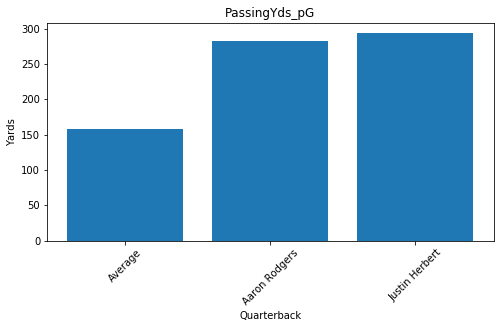

----------------------------------------
Defense

Avg Passing_Yds_pG: 241.11
Detroit Lions Passing_Yds_pG: 261.67
--------------------------------------------------
Avg Passing_Yds_pG: 241.11
Atlanta Falcons Passing_Yds_pG: 285.25
--------------------------------------------------


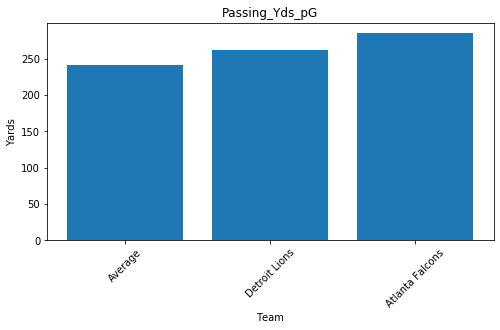

In [42]:
print('Quarterbacks')
print('')
average, rodgers, aaron = print_metric(quarterbacks, 'PassingYds_pG', qb1)
average, herbert, justin = print_metric(quarterbacks, 'PassingYds_pG', qb2)

x = ['Average', rodgers, herbert]
y = [average, aaron, justin]

bar_plot(x, y, 'PassingYds_pG', 'Quarterback', 'Yards')

print('-'*40)
print('Defense')
print('')

average, defteam1, team1 = print_metric_team(defense, 'Passing_Yds_pG', def1)
average, defteam2, team2 = print_metric_team(defense, 'Passing_Yds_pG', def2)

x = ['Average', defteam1, defteam2]
y = [average, team1, team2]

bar_plot(x, y, 'Passing_Yds_pG', 'Team', 'Yards')

Quarterbacks

Avg PassesAttempted_pG: 22.56
Aaron Rodgers PassesAttempted_pG: 34.58
--------------------------------------------------
Avg PassesAttempted_pG: 22.56
Justin Herbert PassesAttempted_pG: 41.36
--------------------------------------------------


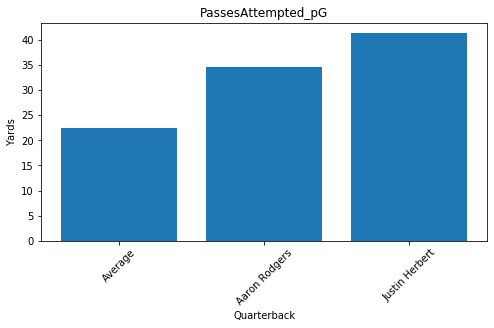

----------------------------------------
Defense

Avg Passing_Att_pG: 35.3
Detroit Lions Passing_Att_pG: 34.58
--------------------------------------------------
Avg Passing_Att_pG: 35.3
Atlanta Falcons Passing_Att_pG: 37.5
--------------------------------------------------


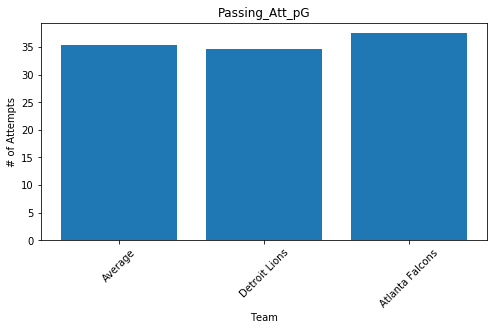

In [43]:
print('Quarterbacks')
print('')
average, rodgers, aaron = print_metric(quarterbacks, 'PassesAttempted_pG', qb1)
average, herbert, justin = print_metric(quarterbacks, 'PassesAttempted_pG', qb2)

x = ['Average', rodgers, herbert]
y = [average, aaron, justin]

bar_plot(x, y, 'PassesAttempted_pG', 'Quarterback', 'Yards')

print('-'*40)
print('Defense')
print('')

average, defteam1, team1 = print_metric_team(defense, 'Passing_Att_pG', def1)
average, defteam2, team2 = print_metric_team(defense, 'Passing_Att_pG', def2)

x = ['Average', defteam1, defteam2]
y = [average, team1, team2]

bar_plot(x, y, 'Passing_Att_pG', 'Team', '# of Attempts')

Quarterbacks

Avg Completion_Percent: 0.62
Aaron Rodgers Completion_Percent: 0.69
--------------------------------------------------
Avg Completion_Percent: 0.62
Justin Herbert Completion_Percent: 0.65
--------------------------------------------------


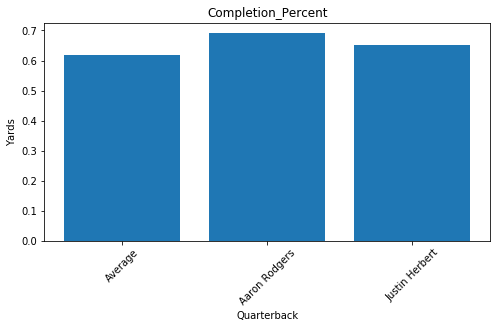

----------------------------------------
Defense

Avg Completion_Percent_Allowed: 0.65
Detroit Lions Completion_Percent_Allowed: 0.67
--------------------------------------------------
Avg Completion_Percent_Allowed: 0.65
Atlanta Falcons Completion_Percent_Allowed: 0.68
--------------------------------------------------


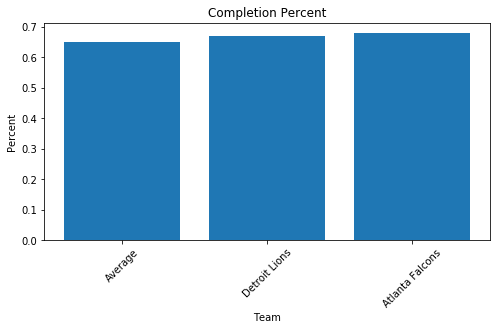

In [44]:
print('Quarterbacks')
print('')
average, rodgers, aaron = print_metric(quarterbacks, 'Completion_Percent', qb1)
average, herbert, justin = print_metric(quarterbacks, 'Completion_Percent', qb2)

x = ['Average', rodgers, herbert]
y = [average, aaron, justin]

bar_plot(x, y, 'Completion_Percent', 'Quarterback', 'Yards')

print('-'*40)
print('Defense')
print('')

average, defteam1, team1 = print_metric_team(defense, 'Completion_Percent_Allowed', def1)
average, defteam2, team2 = print_metric_team(defense, 'Completion_Percent_Allowed', def2)

x = ['Average', defteam1, defteam2]
y = [average, team1, team2]

bar_plot(x, y, 'Completion Percent', 'Team', 'Percent')

Quarterbacks

Avg RushingYds_pG: 10.12
Aaron Rodgers RushingYds_pG: 7.25
--------------------------------------------------
Avg RushingYds_pG: 10.12
Justin Herbert RushingYds_pG: 16.82
--------------------------------------------------


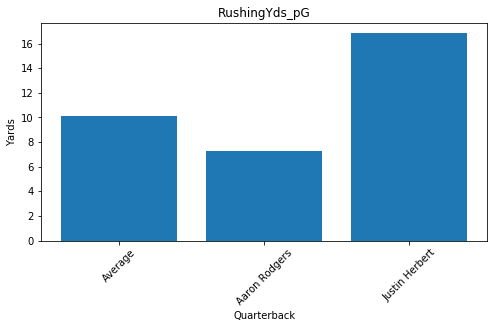

----------------------------------------
Defense

Avg Rushing_Yds_pG: 116.29
Detroit Lions Rushing_Yds_pG: 133.92
--------------------------------------------------
Avg Rushing_Yds_pG: 116.29
Atlanta Falcons Rushing_Yds_pG: 109.17
--------------------------------------------------


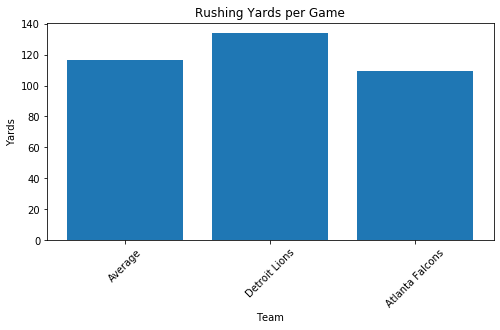

In [45]:
print('Quarterbacks')
print('')
average, rodgers, aaron = print_metric(quarterbacks, 'RushingYds_pG', qb1)
average, herbert, justin = print_metric(quarterbacks, 'RushingYds_pG', qb2)

x = ['Average', rodgers, herbert]
y = [average, aaron, justin]

bar_plot(x, y, 'RushingYds_pG', 'Quarterback', 'Yards')

print('-'*40)
print('Defense')
print('')

average, defteam1, team1 = print_metric_team(defense, 'Rushing_Yds_pG', def1)
average, defteam2, team2 = print_metric_team(defense, 'Rushing_Yds_pG', def2)

x = ['Average', defteam1, defteam2]
y = [average, team1, team2]

bar_plot(x, y, 'Rushing Yards per Game', 'Team', 'Yards')

Quarterbacks

Avg PassingTDs_pG: 0.98
Aaron Rodgers PassingTDs_pG: 3.0
--------------------------------------------------
Avg PassingTDs_pG: 0.98
Justin Herbert PassingTDs_pG: 2.09
--------------------------------------------------


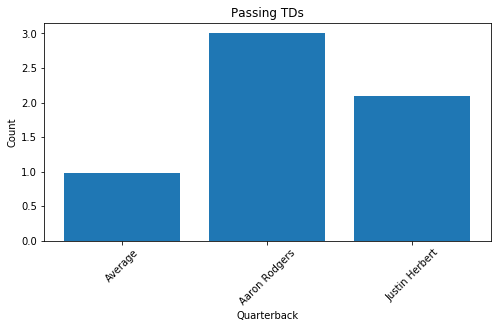

----------------------------------------
Defense

Avg Passing_TDs_pG: 1.7
Detroit Lions Passing_TDs_pG: 1.92
--------------------------------------------------
Avg Passing_TDs_pG: 1.7
Atlanta Falcons Passing_TDs_pG: 2.0
--------------------------------------------------


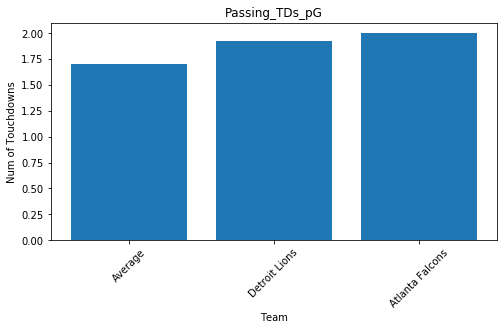

In [46]:
print('Quarterbacks')
print('')
average, rodgers, aaron = print_metric(quarterbacks, 'PassingTDs_pG', qb1)
average, herbert, justin = print_metric(quarterbacks, 'PassingTDs_pG', qb2)

x = ['Average', rodgers, herbert]
y = [average, aaron, justin]

bar_plot(x, y, 'Passing TDs', 'Quarterback', 'Count')

print('-'*40)
print('Defense')
print('')

average, defteam1, team1 = print_metric_team(defense, 'Passing_TDs_pG', def1)
average, defteam2, team2 = print_metric_team(defense, 'Passing_TDs_pG', def2)

x = ['Average', defteam1, defteam2]
y = [average, team1, team2]

bar_plot(x, y, 'Passing_TDs_pG', 'Team', 'Num of Touchdowns')

Quarterbacks

Avg Ttl_Turnovers_pG: 0.72
Aaron Rodgers Ttl_Turnovers_pG: 0.5
--------------------------------------------------
Avg Ttl_Turnovers_pG: 0.72
Justin Herbert Ttl_Turnovers_pG: 0.91
--------------------------------------------------


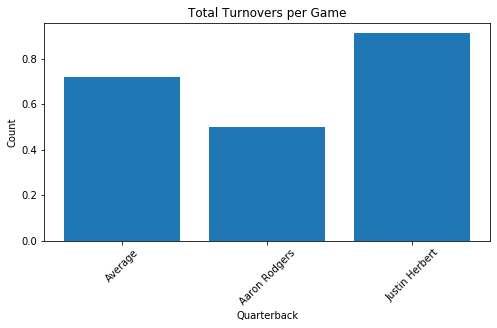

----------------------------------------
Defense

Avg Ttl_Turnovers_pG: 1.33
Detroit Lions Ttl_Turnovers_pG: 1.0
--------------------------------------------------
Avg Ttl_Turnovers_pG: 1.33
Atlanta Falcons Ttl_Turnovers_pG: 1.42
--------------------------------------------------


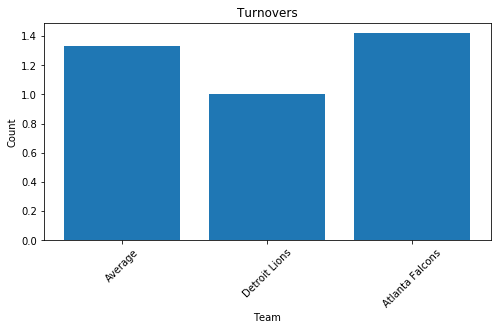

In [47]:
print('Quarterbacks')
print('')
average, rodgers, aaron = print_metric(quarterbacks, 'Ttl_Turnovers_pG', qb1)
average, herbert, justin = print_metric(quarterbacks, 'Ttl_Turnovers_pG', qb2)

x = ['Average', rodgers, herbert]
y = [average, aaron, justin]

bar_plot(x, y, 'Total Turnovers per Game', 'Quarterback', 'Count')

print('-'*40)
print('Defense')
print('')

average, defteam1, team1 = print_metric_team(defense, 'Ttl_Turnovers_pG', def1)
average, defteam2, team2 = print_metric_team(defense, 'Ttl_Turnovers_pG', def2)

x = ['Average', defteam1, defteam2]
y = [average, team1, team2]

bar_plot(x, y, 'Turnovers', 'Team', 'Count')

#### Additional Defense Stats

Avg RZ_Percent: 61.5
Detroit Lions RZ_Percent: 68.8
--------------------------------------------------
Avg RZ_Percent: 61.5
Atlanta Falcons RZ_Percent: 70.0
--------------------------------------------------


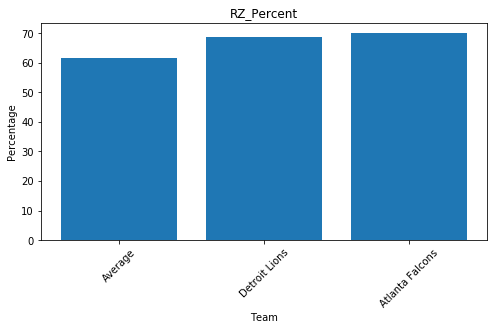

In [48]:
average, defteam1, team1 = print_metric_team(defense, 'RZ_Percent', def1)
average, defteam2, team2 = print_metric_team(defense, 'RZ_Percent', def2)

x = ['Average', defteam1, defteam2]
y = [average, team1, team2]

bar_plot(x, y, 'RZ_Percent', 'Team', 'Percentage')

Avg Ttl_Pts_Allowed_pG: 24.75
Detroit Lions Ttl_Pts_Allowed_pG: 29.83
--------------------------------------------------
Avg Ttl_Pts_Allowed_pG: 24.75
Atlanta Falcons Ttl_Pts_Allowed_pG: 25.17
--------------------------------------------------


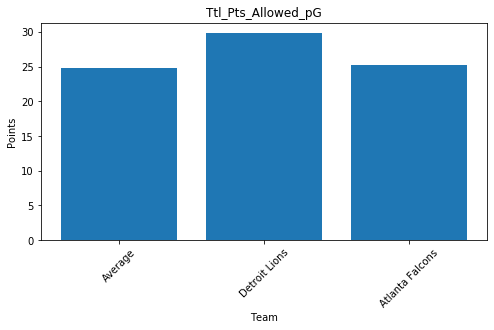

In [49]:
average, defteam1, team1 = print_metric_team(defense, 'Ttl_Pts_Allowed_pG', def1)
average, defteam2, team2 = print_metric_team(defense, 'Ttl_Pts_Allowed_pG', def2)

x = ['Average', defteam1, defteam2]
y = [average, team1, team2]

bar_plot(x, y, 'Ttl_Pts_Allowed_pG', 'Team', 'Points')

Avg Sacks_pG: 2.18
Detroit Lions Sacks_pG: 1.5
--------------------------------------------------
Avg Sacks_pG: 2.18
Atlanta Falcons Sacks_pG: 2.0
--------------------------------------------------


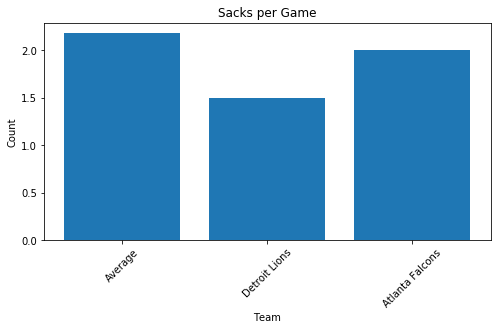

In [50]:
average, defteam1, team1 = print_metric_team(defense, 'Sacks_pG', def1)
average, defteam2, team2 = print_metric_team(defense, 'Sacks_pG', def2)

x = ['Average', defteam1, defteam2]
y = [average, team1, team2]

bar_plot(x, y, 'Sacks per Game', 'Team', 'Count')



## Runningbacks

In [51]:
runningbacks = offense[offense['Position'] == 'RB']

In [52]:
per_week_stats(runningbacks, 'RushingAttempts', 'Games')
per_week_stats(runningbacks, 'RushingYds', 'Games')
per_week_stats(runningbacks, 'Targeted', 'Games')
per_week_stats(runningbacks, 'Receptions', 'Games')
per_week_stats(runningbacks, 'RushingTDs', 'Games')
per_week_stats(runningbacks, 'ReceivingTDs', 'Games')
per_week_stats(runningbacks, 'LostFumbles', 'Games')

In [53]:
runningbacks.head()

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,Week_10,Week_11,Week_12,Week_13,RushingAttempts_pG,RushingYds_pG,Targeted_pG,Receptions_pG,RushingTDs_pG,ReceivingTDs_pG,LostFumbles_pG
0,Dalvin Cook,MIN,RB,25,11,11,0,0,0,0,0,251,1250,13.80,13,43,35,314,17.70,1,4,3,14,3,0,257.90,1,1,240.40,20.80,15.10,23.90,26.60,14.90,0.00,0.00,46.60,37.20,11.20,20.00,6.20,17.90,22.82,113.64,3.91,3.18,1.18,0.09,0.27
1,Derrick Henry,TEN,RB,26,12,12,0,0,0,0,0,271,1317,12.60,12,27,15,102,14.00,0,1,1,12,0,0,219.40,2,2,211.90,13.10,8.40,25.00,0.00,18.30,38.40,13.20,17.20,6.80,10.90,19.20,36.50,4.90,22.58,109.75,2.25,1.25,1.00,0.00,0.08
2,Alvin Kamara,NOR,RB,25,12,7,0,0,0,0,0,143,673,11.10,9,86,70,655,12.60,4,1,0,13,0,0,245.80,3,3,210.80,18.70,29.40,31.70,17.90,11.90,0.00,14.80,16.30,10.90,27.80,10.50,5.20,15.70,11.92,56.08,7.17,5.83,0.75,0.33,0.00
7,James Robinson,JAX,RB,22,12,12,0,0,0,0,0,212,968,9.70,7,53,42,310,10.80,2,3,1,9,1,0,202.80,4,8,181.80,9.00,18.00,24.90,10.70,5.00,11.30,27.70,0.00,15.90,11.20,9.40,21.90,16.80,17.67,80.67,4.42,3.50,0.58,0.17,0.08
14,Aaron Jones,GNB,RB,26,10,10,0,0,0,0,0,145,754,7.00,7,48,36,279,14.50,2,2,0,9,0,0,175.30,5,15,157.30,13.60,41.60,14.60,17.10,0.00,10.10,0.00,0.00,7.90,9.50,13.10,9.00,20.80,14.50,75.40,4.80,3.60,0.70,0.20,0.00


In [54]:
runningbacks[runningbacks['Player'].isin(myteam_wrt)]

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,Week_10,Week_11,Week_12,Week_13,RushingAttempts_pG,RushingYds_pG,Targeted_pG,Receptions_pG,RushingTDs_pG,ReceivingTDs_pG,LostFumbles_pG
1,Derrick Henry,TEN,RB,26,12,12,0,0,0,0,0,271,1317,12.60,12,27,15,102,14.00,0,1,1,12,0,0,219.40,2,2,211.90,13.10,8.40,25.00,0.00,18.30,38.40,13.20,17.20,6.80,10.90,19.20,36.50,4.90,22.58,109.75,2.25,1.25,1.00,0.00,0.08
49,Chris Carson,SEA,RB,26,8,8,0,0,0,0,0,87,429,13.30,4,33,27,210,14.80,4,1,0,8,0,0,125.40,18,50,111.90,18.60,16.80,7.60,22.00,13.90,0.00,4.10,0.00,0.00,0.00,0.00,11.90,17.00,10.88,53.62,4.12,3.38,0.50,0.50,0.00
68,D'Andre Swift,DET,RB,21,9,1,0,0,0,0,0,70,331,11.30,4,39,31,275,16.70,2,1,0,6,0,0,112.10,23,69,96.60,8.30,7.20,1.90,11.20,0.00,24.30,10.80,2.30,9.70,20.90,0.00,0.00,0.00,7.78,36.78,4.33,3.44,0.44,0.22,0.00


In [55]:
available_rbs = runningbacks[~runningbacks['Player'].isin(taken_wrt)]

In [56]:
scaled_rbs = available_rbs[['Player', 'Team', 'Position', 'Games', 'GamesStarted', 'RushingAttempts_pG', 
                            'RushingYds_pG', 'Targeted_pG', 'Receptions_pG', 'RushingTDs_pG', 'ReceivingTDs_pG', 
                            'LostFumbles_pG']]

rb_columns = ['RushingAttempts_pG', 'RushingYds_pG', 'Targeted_pG', 'Receptions_pG', 'RushingTDs_pG', 
              'ReceivingTDs_pG', 'LostFumbles_pG']

scale_data(scaled_rbs, rb_columns)

scaled_rbs.head()

,Player,Team,Position,Games,GamesStarted,RushingAttempts_pG,RushingYds_pG,Targeted_pG,Receptions_pG,RushingTDs_pG,ReceivingTDs_pG,LostFumbles_pG
1,Derrick Henry,TEN,RB,12,12,4.78,5.46,0.73,0.23,5.59,-0.46,1.63
45,Jonathan Taylor,IND,RB,11,9,2.44,2.29,1.11,1.63,1.63,0.55,1.81
49,Chris Carson,SEA,RB,8,8,1.77,2.19,2.22,2.38,2.48,5.09,-0.42
54,Darrell Henderson,LAR,RB,12,10,1.61,1.78,0.46,0.23,1.96,0.46,-0.42
59,Nyheim Hines,IND,RB,12,2,0.42,0.12,2.78,2.92,0.93,3.24,-0.42


In [57]:
scaled_rbs['Combined_Score'] = (scaled_rbs['RushingAttempts_pG'] + scaled_rbs['RushingYds_pG'] + 
                                scaled_rbs['Targeted_pG'] + scaled_rbs['Receptions_pG'] + 
                                scaled_rbs['RushingTDs_pG'] + scaled_rbs['ReceivingTDs_pG'] - 
                                scaled_rbs['LostFumbles_pG'])

scaled_rbs.sort_values('Combined_Score', ascending=False, inplace=True)
scaled_rbs.head(10)

,Player,Team,Position,Games,GamesStarted,RushingAttempts_pG,RushingYds_pG,Targeted_pG,Receptions_pG,RushingTDs_pG,ReceivingTDs_pG,LostFumbles_pG,Combined_Score
49,Chris Carson,SEA,RB,8,8,1.77,2.19,2.22,2.38,2.48,5.09,-0.42,16.54
1,Derrick Henry,TEN,RB,12,12,4.78,5.46,0.73,0.23,5.59,-0.46,1.63,14.70
68,D'Andre Swift,DET,RB,9,1,0.98,1.21,2.38,2.45,2.13,2.00,-0.42,11.57
59,Nyheim Hines,IND,RB,12,2,0.42,0.12,2.78,2.92,0.93,3.24,-0.42,10.82
115,Rex Burkhead,NWE,RB,10,0,0.70,0.66,1.56,1.49,1.24,2.87,-0.42,8.93
279,Salvon Ahmed,MIA,RB,3,2,2.41,2.29,0.79,0.99,1.44,-0.46,-0.42,7.87
45,Jonathan Taylor,IND,RB,11,9,2.44,2.29,1.11,1.63,1.63,0.55,1.81,7.83
212,Kalen Ballage,2TM,RB,7,2,1.15,0.96,2.57,2.72,0.26,-0.46,-0.42,7.61
110,Jamaal Williams,GNB,RB,11,3,1.39,1.37,1.32,1.63,0.50,0.55,-0.42,7.17
129,Giovani Bernard,CIN,RB,12,6,0.63,0.29,1.98,2.00,0.41,1.39,-0.42,7.11


In [58]:
rb1 = 49
rb2 = 1
rb3 = 68
rb4 = 59
rb5 = 115
rb6 = 279

Week 13 opponents:
    
    Seattle Seahawks vs New York Jets
    Tennessee Titans vs Jacksonville Jaguars
    Detroit Lions vs Green Bay Packers
    Indianapolis Colts vs Las Vegas Raiders
    New England Patriots vs Los Angeles Rams
    Miami Dolphins vs Kansas City

In [59]:
rb_opp = ['New York Jets', 'Jacksonville Jaguars', 'Green Bay Packers', 'Las Vegas Raiders', 
          'Los Angeles Rams', 'Kansas City Chiefs']

defense[defense['Team'].isin(rb_opp)]

,Team,GP,Ttl_Pts_Allowed,Ttl_Offense_Plays_Allowed,Yds_p_Play,Ttl_Yds,Rushing_Att,Rushing_Yds,Rushing_Yds_p_Att,Rushing_TDs,Passing_Att,Passing_Yds_p_Att,Completions,Yds_p_Completion,Passing_Yds,Passing_TDs,RZ_Att,RZ_TD,RZ_Percent,Ttl_Turnovers,Interceptions,Fumbles,Sacks,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,Week_10,Week_11,Week_12,Week_13,Ttl_Pts_Allowed_pG,Ttl_Yds_pG,Rushing_Att_pG,Rushing_Yds_pG,Rushing_TDs_pG,Passing_Att_pG,Completions_pG,Completion_Percent_Allowed,Passing_Yds_pG,Passing_TDs_pG,Ttl_TDs_pG,Ttl_Turnovers_pG,Fumbles_pG,Sacks_pG,TTL_pG
4,Los Angeles Rams,12,243,757,4.60,3496,286,1117,3.90,10,435,5.10,272,9.70,2379,14,33,22,66.70,20,12,8,36,102.00,4.00,7.00,4.00,11.00,12.00,0.00,15.00,5.00,0.00,13.00,5.00,15.00,11.00,20.25,291.33,23.83,93.08,0.83,36.25,22.67,0.63,198.25,1.17,2.00,1.67,0.67,3.00,8.50
5,Kansas City Chiefs,12,254,762,5.60,4298,334,1589,4.80,10,408,6.30,257,11.00,2709,19,33,25,75.80,19,14,5,20,84.00,7.00,5.00,7.00,20.00,-1.00,3.00,18.00,7.00,1.00,0.00,1.00,5.00,5.00,21.17,358.17,27.83,132.42,0.83,34.00,21.42,0.63,225.75,1.58,2.42,1.58,0.42,1.67,7.00
14,Green Bay Packers,12,299,721,5.60,4071,297,1375,4.60,11,393,6.40,254,11.40,2696,21,36,24,66.70,13,8,5,31,71.00,5.00,12.00,3.00,5.00,0.00,-1.00,6.00,0.00,6.00,6.00,4.00,15.00,10.00,24.92,339.25,24.75,114.58,0.92,32.75,21.17,0.65,224.67,1.75,2.67,1.08,0.42,2.58,5.92
27,Las Vegas Raiders,12,347,780,5.80,4538,321,1453,4.50,19,444,6.70,278,11.40,3085,20,50,34,68.00,15,10,5,15,39.00,0.00,2.00,3.00,0.00,4.00,0.00,-4.00,9.00,4.00,16.00,-2.00,-1.00,8.00,28.92,378.17,26.75,121.08,1.58,37.00,23.17,0.63,257.08,1.67,3.25,1.25,0.42,1.25,3.25
28,Jacksonville Jaguars,12,352,805,6.20,4992,370,1643,4.40,14,420,7.70,291,11.80,3349,26,45,27,60.00,13,9,4,15,57.00,6.00,0.00,0.00,2.00,4.00,1.00,9.00,0.00,4.00,11.00,2.00,4.00,14.00,29.33,416.00,30.83,136.92,1.17,35.00,24.25,0.69,279.08,2.17,3.33,1.08,0.33,1.25,4.75
29,New York Jets,12,353,818,5.80,4785,343,1293,3.80,13,455,7.40,321,11.20,3492,24,46,25,54.30,15,8,7,20,49.00,7.00,4.00,0.00,8.00,2.00,6.00,5.00,-4.00,-1.00,0.00,8.00,9.00,5.00,29.42,398.75,28.58,107.75,1.08,37.92,26.75,0.71,291.00,2.00,3.08,1.25,0.58,1.67,4.08


In [60]:
teamRB1 = 29
teamRB2 = 28
teamRB3 = 14
teamRB4 = 27
teamRB5 = 4
teamRB6 = 5

### Running Back Comparison

Running Backs

Avg RushingAttempts_pG: 3.97
Chris Carson RushingAttempts_pG: 10.88
--------------------------------------------------
Avg RushingAttempts_pG: 3.97
Derrick Henry RushingAttempts_pG: 22.58
--------------------------------------------------
Avg RushingAttempts_pG: 3.97
D'Andre Swift RushingAttempts_pG: 7.78
--------------------------------------------------
Avg RushingAttempts_pG: 3.97
Nyheim Hines RushingAttempts_pG: 5.58
--------------------------------------------------
Avg RushingAttempts_pG: 3.97
Rex Burkhead RushingAttempts_pG: 6.7
--------------------------------------------------
Avg RushingAttempts_pG: 3.97
Salvon Ahmed RushingAttempts_pG: 13.33
--------------------------------------------------


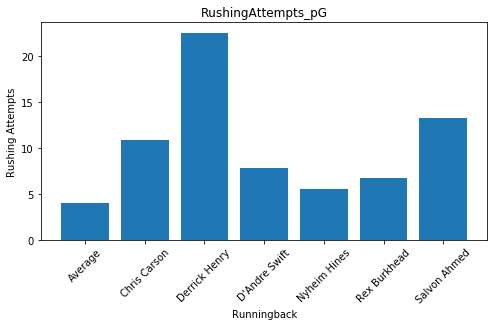

----------------------------------------
Defense

Avg Rushing_Att_pG: 26.95
New York Jets Rushing_Att_pG: 28.58
--------------------------------------------------
Avg Rushing_Att_pG: 26.95
Jacksonville Jaguars Rushing_Att_pG: 30.83
--------------------------------------------------
Avg Rushing_Att_pG: 26.95
Green Bay Packers Rushing_Att_pG: 24.75
--------------------------------------------------
Avg Rushing_Att_pG: 26.95
Las Vegas Raiders Rushing_Att_pG: 26.75
--------------------------------------------------
Avg Rushing_Att_pG: 26.95
Los Angeles Rams Rushing_Att_pG: 23.83
--------------------------------------------------
Avg Rushing_Att_pG: 26.95
Kansas City Chiefs Rushing_Att_pG: 27.83
--------------------------------------------------


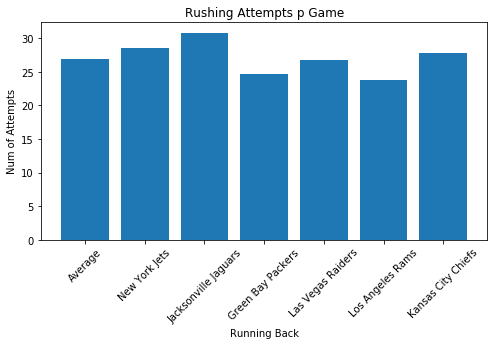

In [61]:
print('Running Backs')
print('')
average, rb_1, _1rb = print_metric(available_rbs, 'RushingAttempts_pG', rb1)
average, rb_2, _2rb = print_metric(available_rbs, 'RushingAttempts_pG', rb2)
average, rb_3, _3rb = print_metric(available_rbs, 'RushingAttempts_pG', rb3)
average, rb_4, _4rb = print_metric(available_rbs, 'RushingAttempts_pG', rb4)
average, rb_5, _5rb = print_metric(available_rbs, 'RushingAttempts_pG', rb5)
average, rb_6, _6rb = print_metric(available_rbs, 'RushingAttempts_pG', rb6)

x = ['Average', rb_1, rb_2, rb_3, rb_4, rb_5, rb_6]
y = [average, _1rb, _2rb, _3rb, _4rb, _5rb, _6rb]

bar_plot(x, y, 'RushingAttempts_pG', 'Runningback', 'Rushing Attempts')

print('-'*40)
print('Defense')
print('')

average, team_rb1, rbteam1 = print_metric_team(defense, 'Rushing_Att_pG', teamRB1)
average, team_rb2, rbteam2 = print_metric_team(defense, 'Rushing_Att_pG', teamRB2)
average, team_rb3, rbteam3 = print_metric_team(defense, 'Rushing_Att_pG', teamRB3)
average, team_rb4, rbteam4 = print_metric_team(defense, 'Rushing_Att_pG', teamRB4)
average, team_rb5, rbteam5 = print_metric_team(defense, 'Rushing_Att_pG', teamRB5)
average, team_rb6, rbteam6 = print_metric_team(defense, 'Rushing_Att_pG', teamRB6)

x = ['Average', team_rb1, team_rb2, team_rb3, team_rb4, team_rb5, team_rb6]
y = [average, rbteam1, rbteam2, rbteam3, rbteam4, rbteam5, rbteam6]

bar_plot(x, y, 'Rushing Attempts p Game', 'Running Back', 'Num of Attempts')

Running Backs

Avg RushingYds_pG: 16.08
Chris Carson RushingYds_pG: 53.62
--------------------------------------------------
Avg RushingYds_pG: 16.08
Derrick Henry RushingYds_pG: 109.75
--------------------------------------------------
Avg RushingYds_pG: 16.08
D'Andre Swift RushingYds_pG: 36.78
--------------------------------------------------
Avg RushingYds_pG: 16.08
Nyheim Hines RushingYds_pG: 18.17
--------------------------------------------------
Avg RushingYds_pG: 16.08
Rex Burkhead RushingYds_pG: 27.4
--------------------------------------------------
Avg RushingYds_pG: 16.08
Salvon Ahmed RushingYds_pG: 55.33
--------------------------------------------------


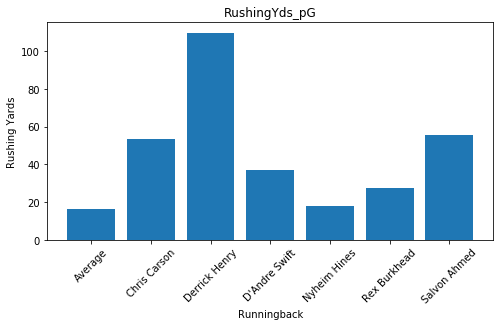

----------------------------------------
Defense

Avg Rushing_Yds_pG: 116.29
New York Jets Rushing_Yds_pG: 107.75
--------------------------------------------------
Avg Rushing_Yds_pG: 116.29
Jacksonville Jaguars Rushing_Yds_pG: 136.92
--------------------------------------------------
Avg Rushing_Yds_pG: 116.29
Green Bay Packers Rushing_Yds_pG: 114.58
--------------------------------------------------
Avg Rushing_Yds_pG: 116.29
Las Vegas Raiders Rushing_Yds_pG: 121.08
--------------------------------------------------
Avg Rushing_Yds_pG: 116.29
Los Angeles Rams Rushing_Yds_pG: 93.08
--------------------------------------------------
Avg Rushing_Yds_pG: 116.29
Kansas City Chiefs Rushing_Yds_pG: 132.42
--------------------------------------------------


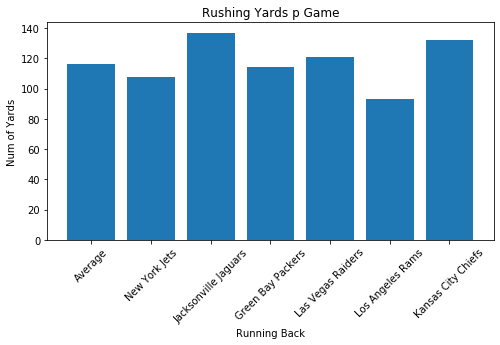

In [62]:
print('Running Backs')
print('')
average, rb_1, _1rb = print_metric(available_rbs, 'RushingYds_pG', rb1)
average, rb_2, _2rb = print_metric(available_rbs, 'RushingYds_pG', rb2)
average, rb_3, _3rb = print_metric(available_rbs, 'RushingYds_pG', rb3)
average, rb_4, _4rb = print_metric(available_rbs, 'RushingYds_pG', rb4)
average, rb_5, _5rb = print_metric(available_rbs, 'RushingYds_pG', rb5)
average, rb_6, _6rb = print_metric(available_rbs, 'RushingYds_pG', rb6)

x = ['Average', rb_1, rb_2, rb_3, rb_4, rb_5, rb_6]
y = [average, _1rb, _2rb, _3rb, _4rb, _5rb, _6rb]

bar_plot(x, y, 'RushingYds_pG', 'Runningback', 'Rushing Yards')

print('-'*40)
print('Defense')
print('')

average, team_rb1, rbteam1 = print_metric_team(defense, 'Rushing_Yds_pG', teamRB1)
average, team_rb2, rbteam2 = print_metric_team(defense, 'Rushing_Yds_pG', teamRB2)
average, team_rb3, rbteam3 = print_metric_team(defense, 'Rushing_Yds_pG', teamRB3)
average, team_rb4, rbteam4 = print_metric_team(defense, 'Rushing_Yds_pG', teamRB4)
average, team_rb5, rbteam5 = print_metric_team(defense, 'Rushing_Yds_pG', teamRB5)
average, team_rb6, rbteam6 = print_metric_team(defense, 'Rushing_Yds_pG', teamRB6)

x = ['Average', team_rb1, team_rb2, team_rb3, team_rb4, team_rb5, team_rb6]
y = [average, rbteam1, rbteam2, rbteam3, rbteam4, rbteam5, rbteam6]

bar_plot(x, y, 'Rushing Yards p Game', 'Running Back', 'Num of Yards')

Running Backs

Avg RushingTDs_pG: 0.1
Chris Carson RushingTDs_pG: 0.5
--------------------------------------------------
Avg RushingTDs_pG: 0.1
Derrick Henry RushingTDs_pG: 1.0
--------------------------------------------------
Avg RushingTDs_pG: 0.1
D'Andre Swift RushingTDs_pG: 0.44
--------------------------------------------------
Avg RushingTDs_pG: 0.1
Nyheim Hines RushingTDs_pG: 0.25
--------------------------------------------------
Avg RushingTDs_pG: 0.1
Rex Burkhead RushingTDs_pG: 0.3
--------------------------------------------------
Avg RushingTDs_pG: 0.1
Salvon Ahmed RushingTDs_pG: 0.33
--------------------------------------------------


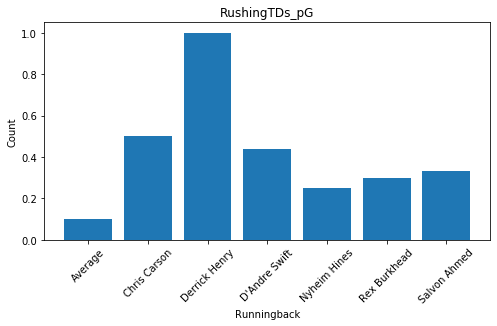

----------------------------------------
Defense

Avg Rushing_TDs_pG: 1.0
New York Jets Rushing_TDs_pG: 1.08
--------------------------------------------------
Avg Rushing_TDs_pG: 1.0
Jacksonville Jaguars Rushing_TDs_pG: 1.17
--------------------------------------------------
Avg Rushing_TDs_pG: 1.0
Green Bay Packers Rushing_TDs_pG: 0.92
--------------------------------------------------
Avg Rushing_TDs_pG: 1.0
Las Vegas Raiders Rushing_TDs_pG: 1.58
--------------------------------------------------
Avg Rushing_TDs_pG: 1.0
Los Angeles Rams Rushing_TDs_pG: 0.83
--------------------------------------------------
Avg Rushing_TDs_pG: 1.0
Kansas City Chiefs Rushing_TDs_pG: 0.83
--------------------------------------------------


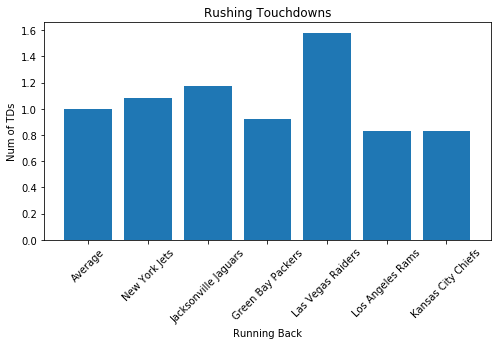

In [63]:
print('Running Backs')
print('')
average, rb_1, _1rb = print_metric(available_rbs, 'RushingTDs_pG', rb1)
average, rb_2, _2rb = print_metric(available_rbs, 'RushingTDs_pG', rb2)
average, rb_3, _3rb = print_metric(available_rbs, 'RushingTDs_pG', rb3)
average, rb_4, _4rb = print_metric(available_rbs, 'RushingTDs_pG', rb4)
average, rb_5, _5rb = print_metric(available_rbs, 'RushingTDs_pG', rb5)
average, rb_6, _6rb = print_metric(available_rbs, 'RushingTDs_pG', rb6)

x = ['Average', rb_1, rb_2, rb_3, rb_4, rb_5, rb_6]
y = [average, _1rb, _2rb, _3rb, _4rb, _5rb, _6rb]

bar_plot(x, y, 'RushingTDs_pG', 'Runningback', 'Count')

print('-'*40)
print('Defense')
print('')

average, team_rb1, rbteam1 = print_metric_team(defense, 'Rushing_TDs_pG', teamRB1)
average, team_rb2, rbteam2 = print_metric_team(defense, 'Rushing_TDs_pG', teamRB2)
average, team_rb3, rbteam3 = print_metric_team(defense, 'Rushing_TDs_pG', teamRB3)
average, team_rb4, rbteam4 = print_metric_team(defense, 'Rushing_TDs_pG', teamRB4)
average, team_rb5, rbteam5 = print_metric_team(defense, 'Rushing_TDs_pG', teamRB5)
average, team_rb6, rbteam6 = print_metric_team(defense, 'Rushing_TDs_pG', teamRB6)

x = ['Average', team_rb1, team_rb2, team_rb3, team_rb4, team_rb5, team_rb6]
y = [average, rbteam1, rbteam2, rbteam3, rbteam4, rbteam5, rbteam6]

bar_plot(x, y, 'Rushing Touchdowns', 'Running Back', 'Num of TDs')

Running Backs

Avg LostFumbles_pG: 0.02
Chris Carson LostFumbles_pG: 0.0
--------------------------------------------------
Avg LostFumbles_pG: 0.02
Derrick Henry LostFumbles_pG: 0.08
--------------------------------------------------
Avg LostFumbles_pG: 0.02
D'Andre Swift LostFumbles_pG: 0.0
--------------------------------------------------
Avg LostFumbles_pG: 0.02
Nyheim Hines LostFumbles_pG: 0.0
--------------------------------------------------
Avg LostFumbles_pG: 0.02
Rex Burkhead LostFumbles_pG: 0.0
--------------------------------------------------
Avg LostFumbles_pG: 0.02
Salvon Ahmed LostFumbles_pG: 0.0
--------------------------------------------------


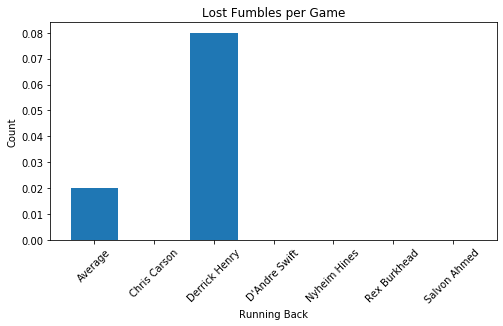

----------------------------------------
Defense

Avg Fumbles_pG: 0.54
New York Jets Fumbles_pG: 0.58
--------------------------------------------------
Avg Fumbles_pG: 0.54
Jacksonville Jaguars Fumbles_pG: 0.33
--------------------------------------------------
Avg Fumbles_pG: 0.54
Green Bay Packers Fumbles_pG: 0.42
--------------------------------------------------
Avg Fumbles_pG: 0.54
Las Vegas Raiders Fumbles_pG: 0.42
--------------------------------------------------
Avg Fumbles_pG: 0.54
Los Angeles Rams Fumbles_pG: 0.67
--------------------------------------------------
Avg Fumbles_pG: 0.54
Kansas City Chiefs Fumbles_pG: 0.42
--------------------------------------------------


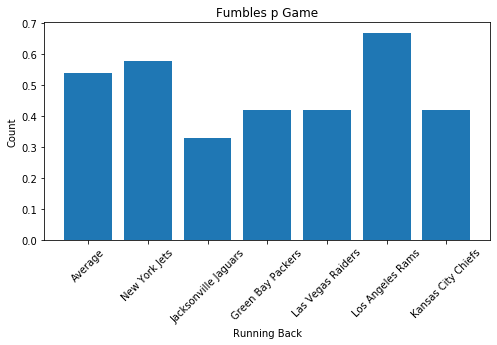

In [64]:
print('Running Backs')
print('')
average, rb_1, _1rb = print_metric(available_rbs, 'LostFumbles_pG', rb1)
average, rb_2, _2rb = print_metric(available_rbs, 'LostFumbles_pG', rb2)
average, rb_3, _3rb = print_metric(available_rbs, 'LostFumbles_pG', rb3)
average, rb_4, _4rb = print_metric(available_rbs, 'LostFumbles_pG', rb4)
average, rb_5, _5rb = print_metric(available_rbs, 'LostFumbles_pG', rb5)
average, rb_6, _6rb = print_metric(available_rbs, 'LostFumbles_pG', rb6)

x = ['Average', rb_1, rb_2, rb_3, rb_4, rb_5, rb_6]
y = [average, _1rb, _2rb, _3rb, _4rb, _5rb, _6rb]

bar_plot(x, y, 'Lost Fumbles per Game', 'Running Back', 'Count')

print('-'*40)
print('Defense')
print('')

average, team_rb1, rbteam1 = print_metric_team(defense, 'Fumbles_pG', teamRB1)
average, team_rb2, rbteam2 = print_metric_team(defense, 'Fumbles_pG', teamRB2)
average, team_rb3, rbteam3 = print_metric_team(defense, 'Fumbles_pG', teamRB3)
average, team_rb4, rbteam4 = print_metric_team(defense, 'Fumbles_pG', teamRB4)
average, team_rb5, rbteam5 = print_metric_team(defense, 'Fumbles_pG', teamRB5)
average, team_rb6, rbteam6 = print_metric_team(defense, 'Fumbles_pG', teamRB6)

x = ['Average', team_rb1, team_rb2, team_rb3, team_rb4, team_rb5, team_rb6]
y = [average, rbteam1, rbteam2, rbteam3, rbteam4, rbteam5, rbteam6]

bar_plot(x, y, 'Fumbles p Game', 'Running Back', 'Count')

#### Additional Running Back Analysis

Avg Targeted_pG: 1.34
Chris Carson Targeted_pG: 4.12
--------------------------------------------------
Avg Targeted_pG: 1.34
Derrick Henry Targeted_pG: 2.25
--------------------------------------------------
Avg Targeted_pG: 1.34
D'Andre Swift Targeted_pG: 4.33
--------------------------------------------------
Avg Targeted_pG: 1.34
Nyheim Hines Targeted_pG: 4.83
--------------------------------------------------
Avg Targeted_pG: 1.34
Rex Burkhead Targeted_pG: 3.3
--------------------------------------------------
Avg Targeted_pG: 1.34
Salvon Ahmed Targeted_pG: 2.33
--------------------------------------------------


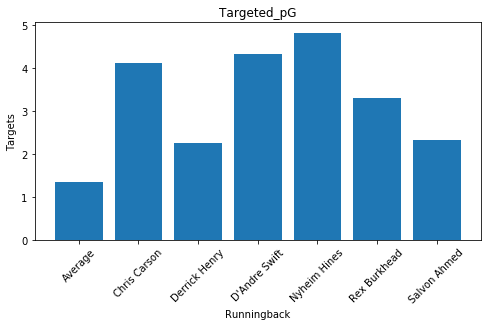

In [65]:
average, rb_1, _1rb = print_metric(available_rbs, 'Targeted_pG', rb1)
average, rb_2, _2rb = print_metric(available_rbs, 'Targeted_pG', rb2)
average, rb_3, _3rb = print_metric(available_rbs, 'Targeted_pG', rb3)
average, rb_4, _4rb = print_metric(available_rbs, 'Targeted_pG', rb4)
average, rb_5, _5rb = print_metric(available_rbs, 'Targeted_pG', rb5)
average, rb_6, _6rb = print_metric(available_rbs, 'Targeted_pG', rb6)

x = ['Average', rb_1, rb_2, rb_3, rb_4, rb_5, rb_6]
y = [average, _1rb, _2rb, _3rb, _4rb, _5rb, _6rb]

bar_plot(x, y, 'Targeted_pG', 'Runningback', 'Targets')

Avg Receptions_pG: 1.02
Chris Carson Receptions_pG: 3.38
--------------------------------------------------
Avg Receptions_pG: 1.02
Derrick Henry Receptions_pG: 1.25
--------------------------------------------------
Avg Receptions_pG: 1.02
D'Andre Swift Receptions_pG: 3.44
--------------------------------------------------
Avg Receptions_pG: 1.02
Nyheim Hines Receptions_pG: 3.92
--------------------------------------------------
Avg Receptions_pG: 1.02
Rex Burkhead Receptions_pG: 2.5
--------------------------------------------------
Avg Receptions_pG: 1.02
Salvon Ahmed Receptions_pG: 2.0
--------------------------------------------------


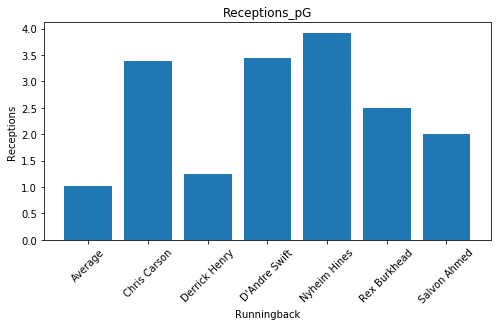

In [66]:
average, rb_1, _1rb = print_metric(available_rbs, 'Receptions_pG', rb1)
average, rb_2, _2rb = print_metric(available_rbs, 'Receptions_pG', rb2)
average, rb_3, _3rb = print_metric(available_rbs, 'Receptions_pG', rb3)
average, rb_4, _4rb = print_metric(available_rbs, 'Receptions_pG', rb4)
average, rb_5, _5rb = print_metric(available_rbs, 'Receptions_pG', rb5)
average, rb_6, _6rb = print_metric(available_rbs, 'Receptions_pG', rb6)

x = ['Average', rb_1, rb_2, rb_3, rb_4, rb_5, rb_6]
y = [average, _1rb, _2rb, _3rb, _4rb, _5rb, _6rb]

bar_plot(x, y, 'Receptions_pG', 'Runningback', 'Receptions')


## Tight End

In [68]:
tight_ends = offense[offense['Position'] == 'TE']

In [69]:
per_week_stats(tight_ends, 'Targeted', 'Games')
per_week_stats(tight_ends, 'Receptions', 'Games')
per_week_stats(tight_ends, 'ReceivingYds', 'Games')
per_week_stats(tight_ends, 'ReceivingTDs', 'Games')
per_week_stats(tight_ends, 'LostFumbles', 'Games')

In [70]:
tight_ends.head()

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,Week_10,Week_11,Week_12,Week_13,Targeted_pG,Receptions_pG,ReceivingYds_pG,ReceivingTDs_pG,LostFumbles_pG
6,Travis Kelce,KAN,TE,31,12,12,1,2,4,0,0,0,0,0.00,0,111,82,1114,18.90,8,1,1,8,0,0,198.60,1,7,157.60,11.00,15.00,8.70,7.00,16.80,16.50,3.10,16.90,15.90,0.00,18.90,8.20,19.60,9.25,6.83,92.83,0.67,0.08
19,Darren Waller,LVR,TE,28,12,11,0,0,0,0,0,0,0,0.00,0,107,77,742,15.40,7,1,1,7,0,0,152.70,2,20,114.20,4.50,16.30,0.90,6.80,10.80,0.00,11.00,2.80,8.20,3.70,14.80,2.30,32.00,8.92,6.42,61.83,0.58,0.08
31,Robert Tonyan,GNB,TE,26,12,8,0,0,0,0,0,0,0,0.00,0,47,41,497,13.20,8,0,0,8,0,0,118.20,3,32,97.70,0.00,8.50,11.00,27.80,0.00,2.50,3.20,7.90,0.50,3.30,10.40,12.70,9.90,3.92,3.42,41.42,0.67,0.00
38,T.J. Hockenson,DET,TE,23,12,12,0,0,0,0,0,0,0,0.00,0,77,52,614,19.10,5,0,0,5,1,0,119.40,4,39,93.40,11.60,6.20,5.30,8.90,0.00,7.70,11.90,6.50,9.90,1.30,6.80,8.90,8.40,6.42,4.33,51.17,0.42,0.00
51,Jonnu Smith,TEN,TE,25,11,10,0,0,0,0,0,1,1,1.00,1,49,30,338,13.70,7,0,0,8,0,0,96.90,5,52,81.90,9.60,20.40,6.10,0.00,16.00,1.30,0.90,2.90,9.20,7.50,8.00,0.00,0.00,4.45,2.73,30.73,0.64,0.00


In [71]:
tight_ends[tight_ends['Player'].isin(myteam_wrt)]

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,Week_10,Week_11,Week_12,Week_13,Targeted_pG,Receptions_pG,ReceivingYds_pG,ReceivingTDs_pG,LostFumbles_pG
60,Rob Gronkowski,TAM,TE,31,12,12,0,0,0,0,0,0,0,0.00,0,62,37,505,19.50,4,1,0,4,0,0,93.00,8,61,74.50,1.10,0.00,4.80,2.90,5.20,13.80,12.20,10.10,0.20,11.10,2.50,10.60,0.00,5.17,3.08,42.08,0.33,0.00
187,Trey Burton,IND,TE,29,9,3,0,0,0,0,0,2,3,6.00,2,41,24,224,12.30,3,0,0,5,0,0,64.70,21,,52.70,0.00,0.00,0.00,1.60,3.30,17.90,0.00,7.10,0.60,2.40,8.50,10.20,1.10,4.56,2.67,24.89,0.33,0.00


In [72]:
available_te = tight_ends[~tight_ends['Player'].isin(taken_wrt)]

In [73]:
scaled_te = available_te[['Player', 'Team', 'Position', 'Age', 'Games', 'GamesStarted', 'Targeted_pG', 
                          'Receptions_pG', 'ReceivingYds_pG', 'ReceivingTDs_pG', 'LostFumbles_pG']]

te_columns = ['Targeted_pG', 'Receptions_pG', 'ReceivingYds_pG', 'ReceivingTDs_pG', 'LostFumbles_pG']

scale_data(scaled_te, te_columns)

scaled_te.head()

,Player,Team,Position,Age,Games,GamesStarted,Targeted_pG,Receptions_pG,ReceivingYds_pG,ReceivingTDs_pG,LostFumbles_pG
31,Robert Tonyan,GNB,TE,26,12,8,1.31,2.01,2.36,3.52,-0.34
51,Jonnu Smith,TEN,TE,25,11,10,1.65,1.37,1.47,3.32,-0.34
60,Rob Gronkowski,TAM,TE,31,12,12,2.10,1.70,2.41,1.32,-0.34
62,Logan Thomas,WAS,TE,29,12,11,2.46,2.17,1.87,1.87,-0.34
77,Hayden Hurst,ATL,TE,27,12,9,2.41,2.09,2.16,0.77,-0.34


In [74]:
scaled_te['Combined_Score'] = (scaled_te['Targeted_pG'] + scaled_te['Receptions_pG'] + 
                               scaled_te['ReceivingYds_pG'] + scaled_te['ReceivingTDs_pG'] -
                               scaled_te['LostFumbles_pG'])

scaled_te.sort_values('Combined_Score', ascending = False, inplace = True)
scaled_te.head(10)

,Player,Team,Position,Age,Games,GamesStarted,Targeted_pG,Receptions_pG,ReceivingYds_pG,ReceivingTDs_pG,LostFumbles_pG,Combined_Score
345,C.J. Uzomah,CIN,TE,27,2,2,2.31,2.55,2.53,2.42,-0.34,10.16
31,Robert Tonyan,GNB,TE,26,12,8,1.31,2.01,2.36,3.52,-0.34,9.54
62,Logan Thomas,WAS,TE,29,12,11,2.46,2.17,1.87,1.87,-0.34,8.71
51,Jonnu Smith,TEN,TE,25,11,10,1.65,1.37,1.47,3.32,-0.34,8.16
277,O.J. Howard,TAM,TE,26,4,1,1.83,1.39,1.95,2.42,-0.34,7.94
60,Rob Gronkowski,TAM,TE,31,12,12,2.10,1.70,2.41,1.32,-0.34,7.88
77,Hayden Hurst,ATL,TE,27,12,9,2.41,2.09,2.16,0.77,-0.34,7.77
155,Jimmy Graham,CHI,TE,34,12,11,2.10,1.78,1.23,1.87,-0.34,7.32
234,Jordan Reed,SFO,TE,30,7,1,1.90,1.76,1.29,1.95,-0.34,7.25
160,Tyler Higbee,LAR,TE,27,11,11,1.30,1.54,1.52,1.52,-0.34,6.24


In [75]:
te1 = 31
te2 = 62
te3 = 51
te4 = 60

Week 13 Opponents:
    
    Green Bay Packers vs Detroit Lions
    Washington Football Team vs San Francisco 49ers
    Tennessee Titans vs Jacksonville Jaguars
    Tampa Bay Buccaneers vs Minnesota Vikings
    

In [77]:
te_opp = ['Detroit Lions', 'San Francisco 49ers', 'Jacksonville Jaguars', 'Minnesota Vikings']
defense[defense['Team'].isin(te_opp)]

,Team,GP,Ttl_Pts_Allowed,Ttl_Offense_Plays_Allowed,Yds_p_Play,Ttl_Yds,Rushing_Att,Rushing_Yds,Rushing_Yds_p_Att,Rushing_TDs,Passing_Att,Passing_Yds_p_Att,Completions,Yds_p_Completion,Passing_Yds,Passing_TDs,RZ_Att,RZ_TD,RZ_Percent,Ttl_Turnovers,Interceptions,Fumbles,Sacks,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,Week_10,Week_11,Week_12,Week_13,Ttl_Pts_Allowed_pG,Ttl_Yds_pG,Rushing_Att_pG,Rushing_Yds_pG,Rushing_TDs_pG,Passing_Att_pG,Completions_pG,Completion_Percent_Allowed,Passing_Yds_pG,Passing_TDs_pG,Ttl_TDs_pG,Ttl_Turnovers_pG,Fumbles_pG,Sacks_pG,TTL_pG
12,San Francisco 49ers,12,288,732,5.30,3916,326,1277,3.90,8,385,6.50,255,10.90,2639,21,32,19,59.40,17,10,7,21,69.00,4.00,5.00,12.00,6.00,-2.00,3.00,17.00,-2.00,0.00,7.00,0.00,17.00,2.00,24.00,326.33,27.17,106.42,0.67,32.08,21.25,0.66,219.92,1.75,2.42,1.42,0.58,1.75,5.75
25,Minnesota Vikings,12,329,796,5.80,4592,337,1452,4.30,7,438,6.80,287,11.30,3140,24,41,21,51.20,17,11,6,21,57.00,-4.00,3.00,2.00,5.00,6.00,0.00,0.00,3.00,9.00,10.00,4.00,5.00,13.00,27.42,382.67,28.08,121.00,0.58,36.50,23.92,0.66,261.67,2.00,2.58,1.42,0.50,1.75,4.75
28,Jacksonville Jaguars,12,352,805,6.20,4992,370,1643,4.40,14,420,7.70,291,11.80,3349,26,45,27,60.00,13,9,4,15,57.00,6.00,0.00,0.00,2.00,4.00,1.00,9.00,0.00,4.00,11.00,2.00,4.00,14.00,29.33,416.00,30.83,136.92,1.17,35.00,24.25,0.69,279.08,2.17,3.33,1.08,0.33,1.25,4.75
30,Detroit Lions,12,358,794,6.00,4747,361,1607,4.50,20,415,7.30,277,11.90,3140,23,48,33,68.80,12,7,5,18,28.00,1.00,-3.00,7.00,0.00,0.00,6.00,4.00,-2.00,0.00,4.00,6.00,0.00,5.00,29.83,395.58,30.08,133.92,1.67,34.58,23.08,0.67,261.67,1.92,3.58,1.00,0.42,1.50,2.33


In [78]:
teamTE1 = 30
teamTE2 = 12
teamTE3 = 28
teamTE4 = 25

#### Tight End Comparison

Tight Ends

Avg Targeted_pG: 1.84
Robert Tonyan Targeted_pG: 3.92
--------------------------------------------------
Avg Targeted_pG: 1.84
Logan Thomas Targeted_pG: 5.75
--------------------------------------------------
Avg Targeted_pG: 1.84
Jonnu Smith Targeted_pG: 4.45
--------------------------------------------------
Avg Targeted_pG: 1.84
Rob Gronkowski Targeted_pG: 5.17
--------------------------------------------------


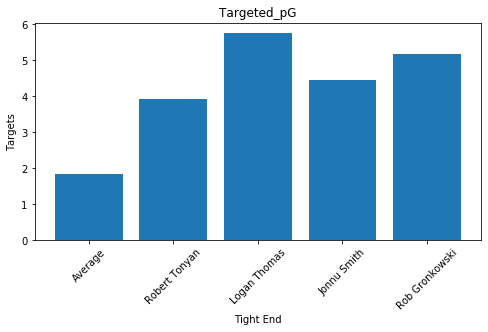

----------------------------------------
Defense

Avg Passing_Att_pG: 35.3
Detroit Lions Passing_Att_pG: 34.58
--------------------------------------------------
Avg Passing_Att_pG: 35.3
San Francisco 49ers Passing_Att_pG: 32.08
--------------------------------------------------
Avg Passing_Att_pG: 35.3
Jacksonville Jaguars Passing_Att_pG: 35.0
--------------------------------------------------
Avg Passing_Att_pG: 35.3
Minnesota Vikings Passing_Att_pG: 36.5
--------------------------------------------------


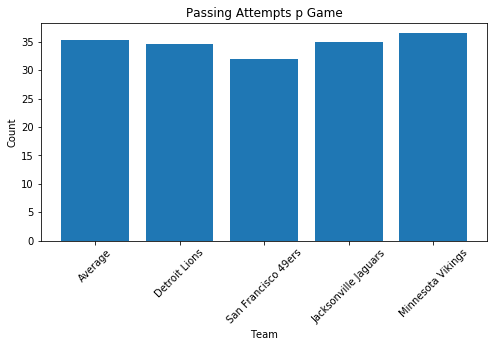

In [79]:
print('Tight Ends')
print('')
average, te_1, _1te = print_metric(available_te, 'Targeted_pG', te1)
average, te_2, _2te = print_metric(available_te, 'Targeted_pG', te2)
average, te_3, _3te = print_metric(available_te, 'Targeted_pG', te3)
average, te_4, _4te = print_metric(available_te, 'Targeted_pG', te4)

x = ['Average', te_1, te_2, te_3, te_4]
y = [average, _1te, _2te, _3te, _4te]

bar_plot(x, y, 'Targeted_pG', 'Tight End', 'Targets')

print('-'*40)
print('Defense')
print('')

average, te_team1, te_def1 = print_metric_team(defense, 'Passing_Att_pG', teamTE1)
average, te_team2, te_def2 = print_metric_team(defense, 'Passing_Att_pG', teamTE2)
average, te_team3, te_def3 = print_metric_team(defense, 'Passing_Att_pG', teamTE3)
average, te_team4, te_def4 = print_metric_team(defense, 'Passing_Att_pG', teamTE4)

x = ['Average', te_team1, te_team2, te_team3, te_team4]
y = [average, te_def1, te_def2, te_def3, te_def4]

bar_plot(x, y, 'Passing Attempts p Game', 'Team', 'Count')

Tight Ends

Avg Receptions_pG: 1.25
Robert Tonyan Receptions_pG: 3.42
--------------------------------------------------
Avg Receptions_pG: 1.25
Logan Thomas Receptions_pG: 3.58
--------------------------------------------------
Avg Receptions_pG: 1.25
Jonnu Smith Receptions_pG: 2.73
--------------------------------------------------
Avg Receptions_pG: 1.25
Rob Gronkowski Receptions_pG: 3.08
--------------------------------------------------


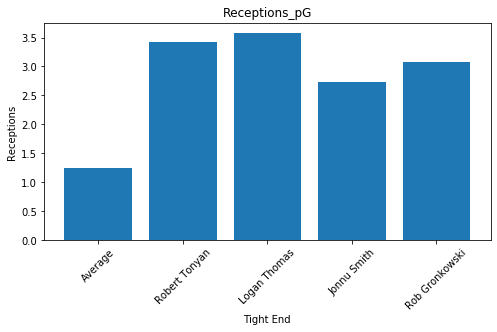

----------------------------------------
Defense

Avg Completions_pG: 23.09
Detroit Lions Completions_pG: 23.08
--------------------------------------------------
Avg Completions_pG: 23.09
San Francisco 49ers Completions_pG: 21.25
--------------------------------------------------
Avg Completions_pG: 23.09
Jacksonville Jaguars Completions_pG: 24.25
--------------------------------------------------
Avg Completions_pG: 23.09
Minnesota Vikings Completions_pG: 23.92
--------------------------------------------------


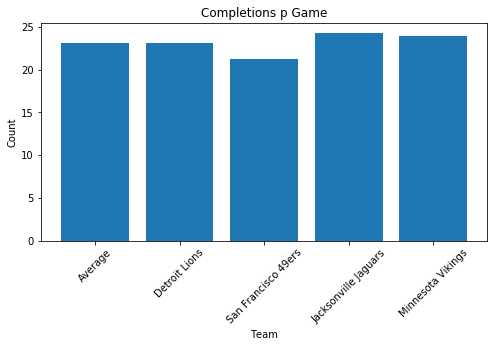

In [80]:
print('Tight Ends')
print('')
average, te_1, _1te = print_metric(available_te, 'Receptions_pG', te1)
average, te_2, _2te = print_metric(available_te, 'Receptions_pG', te2)
average, te_3, _3te = print_metric(available_te, 'Receptions_pG', te3)
average, te_4, _4te = print_metric(available_te, 'Receptions_pG', te4)

x = ['Average', te_1, te_2, te_3, te_4]
y = [average, _1te, _2te, _3te, _4te]

bar_plot(x, y, 'Receptions_pG', 'Tight End', 'Receptions')

print('-'*40)
print('Defense')
print('')

average, te_team1, te_def1 = print_metric_team(defense, 'Completions_pG', teamTE1)
average, te_team2, te_def2 = print_metric_team(defense, 'Completions_pG', teamTE2)
average, te_team3, te_def3 = print_metric_team(defense, 'Completions_pG', teamTE3)
average, te_team4, te_def4 = print_metric_team(defense, 'Completions_pG', teamTE4)

x = ['Average', te_team1, te_team2, te_team3, te_team4]
y = [average, te_def1, te_def2, te_def3, te_def4]

bar_plot(x, y, 'Completions p Game', 'Team', 'Count')

Tight Ends

Avg ReceivingYds_pG: 12.96
Robert Tonyan ReceivingYds_pG: 41.42
--------------------------------------------------
Avg ReceivingYds_pG: 12.96
Logan Thomas ReceivingYds_pG: 35.5
--------------------------------------------------
Avg ReceivingYds_pG: 12.96
Jonnu Smith ReceivingYds_pG: 30.73
--------------------------------------------------
Avg ReceivingYds_pG: 12.96
Rob Gronkowski ReceivingYds_pG: 42.08
--------------------------------------------------


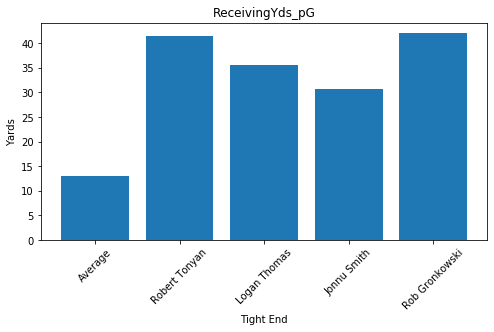

----------------------------------------
Defense

Avg Passing_Yds_pG: 241.11
Detroit Lions Passing_Yds_pG: 261.67
--------------------------------------------------
Avg Passing_Yds_pG: 241.11
San Francisco 49ers Passing_Yds_pG: 219.92
--------------------------------------------------
Avg Passing_Yds_pG: 241.11
Jacksonville Jaguars Passing_Yds_pG: 279.08
--------------------------------------------------
Avg Passing_Yds_pG: 241.11
Minnesota Vikings Passing_Yds_pG: 261.67
--------------------------------------------------


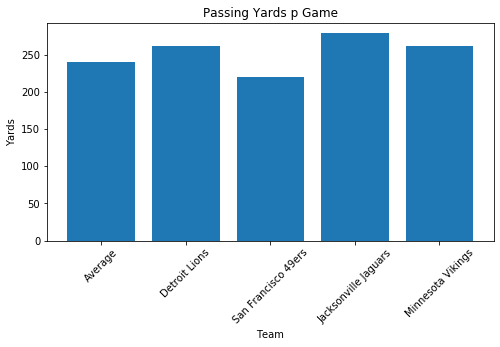

In [81]:
print('Tight Ends')
print('')
average, te_1, _1te = print_metric(available_te, 'ReceivingYds_pG', te1)
average, te_2, _2te = print_metric(available_te, 'ReceivingYds_pG', te2)
average, te_3, _3te = print_metric(available_te, 'ReceivingYds_pG', te3)
average, te_4, _4te = print_metric(available_te, 'ReceivingYds_pG', te4)

x = ['Average', te_1, te_2, te_3, te_4]
y = [average, _1te, _2te, _3te, _4te]

bar_plot(x, y, 'ReceivingYds_pG', 'Tight End', 'Yards')

print('-'*40)
print('Defense')
print('')

average, te_team1, te_def1 = print_metric_team(defense, 'Passing_Yds_pG', teamTE1)
average, te_team2, te_def2 = print_metric_team(defense, 'Passing_Yds_pG', teamTE2)
average, te_team3, te_def3 = print_metric_team(defense, 'Passing_Yds_pG', teamTE3)
average, te_team4, te_def4 = print_metric_team(defense, 'Passing_Yds_pG', teamTE4)


x = ['Average', te_team1, te_team2, te_team3, te_team4]
y = [average, te_def1, te_def2, te_def3, te_def4]

bar_plot(x, y, 'Passing Yards p Game', 'Team', 'Yards')

Tight Ends

Avg ReceivingTDs_pG: 0.13
Robert Tonyan ReceivingTDs_pG: 0.67
--------------------------------------------------
Avg ReceivingTDs_pG: 0.13
Logan Thomas ReceivingTDs_pG: 0.42
--------------------------------------------------
Avg ReceivingTDs_pG: 0.13
Jonnu Smith ReceivingTDs_pG: 0.64
--------------------------------------------------
Avg ReceivingTDs_pG: 0.13
Rob Gronkowski ReceivingTDs_pG: 0.33
--------------------------------------------------


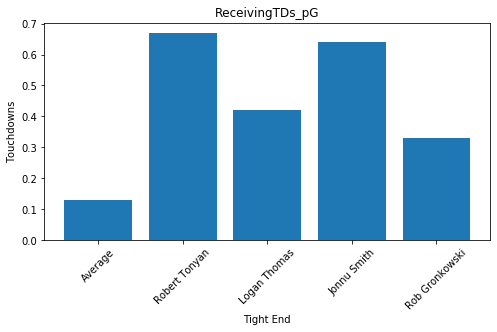

----------------------------------------
Defense

Avg Passing_TDs_pG: 1.7
Detroit Lions Passing_TDs_pG: 1.92
--------------------------------------------------
Avg Passing_TDs_pG: 1.7
San Francisco 49ers Passing_TDs_pG: 1.75
--------------------------------------------------
Avg Passing_TDs_pG: 1.7
Jacksonville Jaguars Passing_TDs_pG: 2.17
--------------------------------------------------
Avg Passing_TDs_pG: 1.7
Minnesota Vikings Passing_TDs_pG: 2.0
--------------------------------------------------


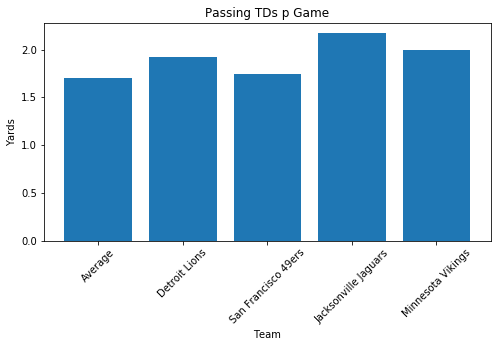

In [82]:
print('Tight Ends')
print('')
average, te_1, _1te = print_metric(available_te, 'ReceivingTDs_pG', te1)
average, te_2, _2te = print_metric(available_te, 'ReceivingTDs_pG', te2)
average, te_3, _3te = print_metric(available_te, 'ReceivingTDs_pG', te3)
average, te_4, _4te = print_metric(available_te, 'ReceivingTDs_pG', te4)

x = ['Average', te_1, te_2, te_3, te_4]
y = [average, _1te, _2te, _3te, _4te]

bar_plot(x, y, 'ReceivingTDs_pG', 'Tight End', 'Touchdowns')

print('-'*40)
print('Defense')
print('')

average, te_team1, te_def1 = print_metric_team(defense, 'Passing_TDs_pG', teamTE1)
average, te_team2, te_def2 = print_metric_team(defense, 'Passing_TDs_pG', teamTE2)
average, te_team3, te_def3 = print_metric_team(defense, 'Passing_TDs_pG', teamTE3)
average, te_team4, te_def4 = print_metric_team(defense, 'Passing_TDs_pG', teamTE4)

x = ['Average', te_team1, te_team2, te_team3, te_team4]
y = [average, te_def1, te_def2, te_def3, te_def4]

bar_plot(x, y, 'Passing TDs p Game', 'Team', 'Yards')



## Wide Receiver

In [83]:
wrs = offense[offense['Position'] == 'WR']

In [84]:
per_week_stats(wrs, 'Targeted', 'Games')
per_week_stats(wrs, 'Receptions', 'Games')
wrs['Catch_Rate'] = wrs['Receptions_pG']/wrs['Targeted_pG']
per_week_stats(wrs, 'ReceivingYds', 'Games')
per_week_stats(wrs, 'ReceivingTDs', 'Games')
per_week_stats(wrs, 'LostFumbles', 'Games')

In [85]:
wrs[wrs['Player'].isin(myteam_wrt)]

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,Week_10,Week_11,Week_12,Week_13,Targeted_pG,Receptions_pG,Catch_Rate,ReceivingYds_pG,ReceivingTDs_pG,LostFumbles_pG
28,DeAndre Hopkins,ARI,WR,28,12,12,0,0,0,0,0,0,0,0.00,0,116,85,1019,20.90,5,1,1,5,0,0,172.40,10,29,129.90,15.10,12.80,13.70,4.10,19.10,7.30,14.30,0.00,3.00,18.70,5.10,5.50,11.20,9.67,7.08,0.73,84.92,0.42,0.08
57,Tyler Boyd,CIN,WR,26,12,8,1,2,16,0,0,4,38,14.00,0,97,73,797,19.20,4,1,0,4,0,0,144.60,21,58,108.10,3.30,13.20,12.50,9.40,4.20,7.90,16.70,13.60,0.00,4.10,8.50,1.50,13.20,8.08,6.08,0.75,66.42,0.33,0.00
63,Corey Davis,TEN,WR,25,10,8,0,0,0,0,0,0,0,0.00,0,70,53,801,16.10,4,0,0,4,0,0,130.60,22,64,104.10,10.10,9.60,6.90,0.00,0.00,0.00,9.50,18.80,0.00,6.70,11.30,7.00,24.20,7.00,5.30,0.76,80.10,0.40,0.00
65,Robby Anderson,CAR,WR,27,12,12,0,0,0,0,0,1,3,3.00,0,102,75,912,13.60,2,1,1,2,1,0,141.00,24,66,103.60,19.50,8.90,5.50,9.90,11.50,7.70,7.40,4.80,6.30,2.10,4.60,15.40,0.00,8.50,6.25,0.74,76.00,0.17,0.08
73,Brandin Cooks,HOU,WR,27,12,12,0,0,0,0,0,0,0,0.00,0,86,57,784,20.50,3,0,0,3,0,0,124.90,29,74,96.40,2.00,9.50,2.30,0.00,22.10,12.80,6.00,0.00,14.30,3.90,8.50,8.50,6.50,7.17,4.75,0.66,65.33,0.25,0.00
99,Julio Jones,ATL,WR,31,9,9,0,0,0,0,0,0,0,0.00,0,68,51,771,16.20,3,0,0,3,0,0,120.60,31,,95.10,15.70,2.40,0.00,3.20,0.00,25.70,9.70,13.70,11.40,0.00,3.90,0.00,9.40,7.56,5.67,0.75,85.67,0.33,0.00


In [86]:
available_wrs = wrs[~wrs['Player'].isin(taken_wrt)]
available_wrs.head()

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,Week_10,Week_11,Week_12,Week_13,Targeted_pG,Receptions_pG,Catch_Rate,ReceivingYds_pG,ReceivingTDs_pG,LostFumbles_pG
28,DeAndre Hopkins,ARI,WR,28,12,12,0,0,0,0,0,0,0,0.00,0,116,85,1019,20.90,5,1,1,5,0,0,172.40,10,29,129.90,15.10,12.80,13.70,4.10,19.10,7.30,14.30,0.00,3.00,18.70,5.10,5.50,11.20,9.67,7.08,0.73,84.92,0.42,0.08
37,Chase Claypool,PIT,WR,22,12,3,0,0,0,0,0,9,22,6.40,2,78,47,649,21.10,8,3,1,10,0,0,148.60,14,38,125.10,4.70,14.80,2.40,0.00,35.60,14.10,0.20,8.20,7.30,17.30,11.90,5.20,3.80,6.50,3.92,0.60,54.08,0.67,0.08
56,Cole Beasley,BUF,WR,31,12,8,1,1,20,1,0,0,0,0.00,0,82,66,797,12.80,4,0,0,4,0,0,141.50,20,57,108.50,5.80,7.00,10.00,9.20,5.30,10.50,11.20,2.40,3.90,16.90,0.00,7.30,19.00,6.83,5.50,0.80,66.42,0.33,0.00
57,Tyler Boyd,CIN,WR,26,12,8,1,2,16,0,0,4,38,14.00,0,97,73,797,19.20,4,1,0,4,0,0,144.60,21,58,108.10,3.30,13.20,12.50,9.40,4.20,7.90,16.70,13.60,0.00,4.10,8.50,1.50,13.20,8.08,6.08,0.75,66.42,0.33,0.00
63,Corey Davis,TEN,WR,25,10,8,0,0,0,0,0,0,0,0.00,0,70,53,801,16.10,4,0,0,4,0,0,130.60,22,64,104.10,10.10,9.60,6.90,0.00,0.00,0.00,9.50,18.80,0.00,6.70,11.30,7.00,24.20,7.00,5.30,0.76,80.10,0.40,0.00


In [87]:
scaled_wrs = available_wrs[['Player', 'Team', 'Position', 'Games', 'GamesStarted', 'Targeted_pG', 'Receptions_pG', 
                            'Catch_Rate', 'ReceivingYds_pG', 'ReceivingTDs_pG', 'LostFumbles_pG']]

wr_columns = ['Targeted_pG', 'Receptions_pG', 'Catch_Rate', 'ReceivingYds_pG', 'ReceivingTDs_pG', 'LostFumbles_pG']

scale_data(scaled_wrs, wr_columns)

scaled_wrs.head()

,Player,Team,Position,Games,GamesStarted,Targeted_pG,Receptions_pG,Catch_Rate,ReceivingYds_pG,ReceivingTDs_pG,LostFumbles_pG
28,DeAndre Hopkins,ARI,WR,12,12,2.77,3.21,0.46,2.80,1.86,1.20
37,Chase Claypool,PIT,WR,12,3,1.41,1.19,-0.32,1.34,3.48,1.20
56,Cole Beasley,BUF,WR,12,8,1.56,2.20,0.88,1.92,1.32,-0.35
57,Tyler Boyd,CIN,WR,12,8,2.09,2.57,0.57,1.92,1.32,-0.35
63,Corey Davis,TEN,WR,10,8,1.63,2.07,0.60,2.57,1.75,-0.35


In [88]:
scaled_wrs['Combined_Score'] = (scaled_wrs['Targeted_pG'] + scaled_wrs['Receptions_pG'] + 
                                scaled_wrs['Catch_Rate'] + scaled_wrs['ReceivingYds_pG'] + 
                                scaled_wrs['ReceivingTDs_pG'] - scaled_wrs['LostFumbles_pG'])

scaled_wrs.sort_values('Combined_Score', ascending=False, inplace=True)
scaled_wrs.head(10)

,Player,Team,Position,Games,GamesStarted,Targeted_pG,Receptions_pG,Catch_Rate,ReceivingYds_pG,ReceivingTDs_pG,LostFumbles_pG,Combined_Score
28,DeAndre Hopkins,ARI,WR,12,12,2.77,3.21,0.46,2.80,1.86,1.20,9.89
99,Julio Jones,ATL,WR,9,9,1.87,2.31,0.56,2.83,1.32,-0.35,9.23
126,Jamison Crowder,NYJ,WR,8,5,2.06,1.88,-0.18,1.75,3.21,-0.35,9.07
63,Corey Davis,TEN,WR,10,8,1.63,2.07,0.60,2.57,1.75,-0.35,8.97
57,Tyler Boyd,CIN,WR,12,8,2.09,2.57,0.57,1.92,1.32,-0.35,8.83
56,Cole Beasley,BUF,WR,12,8,1.56,2.20,0.88,1.92,1.32,-0.35,8.23
97,Brandon Aiyuk,SFO,WR,9,8,1.72,1.52,-0.24,1.62,2.04,-0.35,7.02
203,Deebo Samuel,SFO,WR,6,4,1.77,2.20,0.56,1.86,0.25,-0.35,6.99
376,Chad Hansen,HOU,WR,1,0,1.63,1.88,0.35,3.56,-0.83,-0.35,6.93
65,Robby Anderson,CAR,WR,12,12,2.27,2.68,0.47,2.37,0.25,1.20,6.84


In [89]:
wr1 = 28
wr2 = 99
wr3 = 126
wr4 = 63
wr5 = 57
wr6 = 56
wr7 = 97
wr8 = 65

Week 13 Opponents:

    Arizona Cardinals vs Los Angeles Rams
    Atlanta Falcons vs New Orleans Saints
    Cincinnati Bengals vs Miami Dolphins
    New York Jets vs Las Vegas Raiders
    Green Bay Packers vs Philadelphia Eagles
    Tennessee Titans vs Cleveland Browns
    Buffalo Bills vs San Francisco 49ers
    San Francisco 49ers vs Buffalo Bills


In [83]:
wr_opp = ['Los Angeles Rams', 'New Orleans Saints', 'Miami Dolphins', 'Las Vegas Raiders', 'Philadelphia Eagles',
          'Cleveland Browns', 'San Francisco 49ers', 'Buffalo Bills']
defense[defense['Team'].isin(list(wr_opp))]

,Team,GP,Ttl_Pts_Allowed,Ttl_Offense_Plays_Allowed,Yds_p_Play,Ttl_Yds,Rushing_Att,Rushing_Yds,Rushing_Yds_p_Att,Rushing_TDs,Passing_Att,Passing_Yds_p_Att,Completions,Yds_p_Completion,Passing_Yds,Passing_TDs,RZ_Att,RZ_TD,RZ_Percent,Ttl_Turnovers,Interceptions,Fumbles,Sacks,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,Week_10,Week_11,Week_12,Ttl_Pts_Allowed_pG,Ttl_Yds_pG,Rushing_Att_pG,Rushing_Yds_pG,Rushing_TDs_pG,Passing_Att_pG,Completions_pG,Completion_Percent_Allowed,Passing_Yds_pG,Passing_TDs_pG,Ttl_TDs_pG,Ttl_Turnovers_pG,Fumbles_pG,Sacks_pG,TTL_pG
1,Miami Dolphins,11,205,710,5.70,4066,300,1429,4.80,13,385,6.40,240,11.90,2637,13,35,21,60.00,19,11,8,25,102.00,2.00,2.00,12.00,3.00,12.00,15.00,0.00,17.00,8.00,4.00,5.00,14.00,18.64,369.64,27.27,129.91,1.18,35.00,21.82,0.62,239.73,1.18,2.36,1.73,0.73,2.27,9.27
3,Los Angeles Rams,11,215,695,4.70,3264,265,1025,3.90,9,396,5.20,251,9.80,2239,11,30,19,63.30,18,11,7,34,91.00,4.00,7.00,4.00,11.00,12.00,0.00,15.00,5.00,0.00,13.00,5.00,15.00,19.55,296.73,24.09,93.18,0.82,36.00,22.82,0.63,203.55,1.00,1.82,1.64,0.64,3.09,8.27
4,New Orleans Saints,11,225,651,4.80,3134,255,843,3.30,5,363,5.80,226,11.10,2291,20,29,21,72.40,18,13,5,33,91.00,15.00,4.00,-3.00,4.00,3.00,0.00,1.00,7.00,16.00,14.00,16.00,14.00,20.45,284.91,23.18,76.64,0.45,33.00,20.55,0.62,208.27,1.82,2.27,1.64,0.45,3.00,8.27
10,San Francisco 49ers,11,254,664,5.20,3467,299,1196,4.00,8,345,6.20,223,10.70,2271,17,27,17,63.00,16,10,6,20,67.00,4.00,5.00,12.00,6.00,-2.00,3.00,17.00,-2.00,0.00,7.00,0.00,17.00,23.09,315.18,27.18,108.73,0.73,31.36,20.27,0.65,206.45,1.55,2.27,1.45,0.55,1.82,6.09
13,Philadelphia Eagles,11,277,740,5.00,3728,345,1410,4.10,16,359,5.90,239,10.70,2318,14,36,23,63.90,11,3,8,36,71.00,3.00,-1.00,8.00,18.00,-1.00,2.00,9.00,20.00,0.00,3.00,8.00,2.00,25.18,338.91,31.36,128.18,1.45,32.64,21.73,0.67,210.73,1.27,2.73,1.00,0.73,3.27,6.45
16,Buffalo Bills,11,282,719,5.70,4104,304,1426,4.70,16,385,6.50,257,11.10,2678,16,44,27,61.40,17,8,9,30,62.00,8.00,2.00,5.00,6.00,-4.00,3.00,14.00,4.00,12.00,6.00,0.00,6.00,25.64,373.09,27.64,129.64,1.45,35.00,23.36,0.67,243.45,1.45,2.91,1.55,0.82,2.73,5.64
19,Cleveland Browns,11,286,724,5.40,3904,287,1190,4.10,10,410,6.20,268,10.80,2714,22,44,26,59.10,17,9,8,27,73.00,0.00,4.00,14.00,5.00,13.00,1.00,7.00,3.00,0.00,6.00,20.00,0.00,26.00,354.91,26.09,108.18,0.91,37.27,24.36,0.65,246.73,2.00,2.91,1.55,0.73,2.45,6.64
27,Las Vegas Raiders,11,319,720,5.80,4162,287,1247,4.30,17,421,6.70,264,11.30,2915,18,46,30,65.20,12,9,3,12,31.00,0.00,2.00,3.00,0.00,4.00,0.00,-4.00,9.00,4.00,16.00,-2.00,-1.00,29.00,378.36,26.09,113.36,1.55,38.27,24.00,0.63,265.00,1.64,3.18,1.09,0.27,1.09,2.82


In [84]:
teamWR1 = 3
teamWR2 = 4
teamWR3 = 1
teamWR4 = 27
teamWR5 = 13
teamWR6 = 19
teamWR7 = 10
teamWR8 = 16

#### Wide Receiver Comparison

Wide Receivers

Avg Targeted_pG: 3.1
DeAndre Hopkins Targeted_pG: 9.36
--------------------------------------------------
Avg Targeted_pG: 3.1
Julio Jones Targeted_pG: 7.25
--------------------------------------------------
Avg Targeted_pG: 3.1
Tyler Boyd Targeted_pG: 8.45
--------------------------------------------------
Avg Targeted_pG: 3.1
Jamison Crowder Targeted_pG: 8.14
--------------------------------------------------
Avg Targeted_pG: 3.1
Allen Lazard Targeted_pG: 5.4
--------------------------------------------------
Avg Targeted_pG: 3.1
Corey Davis Targeted_pG: 6.44
--------------------------------------------------
Avg Targeted_pG: 3.1
Cole Beasley Targeted_pG: 6.45
--------------------------------------------------
Avg Targeted_pG: 3.1
Deebo Samuel Targeted_pG: 7.0
--------------------------------------------------


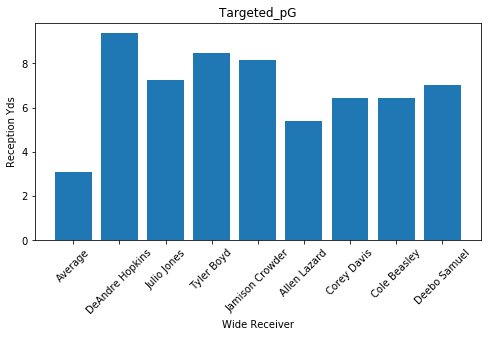

----------------------------------------
Defense

Avg Passing_Att_pG: 35.11
Los Angeles Rams Passing_Att_pG: 36.0
--------------------------------------------------
Avg Passing_Att_pG: 35.11
New Orleans Saints Passing_Att_pG: 33.0
--------------------------------------------------
Avg Passing_Att_pG: 35.11
Miami Dolphins Passing_Att_pG: 35.0
--------------------------------------------------
Avg Passing_Att_pG: 35.11
Las Vegas Raiders Passing_Att_pG: 38.27
--------------------------------------------------
Avg Passing_Att_pG: 35.11
Philadelphia Eagles Passing_Att_pG: 32.64
--------------------------------------------------
Avg Passing_Att_pG: 35.11
Cleveland Browns Passing_Att_pG: 37.27
--------------------------------------------------
Avg Passing_Att_pG: 35.11
San Francisco 49ers Passing_Att_pG: 31.36
--------------------------------------------------
Avg Passing_Att_pG: 35.11
Buffalo Bills Passing_Att_pG: 35.0
--------------------------------------------------


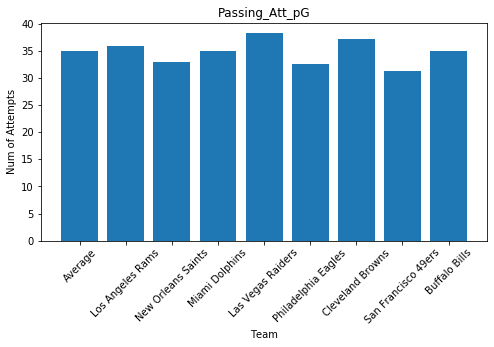

In [85]:
print('Wide Receivers')
print('')
average, wr_1, _1wr = print_metric(available_wrs, 'Targeted_pG', wr1)
average, wr_2, _2wr = print_metric(available_wrs, 'Targeted_pG', wr2)
average, wr_3, _3wr = print_metric(available_wrs, 'Targeted_pG', wr3)
average, wr_4, _4wr = print_metric(available_wrs, 'Targeted_pG', wr4)
average, wr_5, _5wr = print_metric(available_wrs, 'Targeted_pG', wr5)
average, wr_6, _6wr = print_metric(available_wrs, 'Targeted_pG', wr6)
average, wr_7, _7wr = print_metric(available_wrs, 'Targeted_pG', wr7)
average, wr_8, _8wr = print_metric(available_wrs, 'Targeted_pG', wr8)

x = ['Average', wr_1, wr_2, wr_3, wr_4, wr_5, wr_6, wr_7, wr_8]
y = [average, _1wr, _2wr, _3wr, _4wr, _5wr, _6wr, _7wr, _8wr]

bar_plot(x, y, 'Targeted_pG', 'Wide Receiver', 'Reception Yds')

print('-'*40)
print('Defense')
print('')

average, wr_team1, wr_def1 = print_metric_team(defense, 'Passing_Att_pG', teamWR1)
average, wr_team2, wr_def2 = print_metric_team(defense, 'Passing_Att_pG', teamWR2)
average, wr_team3, wr_def3 = print_metric_team(defense, 'Passing_Att_pG', teamWR3)
average, wr_team4, wr_def4 = print_metric_team(defense, 'Passing_Att_pG', teamWR4)
average, wr_team5, wr_def5 = print_metric_team(defense, 'Passing_Att_pG', teamWR5)
average, wr_team6, wr_def6 = print_metric_team(defense, 'Passing_Att_pG', teamWR6)
average, wr_team7, wr_def7 = print_metric_team(defense, 'Passing_Att_pG', teamWR7)
average, wr_team8, wr_def8 = print_metric_team(defense, 'Passing_Att_pG', teamWR8)

x = ['Average', wr_team1, wr_team2, wr_team3, wr_team4, wr_team5, wr_team6, wr_team7, wr_team8]
y = [average, wr_def1, wr_def2, wr_def3, wr_def4, wr_def5, wr_def6, wr_def7, wr_def8]

bar_plot(x, y, 'Passing_Att_pG', 'Team', 'Num of Attempts')

Wide Receivers

Avg Receptions_pG: 2.0
DeAndre Hopkins Receptions_pG: 7.0
--------------------------------------------------
Avg Receptions_pG: 2.0
Julio Jones Receptions_pG: 5.62
--------------------------------------------------
Avg Receptions_pG: 2.0
Tyler Boyd Receptions_pG: 6.55
--------------------------------------------------
Avg Receptions_pG: 2.0
Jamison Crowder Receptions_pG: 5.0
--------------------------------------------------
Avg Receptions_pG: 2.0
Allen Lazard Receptions_pG: 3.8
--------------------------------------------------
Avg Receptions_pG: 2.0
Corey Davis Receptions_pG: 4.67
--------------------------------------------------
Avg Receptions_pG: 2.0
Cole Beasley Receptions_pG: 5.18
--------------------------------------------------
Avg Receptions_pG: 2.0
Deebo Samuel Receptions_pG: 5.4
--------------------------------------------------


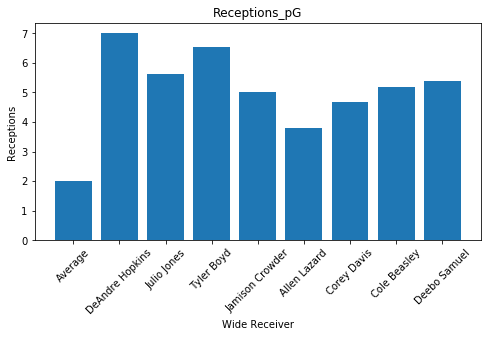

----------------------------------------
Defense

Avg Completions_pG: 22.97
Los Angeles Rams Completions_pG: 22.82
--------------------------------------------------
Avg Completions_pG: 22.97
New Orleans Saints Completions_pG: 20.55
--------------------------------------------------
Avg Completions_pG: 22.97
Miami Dolphins Completions_pG: 21.82
--------------------------------------------------
Avg Completions_pG: 22.97
Las Vegas Raiders Completions_pG: 24.0
--------------------------------------------------
Avg Completions_pG: 22.97
Philadelphia Eagles Completions_pG: 21.73
--------------------------------------------------
Avg Completions_pG: 22.97
Cleveland Browns Completions_pG: 24.36
--------------------------------------------------
Avg Completions_pG: 22.97
San Francisco 49ers Completions_pG: 20.27
--------------------------------------------------
Avg Completions_pG: 22.97
Buffalo Bills Completions_pG: 23.36
--------------------------------------------------


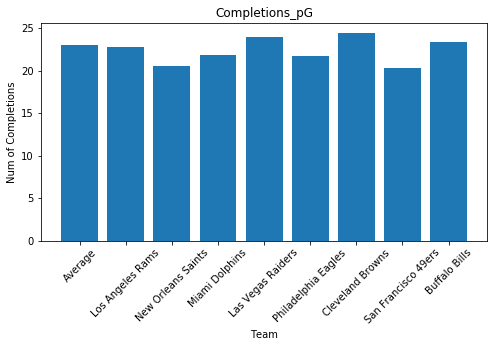

In [86]:
print('Wide Receivers')
print('')
average, wr_1, _1wr = print_metric(available_wrs, 'Receptions_pG', wr1)
average, wr_2, _2wr = print_metric(available_wrs, 'Receptions_pG', wr2)
average, wr_3, _3wr = print_metric(available_wrs, 'Receptions_pG', wr3)
average, wr_4, _4wr = print_metric(available_wrs, 'Receptions_pG', wr4)
average, wr_5, _5wr = print_metric(available_wrs, 'Receptions_pG', wr5)
average, wr_6, _6wr = print_metric(available_wrs, 'Receptions_pG', wr6)
average, wr_7, _7wr = print_metric(available_wrs, 'Receptions_pG', wr7)
average, wr_8, _8wr = print_metric(available_wrs, 'Receptions_pG', wr8)

x = ['Average', wr_1, wr_2, wr_3, wr_4, wr_5, wr_6, wr_7, wr_8]
y = [average, _1wr, _2wr, _3wr, _4wr, _5wr, _6wr, _7wr, _8wr]

bar_plot(x, y, 'Receptions_pG', 'Wide Receiver', 'Receptions')

print('-'*40)
print('Defense')
print('')

average, wr_team1, wr_def1 = print_metric_team(defense, 'Completions_pG', teamWR1)
average, wr_team2, wr_def2 = print_metric_team(defense, 'Completions_pG', teamWR2)
average, wr_team3, wr_def3 = print_metric_team(defense, 'Completions_pG', teamWR3)
average, wr_team4, wr_def4 = print_metric_team(defense, 'Completions_pG', teamWR4)
average, wr_team5, wr_def5 = print_metric_team(defense, 'Completions_pG', teamWR5)
average, wr_team6, wr_def6 = print_metric_team(defense, 'Completions_pG', teamWR6)
average, wr_team7, wr_def7 = print_metric_team(defense, 'Completions_pG', teamWR7)
average, wr_team8, wr_def8 = print_metric_team(defense, 'Completions_pG', teamWR8)

x = ['Average', wr_team1, wr_team2, wr_team3, wr_team4, wr_team5, wr_team6, wr_team7, wr_team8]
y = [average, wr_def1, wr_def2, wr_def3, wr_def4, wr_def5, wr_def6, wr_def7, wr_def8]

bar_plot(x, y, 'Completions_pG', 'Team', 'Num of Completions')

Wide Receivers

Avg Catch_Rate: 0.66
DeAndre Hopkins Catch_Rate: 0.75
--------------------------------------------------
Avg Catch_Rate: 0.66
Julio Jones Catch_Rate: 0.78
--------------------------------------------------
Avg Catch_Rate: 0.66
Tyler Boyd Catch_Rate: 0.77
--------------------------------------------------
Avg Catch_Rate: 0.66
Jamison Crowder Catch_Rate: 0.61
--------------------------------------------------
Avg Catch_Rate: 0.66
Allen Lazard Catch_Rate: 0.7
--------------------------------------------------
Avg Catch_Rate: 0.66
Corey Davis Catch_Rate: 0.72
--------------------------------------------------
Avg Catch_Rate: 0.66
Cole Beasley Catch_Rate: 0.8
--------------------------------------------------
Avg Catch_Rate: 0.66
Deebo Samuel Catch_Rate: 0.77
--------------------------------------------------


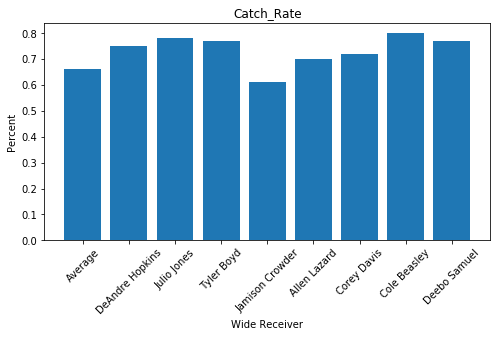

----------------------------------------
Defense

Avg Completion_Percent_Allowed: 0.65
Los Angeles Rams Completion_Percent_Allowed: 0.63
--------------------------------------------------
Avg Completion_Percent_Allowed: 0.65
New Orleans Saints Completion_Percent_Allowed: 0.62
--------------------------------------------------
Avg Completion_Percent_Allowed: 0.65
Miami Dolphins Completion_Percent_Allowed: 0.62
--------------------------------------------------
Avg Completion_Percent_Allowed: 0.65
Las Vegas Raiders Completion_Percent_Allowed: 0.63
--------------------------------------------------
Avg Completion_Percent_Allowed: 0.65
Philadelphia Eagles Completion_Percent_Allowed: 0.67
--------------------------------------------------
Avg Completion_Percent_Allowed: 0.65
Cleveland Browns Completion_Percent_Allowed: 0.65
--------------------------------------------------
Avg Completion_Percent_Allowed: 0.65
San Francisco 49ers Completion_Percent_Allowed: 0.65
----------------------------

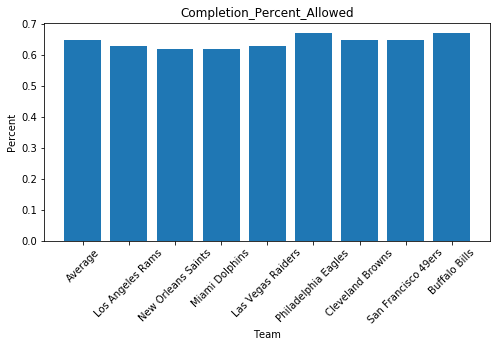

In [87]:
print('Wide Receivers')
print('')
average, wr_1, _1wr = print_metric(available_wrs, 'Catch_Rate', wr1)
average, wr_2, _2wr = print_metric(available_wrs, 'Catch_Rate', wr2)
average, wr_3, _3wr = print_metric(available_wrs, 'Catch_Rate', wr3)
average, wr_4, _4wr = print_metric(available_wrs, 'Catch_Rate', wr4)
average, wr_5, _5wr = print_metric(available_wrs, 'Catch_Rate', wr5)
average, wr_6, _6wr = print_metric(available_wrs, 'Catch_Rate', wr6)
average, wr_7, _7wr = print_metric(available_wrs, 'Catch_Rate', wr7)
average, wr_8, _8wr = print_metric(available_wrs, 'Catch_Rate', wr8)

x = ['Average', wr_1, wr_2, wr_3, wr_4, wr_5, wr_6, wr_7, wr_8]
y = [average, _1wr, _2wr, _3wr, _4wr, _5wr, _6wr, _7wr, _8wr]

bar_plot(x, y, 'Catch_Rate', 'Wide Receiver', 'Percent')

print('-'*40)
print('Defense')
print('')

average, wr_team1, wr_def1 = print_metric_team(defense, 'Completion_Percent_Allowed', teamWR1)
average, wr_team2, wr_def2 = print_metric_team(defense, 'Completion_Percent_Allowed', teamWR2)
average, wr_team3, wr_def3 = print_metric_team(defense, 'Completion_Percent_Allowed', teamWR3)
average, wr_team4, wr_def4 = print_metric_team(defense, 'Completion_Percent_Allowed', teamWR4)
average, wr_team5, wr_def5 = print_metric_team(defense, 'Completion_Percent_Allowed', teamWR5)
average, wr_team6, wr_def6 = print_metric_team(defense, 'Completion_Percent_Allowed', teamWR6)
average, wr_team7, wr_def7 = print_metric_team(defense, 'Completion_Percent_Allowed', teamWR7)
average, wr_team8, wr_def8 = print_metric_team(defense, 'Completion_Percent_Allowed', teamWR8)

x = ['Average', wr_team1, wr_team2, wr_team3, wr_team4, wr_team5, wr_team6, wr_team7, wr_team8]
y = [average, wr_def1, wr_def2, wr_def3, wr_def4, wr_def5, wr_def6, wr_def7, wr_def8]

bar_plot(x, y, 'Completion_Percent_Allowed', 'Team', 'Percent')

Wide Receivers

Avg ReceivingYds_pG: 24.7
DeAndre Hopkins ReceivingYds_pG: 87.91
--------------------------------------------------
Avg ReceivingYds_pG: 24.7
Julio Jones ReceivingYds_pG: 84.62
--------------------------------------------------
Avg ReceivingYds_pG: 24.7
Tyler Boyd ReceivingYds_pG: 65.91
--------------------------------------------------
Avg ReceivingYds_pG: 24.7
Jamison Crowder ReceivingYds_pG: 65.14
--------------------------------------------------
Avg ReceivingYds_pG: 24.7
Allen Lazard ReceivingYds_pG: 59.0
--------------------------------------------------
Avg ReceivingYds_pG: 24.7
Corey Davis ReceivingYds_pG: 68.78
--------------------------------------------------
Avg ReceivingYds_pG: 24.7
Cole Beasley ReceivingYds_pG: 60.64
--------------------------------------------------
Avg ReceivingYds_pG: 24.7
Deebo Samuel ReceivingYds_pG: 63.6
--------------------------------------------------


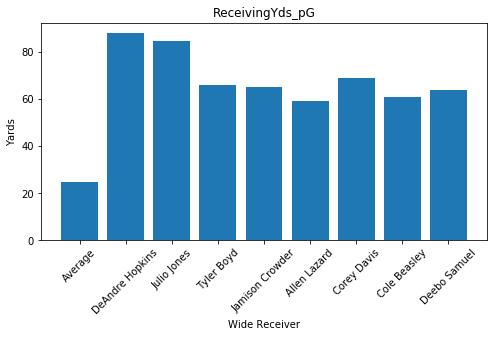

----------------------------------------
Defense

Avg Passing_Yds_pG: 239.97
Los Angeles Rams Passing_Yds_pG: 203.55
--------------------------------------------------
Avg Passing_Yds_pG: 239.97
New Orleans Saints Passing_Yds_pG: 208.27
--------------------------------------------------
Avg Passing_Yds_pG: 239.97
Miami Dolphins Passing_Yds_pG: 239.73
--------------------------------------------------
Avg Passing_Yds_pG: 239.97
Las Vegas Raiders Passing_Yds_pG: 265.0
--------------------------------------------------
Avg Passing_Yds_pG: 239.97
Philadelphia Eagles Passing_Yds_pG: 210.73
--------------------------------------------------
Avg Passing_Yds_pG: 239.97
Cleveland Browns Passing_Yds_pG: 246.73
--------------------------------------------------
Avg Passing_Yds_pG: 239.97
San Francisco 49ers Passing_Yds_pG: 206.45
--------------------------------------------------
Avg Passing_Yds_pG: 239.97
Buffalo Bills Passing_Yds_pG: 243.45
--------------------------------------------------


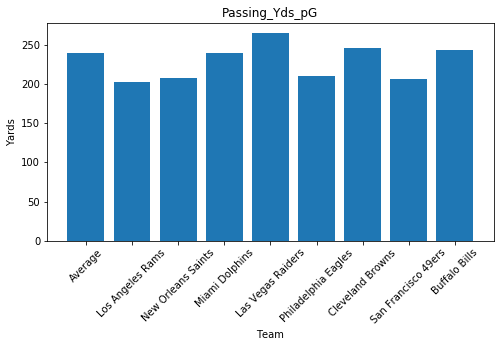

In [88]:
print('Wide Receivers')
print('')
average, wr_1, _1wr = print_metric(available_wrs, 'ReceivingYds_pG', wr1)
average, wr_2, _2wr = print_metric(available_wrs, 'ReceivingYds_pG', wr2)
average, wr_3, _3wr = print_metric(available_wrs, 'ReceivingYds_pG', wr3)
average, wr_4, _4wr = print_metric(available_wrs, 'ReceivingYds_pG', wr4)
average, wr_5, _5wr = print_metric(available_wrs, 'ReceivingYds_pG', wr5)
average, wr_6, _6wr = print_metric(available_wrs, 'ReceivingYds_pG', wr6)
average, wr_7, _7wr = print_metric(available_wrs, 'ReceivingYds_pG', wr7)
average, wr_8, _8wr = print_metric(available_wrs, 'ReceivingYds_pG', wr8)

x = ['Average', wr_1, wr_2, wr_3, wr_4, wr_5, wr_6, wr_7, wr_8]
y = [average, _1wr, _2wr, _3wr, _4wr, _5wr, _6wr, _7wr, _8wr]

bar_plot(x, y, 'ReceivingYds_pG', 'Wide Receiver', 'Yards')

print('-'*40)
print('Defense')
print('')

average, wr_team1, wr_def1 = print_metric_team(defense, 'Passing_Yds_pG', teamWR1)
average, wr_team2, wr_def2 = print_metric_team(defense, 'Passing_Yds_pG', teamWR2)
average, wr_team3, wr_def3 = print_metric_team(defense, 'Passing_Yds_pG', teamWR3)
average, wr_team4, wr_def4 = print_metric_team(defense, 'Passing_Yds_pG', teamWR4)
average, wr_team5, wr_def5 = print_metric_team(defense, 'Passing_Yds_pG', teamWR5)
average, wr_team6, wr_def6 = print_metric_team(defense, 'Passing_Yds_pG', teamWR6)
average, wr_team7, wr_def7 = print_metric_team(defense, 'Passing_Yds_pG', teamWR7)
average, wr_team8, wr_def8 = print_metric_team(defense, 'Passing_Yds_pG', teamWR8)

x = ['Average', wr_team1, wr_team2, wr_team3, wr_team4, wr_team5, wr_team6, wr_team7, wr_team8]
y = [average, wr_def1, wr_def2, wr_def3, wr_def4, wr_def5, wr_def6, wr_def7, wr_def8]

bar_plot(x, y, 'Passing_Yds_pG', 'Team', 'Yards')

Wide Receivers

Avg ReceivingTDs_pG: 0.12
DeAndre Hopkins ReceivingTDs_pG: 0.36
--------------------------------------------------
Avg ReceivingTDs_pG: 0.12
Julio Jones ReceivingTDs_pG: 0.38
--------------------------------------------------
Avg ReceivingTDs_pG: 0.12
Tyler Boyd ReceivingTDs_pG: 0.27
--------------------------------------------------
Avg ReceivingTDs_pG: 0.12
Jamison Crowder ReceivingTDs_pG: 0.43
--------------------------------------------------
Avg ReceivingTDs_pG: 0.12
Allen Lazard ReceivingTDs_pG: 0.6
--------------------------------------------------
Avg ReceivingTDs_pG: 0.12
Corey Davis ReceivingTDs_pG: 0.33
--------------------------------------------------
Avg ReceivingTDs_pG: 0.12
Cole Beasley ReceivingTDs_pG: 0.27
--------------------------------------------------
Avg ReceivingTDs_pG: 0.12
Deebo Samuel ReceivingTDs_pG: 0.2
--------------------------------------------------


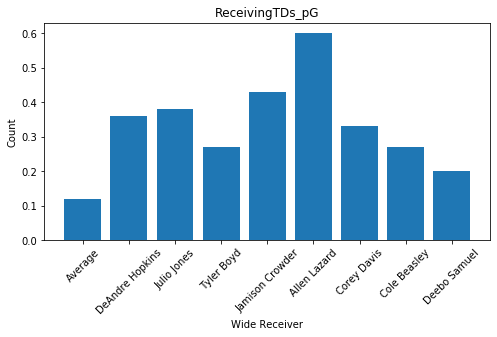

----------------------------------------
Defense

Avg Passing_TDs_pG: 1.69
Los Angeles Rams Passing_TDs_pG: 1.0
--------------------------------------------------
Avg Passing_TDs_pG: 1.69
New Orleans Saints Passing_TDs_pG: 1.82
--------------------------------------------------
Avg Passing_TDs_pG: 1.69
Miami Dolphins Passing_TDs_pG: 1.18
--------------------------------------------------
Avg Passing_TDs_pG: 1.69
Las Vegas Raiders Passing_TDs_pG: 1.64
--------------------------------------------------
Avg Passing_TDs_pG: 1.69
Philadelphia Eagles Passing_TDs_pG: 1.27
--------------------------------------------------
Avg Passing_TDs_pG: 1.69
Cleveland Browns Passing_TDs_pG: 2.0
--------------------------------------------------
Avg Passing_TDs_pG: 1.69
San Francisco 49ers Passing_TDs_pG: 1.55
--------------------------------------------------
Avg Passing_TDs_pG: 1.69
Buffalo Bills Passing_TDs_pG: 1.45
--------------------------------------------------


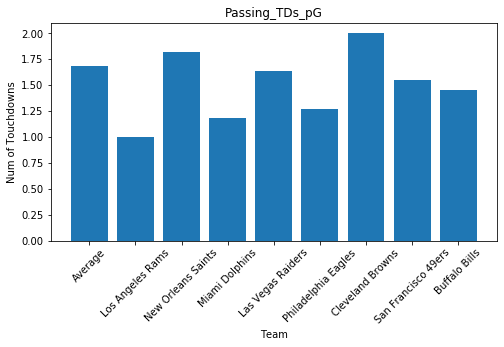

In [89]:
print('Wide Receivers')
print('')
average, wr_1, _1wr = print_metric(available_wrs, 'ReceivingTDs_pG', wr1)
average, wr_2, _2wr = print_metric(available_wrs, 'ReceivingTDs_pG', wr2)
average, wr_3, _3wr = print_metric(available_wrs, 'ReceivingTDs_pG', wr3)
average, wr_4, _4wr = print_metric(available_wrs, 'ReceivingTDs_pG', wr4)
average, wr_5, _5wr = print_metric(available_wrs, 'ReceivingTDs_pG', wr5)
average, wr_6, _6wr = print_metric(available_wrs, 'ReceivingTDs_pG', wr6)
average, wr_7, _7wr = print_metric(available_wrs, 'ReceivingTDs_pG', wr7)
average, wr_8, _8wr = print_metric(available_wrs, 'ReceivingTDs_pG', wr8)

x = ['Average', wr_1, wr_2, wr_3, wr_4, wr_5, wr_6, wr_7, wr_8]
y = [average, _1wr, _2wr, _3wr, _4wr, _5wr, _6wr, _7wr, _8wr]

bar_plot(x, y, 'ReceivingTDs_pG', 'Wide Receiver', 'Count')

print('-'*40)
print('Defense')
print('')

average, wr_team1, wr_def1 = print_metric_team(defense, 'Passing_TDs_pG', teamWR1)
average, wr_team2, wr_def2 = print_metric_team(defense, 'Passing_TDs_pG', teamWR2)
average, wr_team3, wr_def3 = print_metric_team(defense, 'Passing_TDs_pG', teamWR3)
average, wr_team4, wr_def4 = print_metric_team(defense, 'Passing_TDs_pG', teamWR4)
average, wr_team5, wr_def5 = print_metric_team(defense, 'Passing_TDs_pG', teamWR5)
average, wr_team6, wr_def6 = print_metric_team(defense, 'Passing_TDs_pG', teamWR6)
average, wr_team7, wr_def7 = print_metric_team(defense, 'Passing_TDs_pG', teamWR7)
average, wr_team8, wr_def8 = print_metric_team(defense, 'Passing_TDs_pG', teamWR8)

x = ['Average', wr_team1, wr_team2, wr_team3, wr_team4, wr_team5, wr_team6, wr_team7, wr_team8]
y = [average, wr_def1, wr_def2, wr_def3, wr_def4, wr_def5, wr_def6, wr_def7, wr_def8]

bar_plot(x, y, 'Passing_TDs_pG', 'Team', 'Num of Touchdowns')

#### Additional Defense Stats

Avg Ttl_Pts_Allowed_pG: 24.78
Los Angeles Rams Ttl_Pts_Allowed_pG: 19.55
--------------------------------------------------
Avg Ttl_Pts_Allowed_pG: 24.78
New Orleans Saints Ttl_Pts_Allowed_pG: 20.45
--------------------------------------------------
Avg Ttl_Pts_Allowed_pG: 24.78
Miami Dolphins Ttl_Pts_Allowed_pG: 18.64
--------------------------------------------------
Avg Ttl_Pts_Allowed_pG: 24.78
Las Vegas Raiders Ttl_Pts_Allowed_pG: 29.0
--------------------------------------------------
Avg Ttl_Pts_Allowed_pG: 24.78
Philadelphia Eagles Ttl_Pts_Allowed_pG: 25.18
--------------------------------------------------
Avg Ttl_Pts_Allowed_pG: 24.78
Cleveland Browns Ttl_Pts_Allowed_pG: 26.0
--------------------------------------------------
Avg Ttl_Pts_Allowed_pG: 24.78
San Francisco 49ers Ttl_Pts_Allowed_pG: 23.09
--------------------------------------------------
Avg Ttl_Pts_Allowed_pG: 24.78
Buffalo Bills Ttl_Pts_Allowed_pG: 25.64
--------------------------------------------------


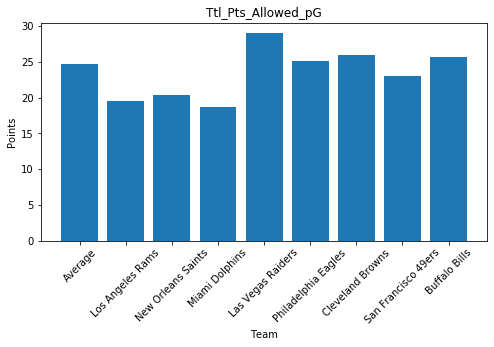

In [90]:
average, wr_team1, wr_def1 = print_metric_team(defense, 'Ttl_Pts_Allowed_pG', teamWR1)
average, wr_team2, wr_def2 = print_metric_team(defense, 'Ttl_Pts_Allowed_pG', teamWR2)
average, wr_team3, wr_def3 = print_metric_team(defense, 'Ttl_Pts_Allowed_pG', teamWR3)
average, wr_team4, wr_def4 = print_metric_team(defense, 'Ttl_Pts_Allowed_pG', teamWR4)
average, wr_team5, wr_def5 = print_metric_team(defense, 'Ttl_Pts_Allowed_pG', teamWR5)
average, wr_team6, wr_def6 = print_metric_team(defense, 'Ttl_Pts_Allowed_pG', teamWR6)
average, wr_team7, wr_def7 = print_metric_team(defense, 'Ttl_Pts_Allowed_pG', teamWR7)
average, wr_team8, wr_def8 = print_metric_team(defense, 'Ttl_Pts_Allowed_pG', teamWR8)

x = ['Average', wr_team1, wr_team2, wr_team3, wr_team4, wr_team5, wr_team6, wr_team7, wr_team8]
y = [average, wr_def1, wr_def2, wr_def3, wr_def4, wr_def5, wr_def6, wr_def7, wr_def8]

bar_plot(x, y, 'Ttl_Pts_Allowed_pG', 'Team', 'Points')




## Defense

In [91]:
ttl_offense = offense[['Team', 'CompletedPasses', 'PassesAttempted', 'PassingYds', 'PassingTDs', 'Interceptions', 
              'RushingAttempts', 'RushingYds', 'RushingTDs', 'Targeted', 'Receptions', 'ReceivingYds', 
              'ReceivingTDs', 'Fumbles', 'LostFumbles', 'TtlTDs', 'FDFantasyPts']]

ttl_offense = ttl_offense.groupby('Team').sum()

In [92]:
ttl_offense.head()

,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingTDs,Targeted,Receptions,ReceivingYds,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,FDFantasyPts
Team,,,,,,,,,,,,,,,,
2TM,0,0,0,0,0,125,485,2,66,49,318,2,2,1,4,130.20
ARI,264,387,2814,19,9,340,1715,18,366,263,2811,18,11,4,36,971.70
ATL,277,428,3163,17,8,305,1136,12,413,277,3163,17,6,2,29,929.70
BAL,185,296,2067,16,8,354,1734,12,286,186,2082,16,12,6,29,779.30
BUF,272,395,3082,24,8,277,1148,10,379,272,3082,24,9,8,34,958.30


In [93]:
ttl_offense.reset_index(inplace=True)

In [94]:
team_names = pd.read_pickle('long_names')
ttl_offense = pd.merge(ttl_offense, team_names, on = 'Team')

In [95]:
num_games = defense[['Team', 'GP']]
num_games.head(3)

,Team,GP
0,Pittsburgh Steelers,11
1,Miami Dolphins,11
2,Baltimore Ravens,11


In [96]:
ttl_offense = pd.merge(ttl_offense, num_games, left_on = 'Long_Name', right_on = 'Team')
ttl_offense.drop(columns=['Team_y'], inplace = True)
ttl_offense.rename(columns = {'Team_x': 'Team'}, inplace = True)
ttl_offense = ttl_offense[['Team', 'Long_Name', 'GP', 'CompletedPasses', 'PassesAttempted', 'PassingYds', 
                           'PassingTDs', 'Interceptions', 'RushingAttempts', 'RushingYds', 'RushingTDs', 'Targeted', 
                           'Receptions', 'ReceivingYds', 'ReceivingTDs', 'Fumbles', 'LostFumbles', 'TtlTDs', 
                           'FDFantasyPts']]

ttl_offense['Ttl_Turnovers'] = ttl_offense['Interceptions'] + ttl_offense['LostFumbles']
ttl_offense.head()

,Team,Long_Name,GP,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingTDs,Targeted,Receptions,ReceivingYds,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,FDFantasyPts,Ttl_Turnovers
0,ARI,Arizona Cardinals,11,264,387,2814,19,9,340,1715,18,366,263,2811,18,11,4,36,971.70,13
1,ATL,Atlanta Falcons,11,277,428,3163,17,8,305,1136,12,413,277,3163,17,6,2,29,929.70,10
2,BAL,Baltimore Ravens,11,185,296,2067,16,8,354,1734,12,286,186,2082,16,12,6,29,779.30,14
3,BUF,Buffalo Bills,11,272,395,3082,24,8,277,1148,10,379,272,3082,24,9,8,34,958.30,16
4,CAR,Carolina Panthers,12,284,409,3092,15,10,300,1246,13,390,285,3120,15,7,3,28,918.80,13


In [97]:
per_week_stats(ttl_offense, 'CompletedPasses', 'GP')
per_week_stats(ttl_offense, 'PassesAttempted', 'GP')
ttl_offense['Completion_Percent'] = ttl_offense['CompletedPasses_pG']/ttl_offense['PassesAttempted_pG']
per_week_stats(ttl_offense, 'PassingYds', 'GP')
ttl_offense['PassYds_pAtt'] = ttl_offense['PassingYds_pG']/ttl_offense['PassesAttempted_pG']
per_week_stats(ttl_offense, 'RushingAttempts', 'GP')
per_week_stats(ttl_offense, 'RushingYds', 'GP')
ttl_offense['RushYds_pAtt'] = ttl_offense['RushingYds_pG']/ttl_offense['RushingAttempts_pG']
ttl_offense['Ttl_Yds'] = ttl_offense['PassingYds_pG'] + ttl_offense['RushingYds_pG']
per_week_stats(ttl_offense, 'Ttl_Turnovers', 'GP')
per_week_stats(ttl_offense, 'TtlTDs', 'GP')

In [99]:
taken_def = ['Baltimore Ravens', 'Indianapolis Colts', 'Kansas City Chiefs',  'Los Angeles Rams', 'Miami Dolphins', 
             'Minnesota Vikings', 'New England Patriots', 'New Orleans Saints', 'Pittsburgh Steelers',
             'San Francisco 49ers']


In [100]:
taken_off = ['Dallas Cowboys', 'Houston Texans', 'Denver Broncos', 'Arizona Cardinals', 'Cincinnati Bengals', 
             'Jacksonville Jaguars', 'Los Angeles Chargers', 'Atlanta Falcons', 'Washington Football Team', 
             'Buffalo Bills']


In [101]:
available_def = defense[~defense['Team'].isin(taken_def)]
available_def.head()

,Team,GP,Ttl_Pts_Allowed,Ttl_Offense_Plays_Allowed,Yds_p_Play,Ttl_Yds,Rushing_Att,Rushing_Yds,Rushing_Yds_p_Att,Rushing_TDs,Passing_Att,Passing_Yds_p_Att,Completions,Yds_p_Completion,Passing_Yds,Passing_TDs,RZ_Att,RZ_TD,RZ_Percent,Ttl_Turnovers,Interceptions,Fumbles,Sacks,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,Week_10,Week_11,Week_12,Ttl_Pts_Allowed_pG,Ttl_Yds_pG,Rushing_Att_pG,Rushing_Yds_pG,Rushing_TDs_pG,Passing_Att_pG,Completions_pG,Completion_Percent_Allowed,Passing_Yds_pG,Passing_TDs_pG,Ttl_TDs_pG,Ttl_Turnovers_pG,Fumbles_pG,Sacks_pG,TTL_pG
6,Washington Football Team,11,243,676,5.00,3405,297,1264,4.30,9,343,5.60,222,10.80,2141,16,31,15,48.40,13,10,3,36,79.00,15.00,4.00,1.00,4.00,2.00,4.00,17.00,0.00,5.00,0.00,12.00,15.00,22.09,309.55,27.00,114.91,0.82,31.18,20.18,0.65,194.64,1.45,2.27,1.18,0.27,3.27,7.18
7,Chicago Bears,11,250,726,5.20,3794,326,1333,4.10,7,379,6.20,235,11.00,2461,16,39,19,48.70,11,6,5,21,60.00,3.00,12.00,4.00,2.00,6.00,11.00,9.00,1.00,4.00,12.00,0.00,-4.00,22.73,344.91,29.64,121.18,0.64,34.45,21.36,0.62,223.73,1.45,2.09,1.00,0.45,1.91,5.45
9,New York Giants,11,253,688,5.40,3741,270,1049,3.90,10,391,6.40,264,11.00,2692,16,38,21,55.30,18,9,9,27,76.00,4.00,9.00,-2.00,5.00,11.00,14.00,5.00,4.00,13.00,4.00,0.00,9.00,23.00,340.09,24.55,95.36,0.91,35.55,24.00,0.68,244.73,1.45,2.36,1.64,0.82,2.45,6.91
12,Arizona Cardinals,11,258,722,5.30,3856,299,1357,4.50,8,395,5.90,256,10.60,2499,19,38,20,52.60,14,10,4,28,62.00,4.00,9.00,4.00,1.00,7.00,15.00,7.00,0.00,2.00,3.00,2.00,8.00,23.45,350.55,27.18,123.36,0.73,35.91,23.27,0.65,227.18,1.73,2.45,1.27,0.36,2.55,5.64
13,Philadelphia Eagles,11,277,740,5.00,3728,345,1410,4.10,16,359,5.90,239,10.70,2318,14,36,23,63.90,11,3,8,36,71.00,3.00,-1.00,8.00,18.00,-1.00,2.00,9.00,20.00,0.00,3.00,8.00,2.00,25.18,338.91,31.36,128.18,1.45,32.64,21.73,0.67,210.73,1.27,2.73,1.00,0.73,3.27,6.45


In [102]:
scaled_def = available_def[['Team', 'GP', 'Ttl_Pts_Allowed_pG', 'Ttl_Yds_pG', 'Rushing_Att_pG', 'Rushing_Yds_pG', 
                            'Completions', 'Completion_Percent_Allowed', 'Passing_Yds_pG', 'Passing_TDs', 'Sacks_pG',
                            'Ttl_Turnovers_pG']]

def_columns = ['Ttl_Pts_Allowed_pG', 'Ttl_Yds_pG', 'Rushing_Att_pG', 'Rushing_Yds_pG', 'Completions', 
               'Completion_Percent_Allowed', 'Passing_Yds_pG', 'Passing_TDs', 'Sacks_pG', 'Ttl_Turnovers_pG']

scale_data(scaled_def, def_columns)

In [106]:
scaled_def['Combined_Score'] = (scaled_def['Sacks_pG'] + scaled_def['Ttl_Turnovers_pG'] - 
                                scaled_def['Ttl_Pts_Allowed_pG'] - scaled_def['Ttl_Yds_pG'] -
                                scaled_def['Rushing_Att_pG'] - scaled_def['Rushing_Yds_pG'] - 
                                scaled_def['Completions'] - scaled_def['Completion_Percent_Allowed'] - 
                                scaled_def['Passing_Yds_pG'] - scaled_def['Passing_TDs'])

scaled_def.sort_values('Combined_Score', ascending=False, inplace=True)
scaled_def.head(20)

,Team,GP,Ttl_Pts_Allowed_pG,Ttl_Yds_pG,Rushing_Att_pG,Rushing_Yds_pG,Completions,Completion_Percent_Allowed,Passing_Yds_pG,Passing_TDs,Sacks_pG,Ttl_Turnovers_pG,Combined_Score
6,Washington Football Team,11,-1.64,-1.99,-0.13,-0.23,-1.41,-0.60,-1.80,-1.23,1.71,-0.13,10.62
9,New York Giants,11,-1.29,-0.95,-1.05,-1.26,0.02,0.50,-0.14,-1.23,0.50,1.63,7.53
14,Tampa Bay Buccaneers,12,-1.16,-1.29,-1.79,-2.37,1.86,1.38,0.23,1.08,1.06,1.75,4.88
7,Chicago Bears,11,-1.40,-0.79,0.85,0.10,-0.97,-1.68,-0.83,-1.23,-0.30,-0.83,4.80
13,Philadelphia Eagles,11,-0.44,-0.99,1.50,0.47,-0.83,0.13,-1.26,-1.89,1.71,-0.83,4.20
12,Arizona Cardinals,11,-1.12,-0.59,-0.07,0.22,-0.25,-0.57,-0.72,-0.24,0.64,0.22,4.20
22,Denver Broncos,11,0.30,-0.91,0.78,0.63,-0.59,-0.33,-1.29,-1.56,1.04,-0.83,3.17
16,Buffalo Bills,11,-0.27,0.17,0.10,0.55,-0.22,0.20,-0.18,-1.23,0.91,1.28,3.06
17,Green Bay Packers,11,-0.23,-0.79,-0.98,-0.25,-0.69,0.06,-0.61,0.09,0.10,-0.48,3.03
19,Cleveland Browns,11,-0.13,-0.45,-0.47,-0.58,0.16,-0.35,-0.07,0.75,0.50,1.28,2.92


In [104]:
available_off = ttl_offense[~ttl_offense['Long_Name'].isin(taken_off)]
available_off.head()

,Team,Long_Name,GP,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingTDs,Targeted,Receptions,ReceivingYds,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,FDFantasyPts,Ttl_Turnovers,CompletedPasses_pG,PassesAttempted_pG,Completion_Percent,PassingYds_pG,PassYds_pAtt,RushingAttempts_pG,RushingYds_pG,RushYds_pAtt,Ttl_Yds,Ttl_Turnovers_pG,TtlTDs_pG
2,BAL,Baltimore Ravens,11,185,296,2067,16,8,354,1734,12,286,186,2082,16,12,6,29,779.30,14,16.82,26.91,0.62,187.91,6.98,32.18,157.64,4.90,345.55,1.27,2.64
4,CAR,Carolina Panthers,12,284,409,3092,15,10,300,1246,13,390,285,3120,15,7,3,28,918.80,13,23.67,34.08,0.69,257.67,7.56,25.00,103.83,4.15,361.50,1.08,2.33
5,CHI,Chicago Bears,11,280,448,2672,19,13,232,893,2,431,279,2668,19,12,3,22,797.50,16,25.45,40.73,0.62,242.91,5.96,21.09,81.18,3.85,324.09,1.45,2.00
7,CLE,Cleveland Browns,11,188,307,2228,18,7,351,1777,11,285,188,2228,18,8,4,29,816.50,11,17.09,27.91,0.61,202.55,7.26,31.91,161.55,5.06,364.09,1.00,2.64
10,DET,Detroit Lions,11,252,400,2970,19,9,265,1063,9,377,246,2930,18,6,3,27,870.10,12,22.91,36.36,0.63,270.00,7.42,24.09,96.64,4.01,366.64,1.09,2.45


In [107]:
def_team1 = 6 # Washington Football Team
def_team2 = 9 # New York Giants
def_team3 = 7 # Chicago Bears
def_team4 = 13 # Philadelphia Eagles
def_team5 = 27 # Las Vegas Raiders

Week 12 Opponents:
    

In [108]:
off_opp = ['PIT', 'SEA', 'DET', 'GNB', 'NYJ']

In [109]:
ttl_offense[ttl_offense['Team'].isin(off_opp)]

,Team,Long_Name,GP,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingTDs,Targeted,Receptions,ReceivingYds,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,FDFantasyPts,Ttl_Turnovers,CompletedPasses_pG,PassesAttempted_pG,Completion_Percent,PassingYds_pG,PassYds_pAtt,RushingAttempts_pG,RushingYds_pG,RushYds_pAtt,Ttl_Yds,Ttl_Turnovers_pG,TtlTDs_pG
10,DET,Detroit Lions,11,252,400,2970,19,9,265,1063,9,377,246,2930,18,6,3,27,870.10,12,22.91,36.36,0.63,270.00,7.42,24.09,96.64,4.01,366.64,1.09,2.45
11,GNB,Green Bay Packers,11,261,381,3100,33,4,304,1341,9,364,261,3100,33,8,5,42,1073.80,9,23.73,34.64,0.69,281.82,8.14,27.64,121.91,4.41,403.73,0.82,3.82
24,NYJ,New York Jets,11,202,352,2106,9,11,229,926,5,309,184,1976,9,4,2,14,571.50,13,18.36,32.00,0.57,191.45,5.98,20.82,84.18,4.04,275.64,1.18,1.27
26,PIT,Pittsburgh Steelers,11,294,435,2809,25,6,285,1090,10,433,294,2809,25,14,5,35,947.90,11,26.73,39.55,0.68,255.36,6.46,25.91,99.09,3.82,354.45,1.00,3.18
27,SEA,Seattle Seahawks,11,278,393,3216,31,10,276,1289,11,377,278,3216,31,9,4,42,1080.10,14,25.27,35.73,0.71,292.36,8.18,25.09,117.18,4.67,409.55,1.27,3.82


In [110]:
off_team1 = 26
off_team2 = 27
off_team3 = 10
off_team4 = 11
off_team5 = 24

#### Defense Comparisons

Defense

Avg Ttl_Yds_pG: 368.02
Washington Football Team Ttl_Yds_pG: 309.55
--------------------------------------------------
Avg Ttl_Yds_pG: 368.02
New York Giants Ttl_Yds_pG: 340.09
--------------------------------------------------
Avg Ttl_Yds_pG: 368.02
Chicago Bears Ttl_Yds_pG: 344.91
--------------------------------------------------
Avg Ttl_Yds_pG: 368.02
Philadelphia Eagles Ttl_Yds_pG: 338.91
--------------------------------------------------
Avg Ttl_Yds_pG: 368.02
Las Vegas Raiders Ttl_Yds_pG: 378.36
--------------------------------------------------


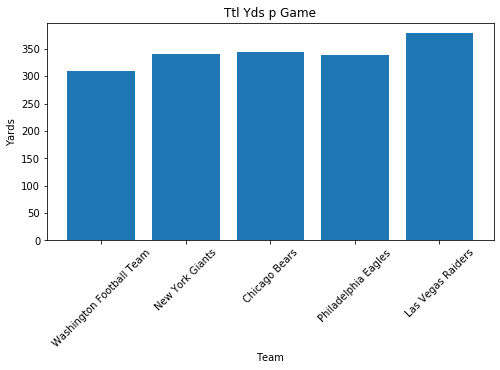

----------------------------------------
Offense

Avg Ttl_Yds: 366.1
PIT Ttl_Yds: 354.45
--------------------------------------------------
Avg Ttl_Yds: 366.1
SEA Ttl_Yds: 409.55
--------------------------------------------------
Avg Ttl_Yds: 366.1
DET Ttl_Yds: 366.64
--------------------------------------------------
Avg Ttl_Yds: 366.1
GNB Ttl_Yds: 403.73
--------------------------------------------------
Avg Ttl_Yds: 366.1
NYJ Ttl_Yds: 275.64
--------------------------------------------------


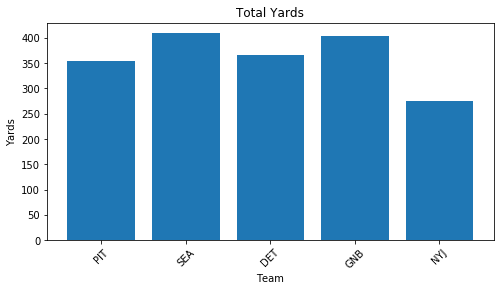

In [111]:
print('Defense')
print('')
average, def1, _1def = print_metric_team(available_def, 'Ttl_Yds_pG', def_team1)
average, def2, _2def = print_metric_team(available_def, 'Ttl_Yds_pG', def_team2)
average, def3, _3def = print_metric_team(available_def, 'Ttl_Yds_pG', def_team3)
average, def4, _4def = print_metric_team(available_def, 'Ttl_Yds_pG', def_team4)
average, def5, _5def = print_metric_team(available_def, 'Ttl_Yds_pG', def_team5)

x = [def1, def2, def3, def4, def5]
y = [_1def, _2def, _3def, _4def, _5def]

bar_plot(x, y, "Ttl Yds p Game", "Team", "Yards")

print('-'*40)
print('Offense')
print('')

average, off1, _1off = print_metric_team(available_off, 'Ttl_Yds', off_team1)
average, off2, _2off = print_metric_team(available_off, 'Ttl_Yds', off_team2)
average, off3, _3off = print_metric_team(available_off, 'Ttl_Yds', off_team3)
average, off4, _4off = print_metric_team(available_off, 'Ttl_Yds', off_team4)
average, off5, _5off = print_metric_team(available_off, 'Ttl_Yds', off_team5)

x = [off1, off2, off3, off4, off5]
y = [_1off, _2off, _3off, _4off, _5off]

bar_plot(x, y, "Total Yards", "Team", "Yards")

Defense

Avg Ttl_Turnovers_pG: 1.21
Washington Football Team Ttl_Turnovers_pG: 1.18
--------------------------------------------------
Avg Ttl_Turnovers_pG: 1.21
New York Giants Ttl_Turnovers_pG: 1.64
--------------------------------------------------
Avg Ttl_Turnovers_pG: 1.21
Chicago Bears Ttl_Turnovers_pG: 1.0
--------------------------------------------------
Avg Ttl_Turnovers_pG: 1.21
Philadelphia Eagles Ttl_Turnovers_pG: 1.0
--------------------------------------------------
Avg Ttl_Turnovers_pG: 1.21
Las Vegas Raiders Ttl_Turnovers_pG: 1.09
--------------------------------------------------


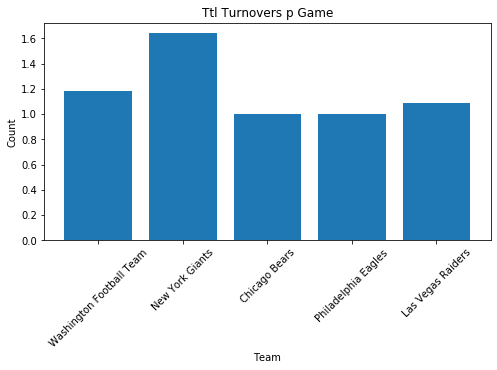

----------------------------------------
Offense

Avg Ttl_Turnovers_pG: 1.24
PIT Ttl_Turnovers_pG: 1.0
--------------------------------------------------
Avg Ttl_Turnovers_pG: 1.24
SEA Ttl_Turnovers_pG: 1.27
--------------------------------------------------
Avg Ttl_Turnovers_pG: 1.24
DET Ttl_Turnovers_pG: 1.09
--------------------------------------------------
Avg Ttl_Turnovers_pG: 1.24
GNB Ttl_Turnovers_pG: 0.82
--------------------------------------------------
Avg Ttl_Turnovers_pG: 1.24
NYJ Ttl_Turnovers_pG: 1.18
--------------------------------------------------


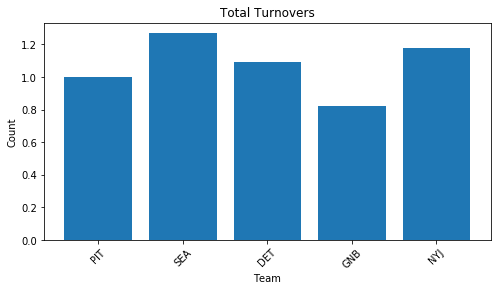

In [112]:
print('Defense')
print('')
average, def1, _1def = print_metric_team(available_def, 'Ttl_Turnovers_pG', def_team1)
average, def2, _2def = print_metric_team(available_def, 'Ttl_Turnovers_pG', def_team2)
average, def3, _3def = print_metric_team(available_def, 'Ttl_Turnovers_pG', def_team3)
average, def4, _4def = print_metric_team(available_def, 'Ttl_Turnovers_pG', def_team4)
average, def5, _5def = print_metric_team(available_def, 'Ttl_Turnovers_pG', def_team5)

x = [def1, def2, def3, def4, def5]
y = [_1def, _2def, _3def, _4def, _5def]

bar_plot(x, y, "Ttl Turnovers p Game", "Team", "Count")

print('-'*40)
print('Offense')
print('')

average, off1, _1off = print_metric_team(available_off, 'Ttl_Turnovers_pG', off_team1)
average, off2, _2off = print_metric_team(available_off, 'Ttl_Turnovers_pG', off_team2)
average, off3, _3off = print_metric_team(available_off, 'Ttl_Turnovers_pG', off_team3)
average, off4, _4off = print_metric_team(available_off, 'Ttl_Turnovers_pG', off_team4)
average, off5, _5off = print_metric_team(available_off, 'Ttl_Turnovers_pG', off_team5)

x = [off1, off2, off3, off4, off5]
y = [_1off, _2off, _3off, _4off, _5off]

bar_plot(x, y, "Total Turnovers", "Team", "Count")

Defense

Avg Ttl_TDs_pG: 2.89
Washington Football Team Ttl_TDs_pG: 2.27
--------------------------------------------------
Avg Ttl_TDs_pG: 2.89
New York Giants Ttl_TDs_pG: 2.36
--------------------------------------------------
Avg Ttl_TDs_pG: 2.89
Chicago Bears Ttl_TDs_pG: 2.09
--------------------------------------------------
Avg Ttl_TDs_pG: 2.89
Philadelphia Eagles Ttl_TDs_pG: 2.73
--------------------------------------------------
Avg Ttl_TDs_pG: 2.89
Las Vegas Raiders Ttl_TDs_pG: 3.18
--------------------------------------------------


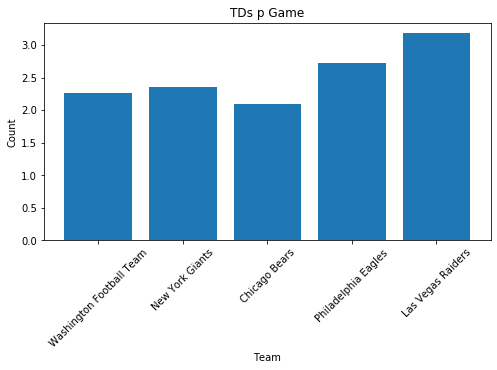

----------------------------------------
Offense

Avg TtlTDs_pG: 2.77
PIT TtlTDs_pG: 3.18
--------------------------------------------------
Avg TtlTDs_pG: 2.77
SEA TtlTDs_pG: 3.82
--------------------------------------------------
Avg TtlTDs_pG: 2.77
DET TtlTDs_pG: 2.45
--------------------------------------------------
Avg TtlTDs_pG: 2.77
GNB TtlTDs_pG: 3.82
--------------------------------------------------
Avg TtlTDs_pG: 2.77
NYJ TtlTDs_pG: 1.27
--------------------------------------------------


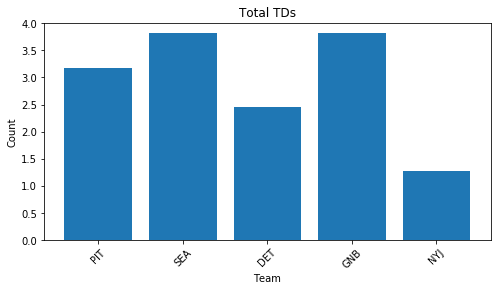

In [114]:
print('Defense')
print('')
average, def1, _1def = print_metric_team(available_def, 'Ttl_TDs_pG', def_team1)
average, def2, _2def = print_metric_team(available_def, 'Ttl_TDs_pG', def_team2)
average, def3, _3def = print_metric_team(available_def, 'Ttl_TDs_pG', def_team3)
average, def4, _4def = print_metric_team(available_def, 'Ttl_TDs_pG', def_team4)
average, def5, _5def = print_metric_team(available_def, 'Ttl_TDs_pG', def_team5)

x = [def1, def2, def3, def4, def5]
y = [_1def, _2def, _3def, _4def, _5def]

bar_plot(x, y, "TDs p Game", "Team", "Count")

print('-'*40)
print('Offense')
print('')

average, off1, _1off = print_metric_team(available_off, 'TtlTDs_pG', off_team1)
average, off2, _2off = print_metric_team(available_off, 'TtlTDs_pG', off_team2)
average, off3, _3off = print_metric_team(available_off, 'TtlTDs_pG', off_team3)
average, off4, _4off = print_metric_team(available_off, 'TtlTDs_pG', off_team4)
average, off5, _5off = print_metric_team(available_off, 'TtlTDs_pG', off_team5)

x = [off1, off2, off3, off4, off5]
y = [_1off, _2off, _3off, _4off, _5off]

bar_plot(x, y, "Total TDs", "Team", "Count")

#### Additional Defense Stats

Avg Sacks_pG: 2.11
Washington Football Team Sacks_pG: 3.27
--------------------------------------------------
Avg Sacks_pG: 2.11
New York Giants Sacks_pG: 2.45
--------------------------------------------------
Avg Sacks_pG: 2.11
Chicago Bears Sacks_pG: 1.91
--------------------------------------------------
Avg Sacks_pG: 2.11
Philadelphia Eagles Sacks_pG: 3.27
--------------------------------------------------
Avg Sacks_pG: 2.11
Las Vegas Raiders Sacks_pG: 1.09
--------------------------------------------------


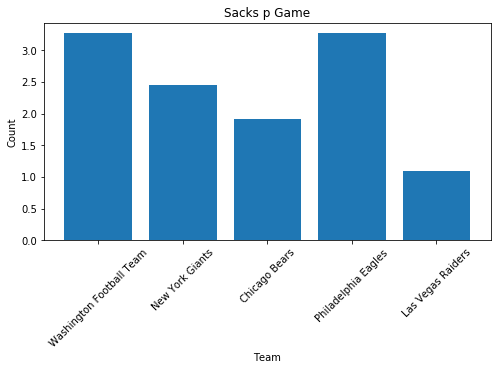

In [115]:
average, def1, _1def = print_metric_team(available_def, 'Sacks_pG', def_team1)
average, def2, _2def = print_metric_team(available_def, 'Sacks_pG', def_team2)
average, def3, _3def = print_metric_team(available_def, 'Sacks_pG', def_team3)
average, def4, _4def = print_metric_team(available_def, 'Sacks_pG', def_team4)
average, def5, _5def = print_metric_team(available_def, 'Sacks_pG', def_team5)

x = [def1, def2, def3, def4, def5]
y = [_1def, _2def, _3def, _4def, _5def]

bar_plot(x, y, "Sacks p Game", "Team", "Count")



## Kicking

In [116]:
available_kickers = kicking_df[~kicking_df['PLAYER'].isin(taken_k)]
available_kickers.head()

,PLAYER,POSITION,TEAM,GP,FGM_A,FG%,LNG,_1_19,_20_29,_30_39,_40_49,OVER50,XPM_A,XP%,PTS,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,Week_10,Week_11,Week_12
0,Younghoe Koo,K,ATL,10,30,96.70,54,0-0,7-7,9-9,7-8,6-6,25,88.00,109,128.00,9.00,17.00,8.00,0.00,13.00,20.00,2.00,13.00,12.00,0.00,13.00,21.00
1,Ryan Succop,K,TB,12,24,91.70,50,0-0,7-7,8-8,6-7,1-2,38,94.70,102,110.00,5.00,7.00,9.00,8.00,14.00,10.00,9.00,15.00,4.00,17.00,6.00,6.00
2,Daniel Carlson,K,LV,11,25,92.00,54,0-0,11-11,6-6,2-4,4-4,32,96.90,100,110.00,12.00,12.00,8.00,13.00,11.00,0.00,9.00,10.00,7.00,15.00,7.00,6.00
4,Jason Sanders,K,MIA,11,25,96.00,56,0-0,5-5,3-3,8-9,8-8,26,100.00,98,122.00,4.00,11.00,7.00,18.00,22.00,6.00,0.00,4.00,14.00,14.00,10.00,12.00
7,Tyler Bass,K,BUF,11,27,77.80,58,1-1,4-4,4-7,8-9,4-6,33,97.00,95,111.00,9.00,7.00,5.00,6.00,5.00,6.00,23.00,6.00,15.00,18.00,0.00,11.00


In [117]:
available_kickers.rename(columns={'PLAYER': 'Player'}, inplace=True)

In [118]:
available_kickers['FG_1_19'] = available_kickers['_1_19'].map(lambda x: int(x.split('-')[0]))
available_kickers['FG_20_29'] = available_kickers['_20_29'].map(lambda x: int(x.split('-')[0]))
available_kickers['FG_30_39'] = available_kickers['_30_39'].map(lambda x: int(x.split('-')[0]))
available_kickers['FG_40_49'] = available_kickers['_40_49'].map(lambda x: int(x.split('-')[0]))
available_kickers['FG_OVER50'] = available_kickers['OVER50'].map(lambda x: int(x.split('-')[0]))

In [119]:
available_kickers.sort_values('OVER50', ascending = False).head()

,Player,POSITION,TEAM,GP,FGM_A,FG%,LNG,_1_19,_20_29,_30_39,_40_49,OVER50,XPM_A,XP%,PTS,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,Week_10,Week_11,Week_12,FG_1_19,FG_20_29,FG_30_39,FG_40_49,FG_OVER50
4,Jason Sanders,K,MIA,11,25,96.00,56,0-0,5-5,3-3,8-9,8-8,26,100.00,98,122.00,4.00,11.00,7.00,18.00,22.00,6.00,0.00,4.00,14.00,14.00,10.00,12.00,0,5,3,8,8
15,Brandon McManus,K,DEN,11,22,95.50,58,0-0,4-4,2-2,8-8,7-8,19,94.70,81,103.00,2.00,8.00,6.00,18.00,0.00,24.00,5.00,7.00,11.00,8.00,9.00,5.00,0,4,2,8,7
18,Stephen Gostkowski,K,TEN,11,24,66.70,55,0-0,2-3,3-4,5-10,6-7,34,94.10,80,97.00,4.00,12.00,25.00,0.00,6.00,4.00,8.00,2.00,7.00,7.00,12.00,10.00,0,2,3,5,6
0,Younghoe Koo,K,ATL,10,30,96.70,54,0-0,7-7,9-9,7-8,6-6,25,88.00,109,128.00,9.00,17.00,8.00,0.00,13.00,20.00,2.00,13.00,12.00,0.00,13.00,21.00,0,7,9,7,6
19,Matt Prater,K,DET,11,25,72.00,59,0-0,4-4,6-6,4-7,4-8,26,100.00,80,92.00,12.00,3.00,14.00,3.00,0.00,11.00,16.00,3.00,9.00,16.00,0.00,5.00,0,4,6,4,4


In [120]:
scaled_k = available_kickers[['Player', 'POSITION', 'TEAM', 'GP', 'FGM_A', 'FG%', 'LNG', 'XPM_A', 'XP%', 'PTS',
                              'FG_1_19', 'FG_20_29', 'FG_30_39', 'FG_40_49', 'FG_OVER50']]

k_columns = ['FGM_A', 'FG%', 'LNG', 'XPM_A', 'XP%', 'PTS', 'FG_1_19', 'FG_20_29', 'FG_30_39', 'FG_40_49', 'FG_OVER50']

scale_data(scaled_k, k_columns)

scaled_k.head()

,Player,POSITION,TEAM,GP,FGM_A,FG%,LNG,XPM_A,XP%,PTS,FG_1_19,FG_20_29,FG_30_39,FG_40_49,FG_OVER50
0,Younghoe Koo,K,ATL,10,1.66,0.72,0.47,0.47,0.06,1.50,-0.25,1.74,1.98,1.00,1.87
1,Ryan Succop,K,TB,12,1.02,0.55,0.26,1.45,0.33,1.30,-0.25,1.74,1.61,0.68,-0.50
2,Daniel Carlson,K,LV,11,1.13,0.56,0.47,1.00,0.42,1.25,-0.25,3.36,0.87,-0.61,0.92
4,Jason Sanders,K,MIA,11,1.13,0.70,0.58,0.54,0.55,1.19,-0.25,0.93,-0.24,1.32,2.82
7,Tyler Bass,K,BUF,11,1.34,0.08,0.69,1.07,0.43,1.11,4.06,0.52,0.13,1.32,0.92


In [121]:
scaled_k['Combined_Score'] = (scaled_k['FGM_A'] + scaled_k['FG%'] + scaled_k['LNG'] + 
                              scaled_k['XPM_A'] + scaled_k['XP%'] + scaled_k['PTS'] + 
                              scaled_k['FG_1_19'] + scaled_k['FG_20_29'] + scaled_k['FG_30_39'] + 
                              scaled_k['FG_40_49'] + scaled_k['FG_OVER50'])

scaled_k.sort_values('Combined_Score', ascending=False, inplace=True)
scaled_k.head(10)

,Player,POSITION,TEAM,GP,FGM_A,FG%,LNG,XPM_A,XP%,PTS,FG_1_19,FG_20_29,FG_30_39,FG_40_49,FG_OVER50,Combined_Score
7,Tyler Bass,K,BUF,11,1.34,0.08,0.69,1.07,0.43,1.11,4.06,0.52,0.13,1.32,0.92,11.67
0,Younghoe Koo,K,ATL,10,1.66,0.72,0.47,0.47,0.06,1.50,-0.25,1.74,1.98,1.00,1.87,11.21
4,Jason Sanders,K,MIA,11,1.13,0.70,0.58,0.54,0.55,1.19,-0.25,0.93,-0.24,1.32,2.82,9.27
2,Daniel Carlson,K,LV,11,1.13,0.56,0.47,1.00,0.42,1.25,-0.25,3.36,0.87,-0.61,0.92,9.12
8,Graham Gano,K,NYG,11,1.23,0.71,0.53,-0.14,0.55,1.03,-0.25,0.52,2.35,1.00,0.92,8.45
1,Ryan Succop,K,TB,12,1.02,0.55,0.26,1.45,0.33,1.30,-0.25,1.74,1.61,0.68,-0.50,8.19
20,Mason Crosby,K,GB,11,-0.16,0.84,0.42,1.75,0.35,0.67,4.06,-0.69,0.50,0.04,-0.03,7.74
15,Brandon McManus,K,DEN,11,0.81,0.68,0.69,0.02,0.33,0.72,-0.25,0.52,-0.61,1.32,2.34,6.57
10,Randy Bullock,K,CIN,11,1.13,0.29,0.53,0.39,0.38,0.86,-0.25,0.12,1.61,1.00,0.45,6.50
12,Chris Boswell,K,PIT,11,0.48,0.66,0.74,1.22,0.08,0.83,-0.25,0.52,0.87,1.00,-0.50,5.67


In [122]:
kicker1 = 7
kicker2 = 0
kicker3 = 4
kicker4 = 2
kicker5 = 8

Week 12 Opponents:
    
    Buffalo Bills vs San Francisco 49ers
    Atlanta Falcons vs New Orleans Saints
    Miami Dolphins vs Cincinnati Bengals
    Las Vegas Raiders vs New York Jets
    New York Giants vs Seattle Seahawks

In [123]:
kicking_opponents = ['San Francisco 49ers', 'New Orleans Saints', 'Cincinnati Bengals', 'New York Jets', 
                     'Seattle Seahawks']


In [124]:
kicking_defense = defense[defense['Team'].isin(kicking_opponents)]
kicking_defense['Ttl_TDs'] = kicking_defense['Rushing_TDs']+kicking_defense['Passing_TDs']
kicking_defense['Points_from_Kicking'] = kicking_defense['Ttl_Pts_Allowed']-(kicking_defense['Ttl_TDs']*7)
kicking_defense['Num_Field_Goals_Allowed'] = kicking_defense['Points_from_Kicking']/3
kicking_defense

,Team,GP,Ttl_Pts_Allowed,Ttl_Offense_Plays_Allowed,Yds_p_Play,Ttl_Yds,Rushing_Att,Rushing_Yds,Rushing_Yds_p_Att,Rushing_TDs,Passing_Att,Passing_Yds_p_Att,Completions,Yds_p_Completion,Passing_Yds,Passing_TDs,RZ_Att,RZ_TD,RZ_Percent,Ttl_Turnovers,Interceptions,Fumbles,Sacks,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Week_6,Week_7,Week_8,Week_9,Week_10,Week_11,Week_12,Ttl_Pts_Allowed_pG,Ttl_Yds_pG,Rushing_Att_pG,Rushing_Yds_pG,Rushing_TDs_pG,Passing_Att_pG,Completions_pG,Completion_Percent_Allowed,Passing_Yds_pG,Passing_TDs_pG,Ttl_TDs_pG,Ttl_Turnovers_pG,Fumbles_pG,Sacks_pG,TTL_pG,Ttl_TDs,Points_from_Kicking,Num_Field_Goals_Allowed
4,New Orleans Saints,11,225,651,4.80,3134,255,843,3.30,5,363,5.80,226,11.10,2291,20,29,21,72.40,18,13,5,33,91.00,15.00,4.00,-3.00,4.00,3.00,0.00,1.00,7.00,16.00,14.00,16.00,14.00,20.45,284.91,23.18,76.64,0.45,33.00,20.55,0.62,208.27,1.82,2.27,1.64,0.45,3.00,8.27,25,50,16.67
10,San Francisco 49ers,11,254,664,5.20,3467,299,1196,4.00,8,345,6.20,223,10.70,2271,17,27,17,63.00,16,10,6,20,67.00,4.00,5.00,12.00,6.00,-2.00,3.00,17.00,-2.00,0.00,7.00,0.00,17.00,23.09,315.18,27.18,108.73,0.73,31.36,20.27,0.65,206.45,1.55,2.27,1.45,0.55,1.82,6.09,25,79,26.33
20,Cincinnati Bengals,11,289,718,6.00,4295,316,1504,4.80,9,389,6.90,243,11.70,2791,22,41,28,68.30,11,9,2,13,32.00,3.00,-2.00,7.00,5.00,3.00,4.00,-2.00,4.00,0.00,-4.00,5.00,9.00,26.27,390.45,28.73,136.73,0.82,35.36,22.09,0.62,253.73,2.00,2.82,1.00,0.18,1.18,2.91,31,72,24.00
25,Seattle Seahawks,11,304,787,5.80,4599,265,982,3.70,15,491,6.90,336,11.20,3617,20,43,29,67.40,16,10,6,31,59.00,6.00,3.00,9.00,5.00,7.00,0.00,0.00,7.00,3.00,5.00,5.00,9.00,27.64,418.09,24.09,89.27,1.36,44.64,30.55,0.68,328.82,1.82,3.18,1.45,0.55,2.82,5.36,35,59,19.67
28,New York Jets,11,322,744,5.80,4345,318,1221,3.80,12,408,7.30,293,11.00,3124,21,43,23,53.50,13,7,6,18,44.00,7.00,4.00,0.00,8.00,2.00,6.00,5.00,-4.00,-1.00,0.00,8.00,9.00,29.27,395.00,28.91,111.00,1.09,37.09,26.64,0.72,284.00,1.91,3.00,1.18,0.55,1.64,4.00,33,91,30.33


In [125]:
kick_def1 = 10
kick_def2 = 4
kick_def3 = 20
kick_def4 = 28
kick_def5 = 25

#### Kicking Comparison

Kickers

Avg FGM_A: 14.46
Tyler Bass FGM_A: 27
--------------------------------------------------
Avg FGM_A: 14.46
Younghoe Koo FGM_A: 30
--------------------------------------------------
Avg FGM_A: 14.46
Jason Sanders FGM_A: 25
--------------------------------------------------
Avg FGM_A: 14.46
Daniel Carlson FGM_A: 25
--------------------------------------------------
Avg FGM_A: 14.46
Graham Gano FGM_A: 26
--------------------------------------------------


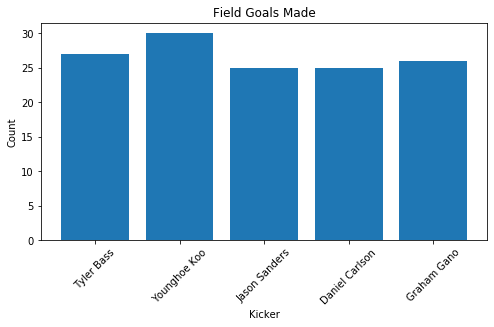

----------------------------------------
Defense

Avg Num_Field_Goals_Allowed: 23.4
San Francisco 49ers Num_Field_Goals_Allowed: 26.33
--------------------------------------------------
Avg Num_Field_Goals_Allowed: 23.4
New Orleans Saints Num_Field_Goals_Allowed: 16.67
--------------------------------------------------
Avg Num_Field_Goals_Allowed: 23.4
Cincinnati Bengals Num_Field_Goals_Allowed: 24.0
--------------------------------------------------
Avg Num_Field_Goals_Allowed: 23.4
New York Jets Num_Field_Goals_Allowed: 30.33
--------------------------------------------------
Avg Num_Field_Goals_Allowed: 23.4
Seattle Seahawks Num_Field_Goals_Allowed: 19.67
--------------------------------------------------


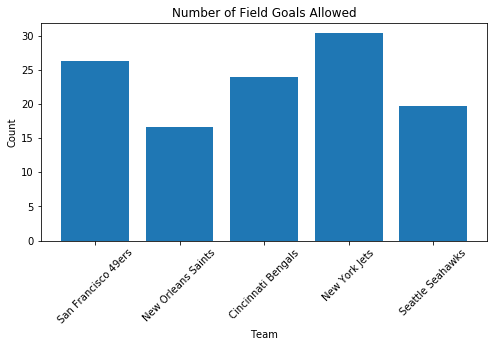

In [126]:
print('Kickers')
print('')
average, kick1, _1kick = print_metric(available_kickers, 'FGM_A', kicker1)
average, kick2, _2kick = print_metric(available_kickers, 'FGM_A', kicker2)
average, kick3, _3kick = print_metric(available_kickers, 'FGM_A', kicker3)
average, kick4, _4kick = print_metric(available_kickers, 'FGM_A', kicker4)
average, kick5, _5kick = print_metric(available_kickers, 'FGM_A', kicker5)

x = [kick1, kick2, kick3, kick4, kick5]
y = [_1kick, _2kick, _3kick, _4kick, _5kick]

bar_plot(x, y, 'Field Goals Made', 'Kicker', 'Count')

print('-'*40)
print('Defense')
print('')

average, kdef1, _1kdef = print_metric_team(kicking_defense, 'Num_Field_Goals_Allowed', kick_def1)
average, kdef2, _2kdef = print_metric_team(kicking_defense, 'Num_Field_Goals_Allowed', kick_def2)
average, kdef3, _3kdef = print_metric_team(kicking_defense, 'Num_Field_Goals_Allowed', kick_def3)
average, kdef4, _4kdef = print_metric_team(kicking_defense, 'Num_Field_Goals_Allowed', kick_def4)
average, kdef5, _5kdef = print_metric_team(kicking_defense, 'Num_Field_Goals_Allowed', kick_def5)

x = [kdef1, kdef2, kdef3, kdef4, kdef5]
y = [_1kdef, _2kdef, _3kdef, _4kdef, _5kdef]

bar_plot(x, y, 'Number of Field Goals Allowed', 'Team', 'Count')

Kickers

Avg XPM_A: 18.8
Tyler Bass XPM_A: 33
--------------------------------------------------
Avg XPM_A: 18.8
Younghoe Koo XPM_A: 25
--------------------------------------------------
Avg XPM_A: 18.8
Jason Sanders XPM_A: 26
--------------------------------------------------
Avg XPM_A: 18.8
Daniel Carlson XPM_A: 32
--------------------------------------------------
Avg XPM_A: 18.8
Graham Gano XPM_A: 17
--------------------------------------------------


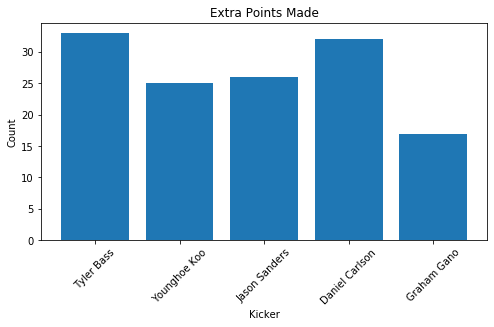

----------------------------------------
Defense

Avg Ttl_TDs: 29.8
San Francisco 49ers Ttl_TDs: 25
--------------------------------------------------
Avg Ttl_TDs: 29.8
New Orleans Saints Ttl_TDs: 25
--------------------------------------------------
Avg Ttl_TDs: 29.8
Cincinnati Bengals Ttl_TDs: 31
--------------------------------------------------
Avg Ttl_TDs: 29.8
New York Jets Ttl_TDs: 33
--------------------------------------------------
Avg Ttl_TDs: 29.8
Seattle Seahawks Ttl_TDs: 35
--------------------------------------------------


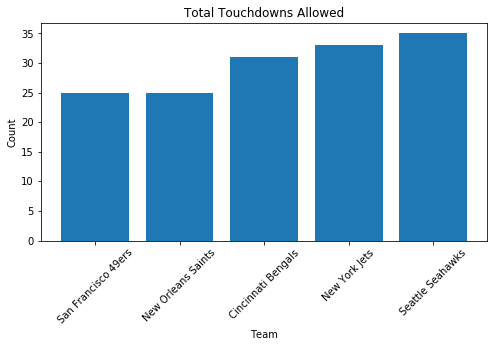

In [127]:
print('Kickers')
print('')
average, kick1, _1kick = print_metric(available_kickers, 'XPM_A', kicker1)
average, kick2, _2kick = print_metric(available_kickers, 'XPM_A', kicker2)
average, kick3, _3kick = print_metric(available_kickers, 'XPM_A', kicker3)
average, kick4, _4kick = print_metric(available_kickers, 'XPM_A', kicker4)
average, kick5, _5kick = print_metric(available_kickers, 'XPM_A', kicker5)

x = [kick1, kick2, kick3, kick4, kick5]
y = [_1kick, _2kick, _3kick, _4kick, _5kick]

bar_plot(x, y, 'Extra Points Made', 'Kicker', 'Count')

print('-'*40)
print('Defense')
print('')

average, kdef1, _1kdef = print_metric_team(kicking_defense, 'Ttl_TDs', kick_def1)
average, kdef2, _2kdef = print_metric_team(kicking_defense, 'Ttl_TDs', kick_def2)
average, kdef3, _3kdef = print_metric_team(kicking_defense, 'Ttl_TDs', kick_def3)
average, kdef4, _4kdef = print_metric_team(kicking_defense, 'Ttl_TDs', kick_def4)
average, kdef5, _5kdef = print_metric_team(kicking_defense, 'Ttl_TDs', kick_def5)

x = [kdef1, kdef2, kdef3, kdef4, kdef5]
y = [_1kdef, _2kdef, _3kdef, _4kdef, _5kdef]

bar_plot(x, y, 'Total Touchdowns Allowed', 'Team', 'Count')

#### Additional Kicker Analysis

Avg FG%: 75.39
Tyler Bass FG%: 77.8
--------------------------------------------------
Avg FG%: 75.39
Younghoe Koo FG%: 96.7
--------------------------------------------------
Avg FG%: 75.39
Jason Sanders FG%: 96.0
--------------------------------------------------
Avg FG%: 75.39
Daniel Carlson FG%: 92.0
--------------------------------------------------
Avg FG%: 75.39
Graham Gano FG%: 96.2
--------------------------------------------------


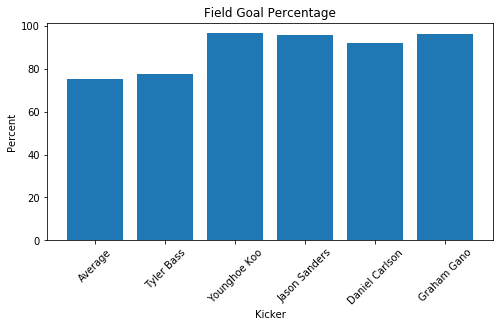

In [128]:
average, kick1, _1kick = print_metric(available_kickers, 'FG%', kicker1)
average, kick2, _2kick = print_metric(available_kickers, 'FG%', kicker2)
average, kick3, _3kick = print_metric(available_kickers, 'FG%', kicker3)
average, kick4, _4kick = print_metric(available_kickers, 'FG%', kicker4)
average, kick5, _5kick = print_metric(available_kickers, 'FG%', kicker5)

x = ['Average', kick1, kick2, kick3, kick4, kick5]
y = [average, _1kick, _2kick, _3kick, _4kick, _5kick]

bar_plot(x, y, 'Field Goal Percentage', 'Kicker', 'Percent')

Avg XP%: 86.63
Tyler Bass XP%: 97.0
--------------------------------------------------
Avg XP%: 86.63
Younghoe Koo XP%: 88.0
--------------------------------------------------
Avg XP%: 86.63
Jason Sanders XP%: 100.0
--------------------------------------------------
Avg XP%: 86.63
Daniel Carlson XP%: 96.9
--------------------------------------------------
Avg XP%: 86.63
Graham Gano XP%: 100.0
--------------------------------------------------


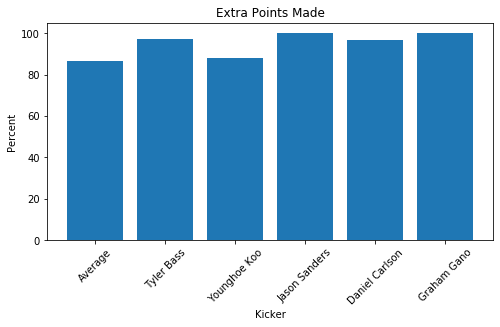

In [129]:
average, kick1, _1kick = print_metric(available_kickers, 'XP%', kicker1)
average, kick2, _2kick = print_metric(available_kickers, 'XP%', kicker2)
average, kick3, _3kick = print_metric(available_kickers, 'XP%', kicker3)
average, kick4, _4kick = print_metric(available_kickers, 'XP%', kicker4)
average, kick5, _5kick = print_metric(available_kickers, 'XP%', kicker5)

x = ['Average', kick1, kick2, kick3, kick4, kick5]
y = [average, _1kick, _2kick, _3kick, _4kick, _5kick]

bar_plot(x, y, 'Extra Points Made', 'Kicker', 'Percent')

#### Additional Defense Analysis

Avg RZ_Percent: 64.92
San Francisco 49ers RZ_Percent: 63.0
--------------------------------------------------
Avg RZ_Percent: 64.92
New Orleans Saints RZ_Percent: 72.4
--------------------------------------------------
Avg RZ_Percent: 64.92
Cincinnati Bengals RZ_Percent: 68.3
--------------------------------------------------
Avg RZ_Percent: 64.92
New York Jets RZ_Percent: 53.5
--------------------------------------------------
Avg RZ_Percent: 64.92
Seattle Seahawks RZ_Percent: 67.4
--------------------------------------------------


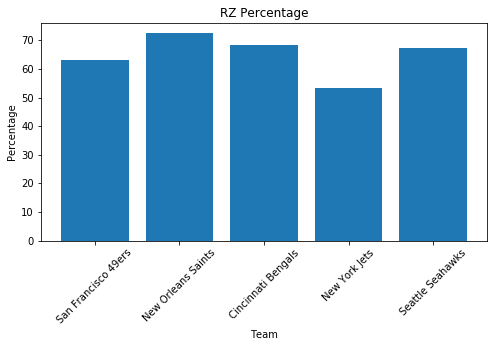

In [130]:
average, kdef1, _1kdef = print_metric_team(kicking_defense, 'RZ_Percent', kick_def1)
average, kdef2, _2kdef = print_metric_team(kicking_defense, 'RZ_Percent', kick_def2)
average, kdef3, _3kdef = print_metric_team(kicking_defense, 'RZ_Percent', kick_def3)
average, kdef4, _4kdef = print_metric_team(kicking_defense, 'RZ_Percent', kick_def4)
average, kdef5, _5kdef = print_metric_team(kicking_defense, 'RZ_Percent', kick_def5)

x = [kdef1, kdef2, kdef3, kdef4, kdef5]
y = [_1kdef, _2kdef, _3kdef, _4kdef, _5kdef]

bar_plot(x, y, 'RZ Percentage', 'Team', 'Percentage')